In [2]:
#importing modules
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe
import pandas as pd 
import seaborn as sns
import scipy
import scipy.constants
from scipy import stats
from scipy.stats import norm
import csv

In [3]:
#import the data files as dataframes in pandas
mags_optim = pd.read_csv('ANNZ_randomReg_0000_mags_optim_eval.csv').reset_index().values
mags_eval = pd.read_csv('ANNZ_randomReg_0000_mags_eval.csv').reset_index().values
colors_optim = pd.read_csv('ANNZ_randomReg_0000_colors_optim_eval.csv').reset_index().values
colors_eval = pd.read_csv('ANNZ_randomReg_0000_colors_eval.csv').reset_index().values
sof = pd.read_csv('ANNZ_sof_eval_cut.csv').reset_index().values

In [4]:
file_type = {'mags_optim':mags_optim, 'mags_eval':mags_eval, 'colors_optim':colors_optim, 'colors_eval':colors_eval} #create a dictionary holding the file arrays
file_names = ('Magnitudes (Optimisation set)', 'Magnitudes (Evaluation set)', 'Colours (Optimisation set)', 'Colours (Evaluation set)')
xnames_optim = ['zbest', 'zmlm0_avg', 'zpdf0_avg', 'zpdf0_sample', 'zmlm1_avg', 'zpdf1_avg', 'zpdf1_sample']
xnames_eval = ['zbest', 'zmlm0_avg', 'zpdf0_avg', 'zpdf0_sample', 'zmlm1_avg', 'zpdf1_avg', 'zpdf1_sample', 'SOF']
plot_colors_optim = ('xkcd:light lavender', 'xkcd:deep blue', 'xkcd:burgundy', 'xkcd:blood orange', 'xkcd:orange yellow', 'xkcd:hot pink', 'xkcd:very dark green')
xticks_optim = ['ANNZ best', 'ANNZ MLM 0 average', 'ANNZ PDF 0 average', 'ANNZ PDF 0 sampled', 'ANNZ MLM 1 average', 'ANNZ PDF 1 average', 'ANNZ PDF 1 sampled']
plot_colors_eval = ('xkcd:light lavender', 'xkcd:deep blue', 'xkcd:burgundy', 'xkcd:blood orange', 'xkcd:orange yellow', 'xkcd:hot pink', 'xkcd:very dark green', 'xkcd:dark grey')
xticks_eval = ['ANNZ best', 'ANNZ MLM 0 average', 'ANNZ PDF 0 average', 'ANNZ PDF 0 sampled', 'ANNZ MLM 1 average', 'ANNZ PDF 1 average', 'ANNZ PDF 1 sampled', 'SOF']
#array holding the tick labels for each prediction set
xpos_eval = np.array([0,1,2,3,4,5,6,7])
xticks_eval = ['ANNZ best', 'ANNZ MLM 0 average', 'ANNZ PDF 0 average', 'ANNZ PDF 0 sampled', 'ANNZ MLM 1 average', 'ANNZ PDF 1 average', 'ANNZ PDF 1 sampled', 'SOF']
xpos_optim = np.array([0,1,2,3,4,5,6])
xticks_optim = ['ANNZ best', 'ANNZ MLM 0 average', 'ANNZ PDF 0 average', 'ANNZ PDF 0 sampled', 'ANNZ MLM 1 average', 'ANNZ PDF 1 average', 'ANNZ PDF 1 sampled']
ztype = globals() #to hold the variables related to z
pdf_sets = globals() #to hold the arrays for each PDF
pdf_size = np.linspace(0.0,1.0,200) #the number of points in each PDF, same for both sets, and was set to 200 intervals
for k, v in file_type.items(): #iterate through the keys and their respective values(arrays) in the file_type dictionary
    ztype['{}_range'.format(k)] = len(v) #find the length of each array
    if 'optim' in k: #run for optimisation files, need to differentiate due to slightly different positioning of values in optimisation and evaluation csv files
        ztype['{}_ztrue'.format(k)] = v[:,1] 
        ztype['{}_zbest'.format(k)] = v[:,2] 
        ztype['{}_zbest_wgt'.format(k)] = v[:,3] 
        ztype['{}_zbest_err'.format(k)] = v[:,4] 
        ztype['{}_zmlm0_avg'.format(k)] = v[:,5] 
        ztype['{}_zmlm0_avg_err'.format(k)] = v[:,6]
        ztype['{}_zmlm0_avg_wgt'.format(k)] = v[:,7] 
        ztype['{}_zpdf0_avg'.format(k)] = v[:,8]
        ztype['{}_zpdf0_avg_err'.format(k)] = v[:,9] 
        ztype['{}_zpdf0_avg_wgt'.format(k)] = v[:,10]
        ztype['{}_zmlm1_avg'.format(k)] = v[:,211] 
        ztype['{}_zmlm1_avg_err'.format(k)] = v[:,212]
        ztype['{}_zmlm1_avg_wgt'.format(k)] = v[:,213] 
        ztype['{}_zpdf1_avg'.format(k)] = v[:,214]
        ztype['{}_zpdf1_avg_err'.format(k)] = v[:,215] 
        ztype['{}_zpdf1_avg_wgt'.format(k)] = v[:,216]
        for l in range (0, ztype['{}_range'.format(k)]):
            pdf_sets['{}_row{}'.format(k, l)] = v[[l], None, :]
            pdf_sets['{}_row{}_reshape'.format(k, l)] = np.reshape(pdf_sets['{}_row{}'.format(k, l)], (417,1))
            pdf_sets['{}_row{}_zpdf0'.format(k, l)] = pdf_sets['{}_row{}_reshape'.format(k, l)][11:211]
            pdf_sets['{}_row{}_zpdf1'.format(k, l)] = pdf_sets['{}_row{}_reshape'.format(k, l)][217:417]
    elif 'eval' in k: #run for evaluation csvs
        ztype['{}_ztrue'.format(k)] = sof[:,19] 
        ztype['{}_zbest'.format(k)] = v[:,5] 
        ztype['{}_zbest_wgt'.format(k)] = v[:,6] 
        ztype['{}_zbest_err'.format(k)] = v[:,7] 
        ztype['{}_zmlm0_avg'.format(k)] = v[:,8] 
        ztype['{}_zmlm0_avg_err'.format(k)] = v[:,9]
        ztype['{}_zmlm0_avg_wgt'.format(k)] = v[:,10] 
        ztype['{}_zpdf0_avg'.format(k)] = v[:,11]
        ztype['{}_zpdf0_avg_err'.format(k)] = v[:,12] 
        ztype['{}_zpdf0_avg_wgt'.format(k)] = v[:,13]
        ztype['{}_zmlm1_avg'.format(k)] = v[:,214] 
        ztype['{}_zmlm1_avg_err'.format(k)] = v[:,215]
        ztype['{}_zmlm1_avg_wgt'.format(k)] = v[:,216] 
        ztype['{}_zpdf1_avg'.format(k)] = v[:,217]
        ztype['{}_zpdf1_avg_err'.format(k)] = v[:,218] 
        ztype['{}_zpdf1_avg_wgt'.format(k)] = v[:,219]
        ztype['{}_SOF'.format(k)] = sof[:,5]
        #ztype['{}_Z'.format(k)] = sof[:,19]
        for l in range (0, ztype['{}_range'.format(k)]):
            pdf_sets['{}_row{}'.format(k, l)] = v[[l], None, :]
            pdf_sets['{}_row{}_reshape'.format(k, l)] = np.reshape(pdf_sets['{}_row{}'.format(k, l)], (420,1))
            pdf_sets['{}_row{}_zpdf0'.format(k, l)] = pdf_sets['{}_row{}_reshape'.format(k, l)][14:214]
            pdf_sets['{}_row{}_zpdf1'.format(k, l)] = pdf_sets['{}_row{}_reshape'.format(k, l)][220:420]
    else:
        print('File type not recognised, please include the strings "optim" or "eval" in file name, depending on file type')

In [5]:
#import all the prediction sets obtained from PDF samplig, which was done in another script and saved to avoid plotting a new prediction set everytime this script runs
mags_optim_zpdf0_sample = pd.read_csv('mags_optim_pdf0_sampled_array.csv').reset_index().values
mags_optim_zpdf1_sample = pd.read_csv('mags_optim_pdf1_sampled_array.csv').reset_index().values
mags_eval_zpdf0_sample = pd.read_csv('mags_eval_pdf0_sampled_array.csv').reset_index().values
mags_eval_zpdf1_sample = pd.read_csv('mags_eval_pdf1_sampled_array.csv').reset_index().values

colors_optim_zpdf0_sample = pd.read_csv('colors_optim_pdf0_sampled_array.csv').reset_index().values
colors_optim_zpdf1_sample = pd.read_csv('colors_optim_pdf1_sampled_array.csv').reset_index().values
colors_eval_zpdf0_sample = pd.read_csv('colors_eval_pdf0_sampled_array.csv').reset_index().values
colors_eval_zpdf1_sample = pd.read_csv('colors_eval_pdf1_sampled_array.csv').reset_index().values

mags_optim_zpdf0_sample = mags_optim_zpdf0_sample[:,1]
mags_optim_zpdf1_sample = mags_optim_zpdf1_sample[:,1]
mags_eval_zpdf0_sample = mags_eval_zpdf0_sample[:,1]
mags_eval_zpdf1_sample = mags_eval_zpdf1_sample[:,1]

colors_optim_zpdf0_sample = colors_optim_zpdf0_sample[:,1]
colors_optim_zpdf1_sample = colors_optim_zpdf1_sample[:,1]
colors_eval_zpdf0_sample = colors_eval_zpdf0_sample[:,1]
colors_eval_zpdf1_sample = colors_eval_zpdf1_sample[:,1]

In [6]:
# Fixing weird bug with SOF (CHECK YOUR CODE WHEN OPENING OR PROCESSING THE DATA!!)
for k in file_type.keys():
    if 'eval' in k:
        ztype['{}_SOF'.format(k)] = ztype['{}_SOF'.format(k)].astype('float')
        ztype['{}_ztrue'.format(k)] = ztype['{}_ztrue'.format(k)].astype('float')

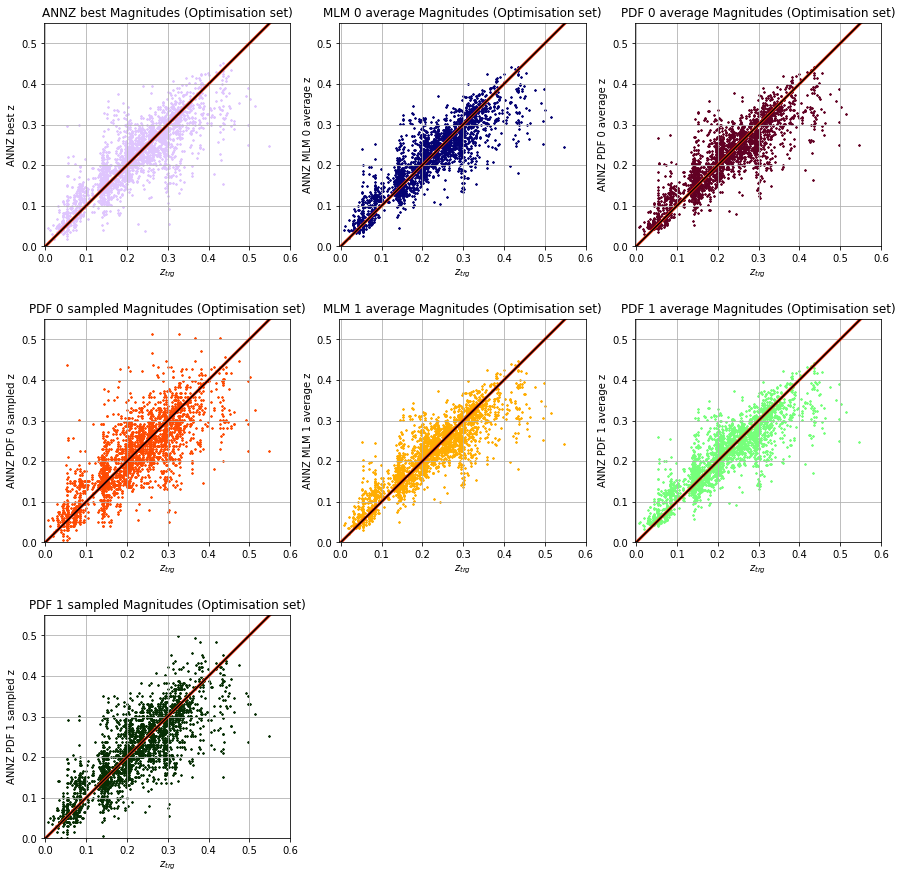

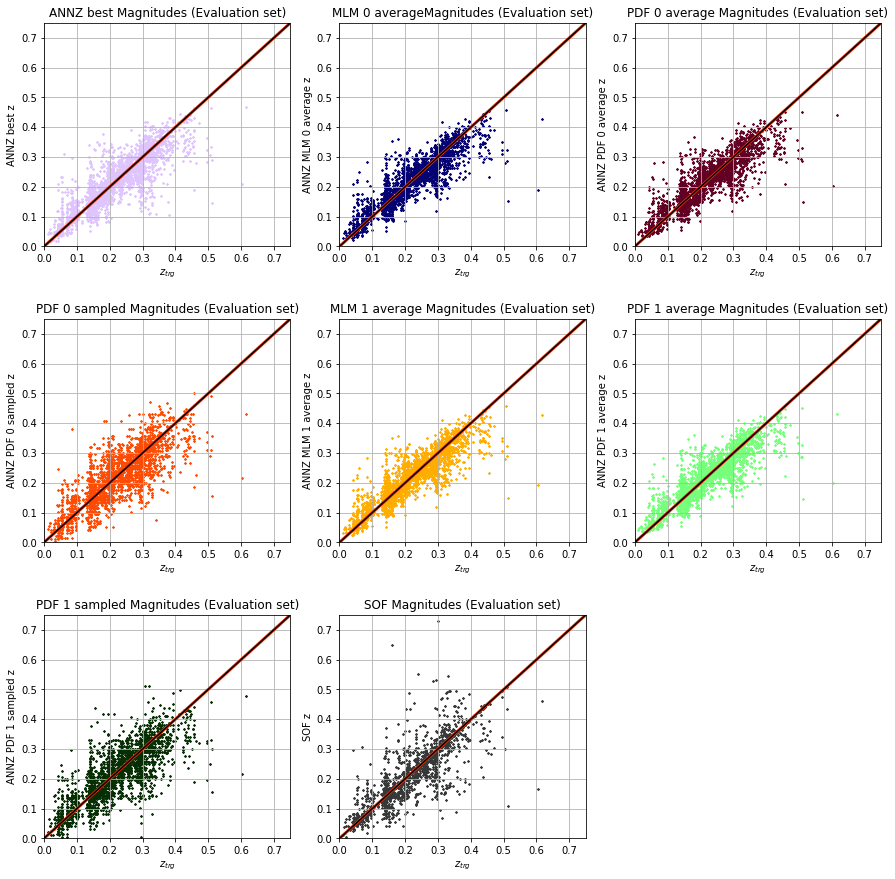

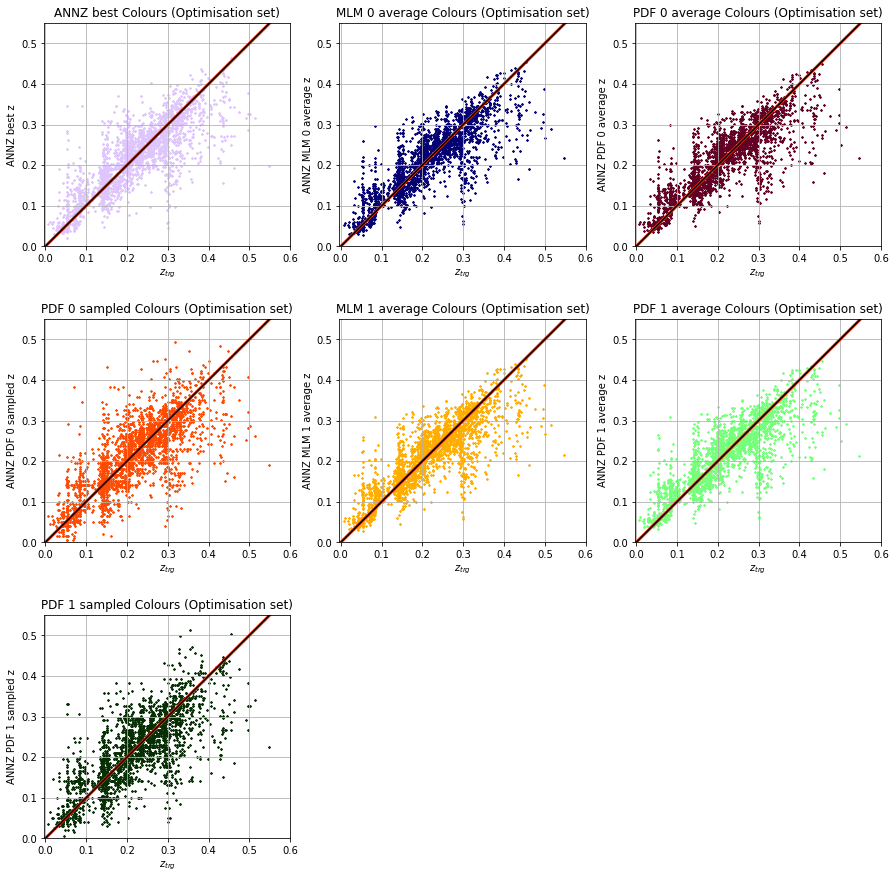

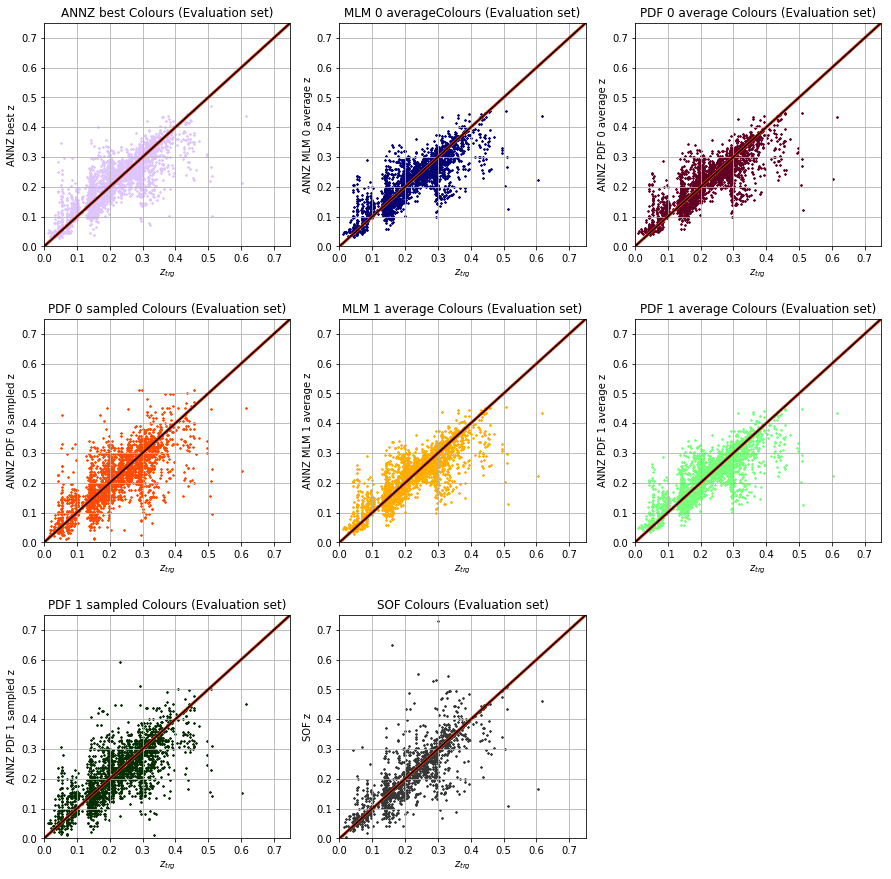

In [7]:
#scatter plots of all the predictions sets vs. ztrue
for k, n in zip(file_type.keys(), file_names):
    
    if 'optim' in k:
        fig = plt.figure(figsize=(15,15))
        fig.subplots_adjust(hspace=0.325)
        gradient = np.linspace(-0.003, 1.0, num=10 ,dtype=float)
        #title = fig.suptitle('z distributions of z true vs. prediction sets {}'.format(n), fontsize=25) #global title

        ax1 = plt.subplot(331)
        ax1.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_zbest'.format(k)], s=2, color='xkcd:light lavender', marker='D')
        ax1.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax1.grid(True)
        ax1.legend()
        plt.xlim(-0.003, 0.6)
        plt.ylim(0, 0.55)
        ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('$z_{trg}$')
        plt.ylabel('ANNZ best z')
        #plt.ylim(0, 0.5)
        plt.title('ANNZ best {}'.format(n))

        ax2 = plt.subplot(332)
        ax2.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_zmlm0_avg'.format(k)], s=2, color='xkcd:deep blue', marker='D')
        ax2.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax2.grid(True)
        ax2.legend()
        ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlim(-0.003, 0.6)
        plt.ylim(0, 0.55)
        plt.xlabel('$z_{trg}$')
        plt.ylabel('ANNZ MLM 0 average z')
        plt.title('MLM 0 average {}'.format(n))

        ax3 = plt.subplot(333)
        ax3.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_zpdf0_avg'.format(k)], s=2, color='xkcd:burgundy', marker='D')
        ax3.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax3.grid(True)
        ax3.legend()
        ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlim(-0.003, 0.6)
        plt.ylim(0, 0.55)
        plt.xlabel('$z_{trg}$')
        plt.ylabel('ANNZ PDF 0 average z')
        plt.title('PDF 0 average {}'.format(n))

        ax4 = plt.subplot(334)
        ax4.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_zpdf0_sample'.format(k)], s=2, color='xkcd:blood orange', marker='D')
        ax4.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax4.grid(True)
        ax4.legend()
        ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlim(-0.003, 0.6)
        plt.ylim(0, 0.55)
        plt.xlabel('$z_{trg}$')
        plt.ylabel('ANNZ PDF 0 sampled z')
        plt.title('PDF 0 sampled {}'.format(n))

        ax5 = plt.subplot(335)
        ax5.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_zmlm1_avg'.format(k)], s=2, color='xkcd:orange yellow', marker='D')
        ax5.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax5.grid(True)
        ax5.legend()
        ax5.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlim(-0.003, 0.6)
        plt.ylim(0, 0.55)
        plt.xlabel('$z_{trg}$')
        plt.ylabel('ANNZ MLM 1 average z')
        plt.title('MLM 1 average {}'.format(n))

        ax6 = plt.subplot(336)
        ax6.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_zpdf1_avg'.format(k)], s=2, color='xkcd:lightgreen', marker='D')
        ax6.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax6.grid(True)
        ax6.legend()
        ax6.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlim(-0.003, 0.6)
        plt.ylim(0, 0.55)
        plt.xlabel('$z_{trg}$')
        plt.ylabel('ANNZ PDF 1 average z')
        plt.title('PDF 1 average {}'.format(n))

        ax7 = plt.subplot(337)
        ax7.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_zpdf1_sample'.format(k)], s=2, color='xkcd:very dark green', marker='D')
        ax7.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax7.grid(True)
        ax7.legend()
        ax7.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlim(-0.003, 0.6)
        plt.ylim(0, 0.55)
        plt.xlabel('$z_{trg}$')
        plt.ylabel('ANNZ PDF 1 sampled z')
        plt.title('PDF 1 sampled {}'.format(n))
        
        fig.savefig('{}_scatter.png'.format(k))

        #title.set_y(1)
        #fig.subplots_adjust(top=0.95)
        plt.show()
    else:
        
        fig = plt.figure(figsize=(15,15))
        fig.subplots_adjust(hspace=0.325)
        gradient = np.linspace(-0.003, 1.0, num=10 ,dtype=float)
        #title = fig.suptitle('z distributions of z true vs. prediction sets {}'.format(n), fontsize=25) #global title

        ax1 = plt.subplot(331)
        ax1.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_zbest'.format(k)], s=2, color='xkcd:light lavender', marker='D')
        ax1.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax1.grid(True)
        ax1.legend()
        plt.xlim(0.0, 0.75)
        plt.ylim(0.0, 0.75)
        ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('$z_{trg}$')
        plt.ylabel('ANNZ best z')
        plt.title('ANNZ best {}'.format(n))

        ax2 = plt.subplot(332)
        ax2.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_zmlm0_avg'.format(k)], s=2, color='xkcd:deep blue', marker='D')
        ax2.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax2.grid(True)
        ax2.legend()
        ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlim(0.0, 0.75)
        plt.ylim(0.0, 0.75)
        plt.xlabel('$z_{trg}$')
        plt.ylabel('ANNZ MLM 0 average z')
        plt.title('MLM 0 average{}'.format(n))

        ax3 = plt.subplot(333)
        ax3.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_zpdf0_avg'.format(k)], s=2, color='xkcd:burgundy', marker='D')
        ax3.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax3.grid(True)
        ax3.legend()
        ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlim(0.0, 0.75)
        plt.ylim(0.0, 0.75)
        plt.xlabel('$z_{trg}$')
        plt.ylabel('ANNZ PDF 0 average z')
        plt.title('PDF 0 average {}'.format(n))

        ax4 = plt.subplot(334)
        ax4.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_zpdf0_sample'.format(k)], s=2, color='xkcd:blood orange', marker='D')
        ax4.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax4.grid(True)
        ax4.legend()
        ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlim(0.0, 0.75)
        plt.ylim(0.0, 0.75)
        plt.xlabel('$z_{trg}$')
        plt.ylabel('ANNZ PDF 0 sampled z')
        plt.title('PDF 0 sampled {}'.format(n))

        ax5 = plt.subplot(335)
        ax5.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_zmlm1_avg'.format(k)], s=2, color='xkcd:orange yellow', marker='D')
        ax5.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax5.grid(True)
        ax5.legend()
        ax5.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlim(0.0, 0.75)
        plt.ylim(0.0, 0.75)
        plt.xlabel('$z_{trg}$')
        plt.ylabel('ANNZ MLM 1 average z')
        plt.title('MLM 1 average {}'.format(n))

        ax6 = plt.subplot(336)
        ax6.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_zpdf1_avg'.format(k)], s=2, color='xkcd:lightgreen', marker='D')
        ax6.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax6.grid(True)
        ax6.legend()
        ax6.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlim(0.0, 0.75)
        plt.ylim(0.0, 0.75)
        plt.xlabel('$z_{trg}$')
        plt.ylabel('ANNZ PDF 1 average z')
        plt.title('PDF 1 average {}'.format(n))

        ax7 = plt.subplot(337)
        ax7.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_zpdf1_sample'.format(k)], s=2, color='xkcd:very dark green', marker='D')
        ax7.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax7.grid(True)
        ax7.legend()
        ax7.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlim(0.0, 0.75)
        plt.ylim(0.0, 0.75)
        plt.xlabel('$z_{trg}$')
        plt.ylabel('ANNZ PDF 1 sampled z')
        plt.title('PDF 1 sampled {}'.format(n))

        ax8 = plt.subplot(338)
        ax8.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_SOF'.format(k)], s=2, color='xkcd:dark grey', marker='D')
        ax8.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
        ax8.grid(True)
        ax8.legend()
        ax8.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlim(0.0, 0.75)
        plt.ylim(0.0, 0.75)
        plt.xlabel('$z_{trg}$')
        plt.ylabel('SOF z')
        plt.title('SOF {}'.format(n))
        
        fig.savefig('{}_scatter.png'.format(k))

        #title.set_y(1)
        #fig.subplots_adjust(top=0.95)
        plt.show()

#scatter plots of all the predictions sets vs. ztrue
for k, n in zip(file_type.keys(), file_names):
    if 'optim' in k:
        for x, c, t in zip(xnames_optim, plot_colors_optim, xticks_optim):
            fig = plt.figure(figsize=(15,15))
            gradient = np.linspace(-0.003, 1.0, num=10 ,dtype=float)
            #title = fig.suptitle('z distributions of z true vs. prediction sets {}'.format(n), fontsize=25) #global title
            plt.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_{}'.format(k, x)], s=2, color='{}'.format(c), marker='D')
            plt.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
            plt.grid(True)
            plt.legend()
            plt.xlim(0, 0.6)
            plt.ylim(0, 0.6)
            #ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
            plt.xlabel('$z_{trg}$')
            plt.ylabel('{}'.format(t))
            fig.savefig('{}_{}_scatter.png'.format(k, x))
            #plt.ylim(0, 0.5)
            #plt.title('ANNZ best {}'.format(n))
    else:
        for x, c, t in zip(xnames_eval, plot_colors_eval, xticks_eval):
            fig = plt.figure(figsize=(15,15))
            gradient = np.linspace(-0.003, 1.0, num=10 ,dtype=float)
            #title = fig.suptitle('z distributions of z true vs. prediction sets {}'.format(n), fontsize=25) #global title
            plt.scatter(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_{}'.format(k, x)], s=2, color='{}'.format(c), marker='D')
            plt.plot(gradient, gradient, color='xkcd:black', linewidth=1.5, path_effects=[pe.Stroke(linewidth=3, foreground='xkcd:vermillion'), pe.Normal()])
            plt.grid(True)
            plt.legend()
            plt.xlim(0, 0.75)
            plt.ylim(0, 0.75)
            #ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
            plt.xlabel('$z_{trg}$')
            plt.ylabel('{}'.format(t))
            fig.savefig('{}_{}_scatter.png'.format(k, x))
            #plt.ylim(0, 0.5)
            #plt.title('ANNZ best {}'.format(n))

C:\Users\zakin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


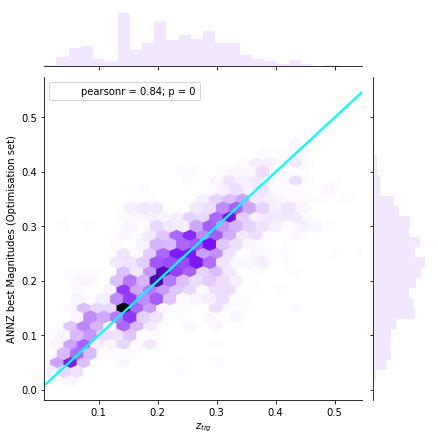

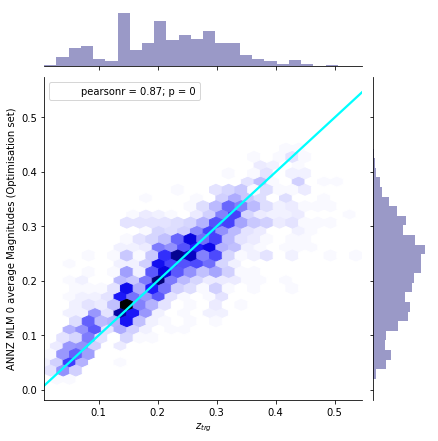

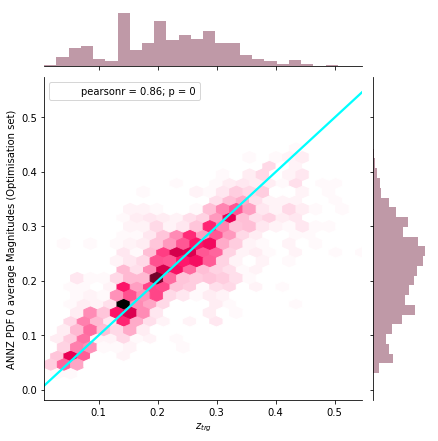

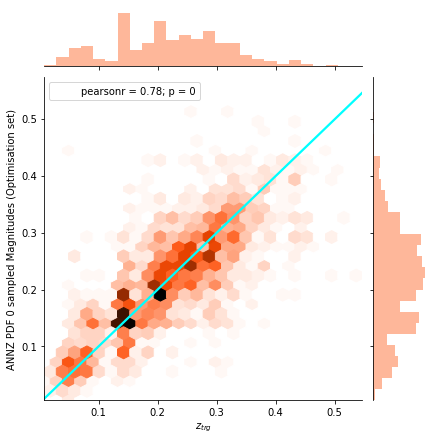

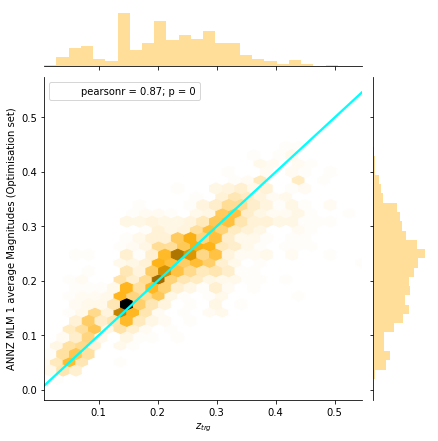

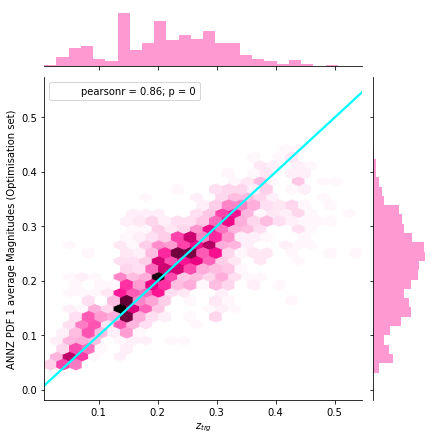

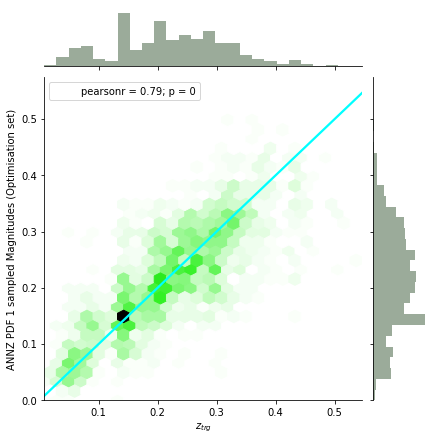

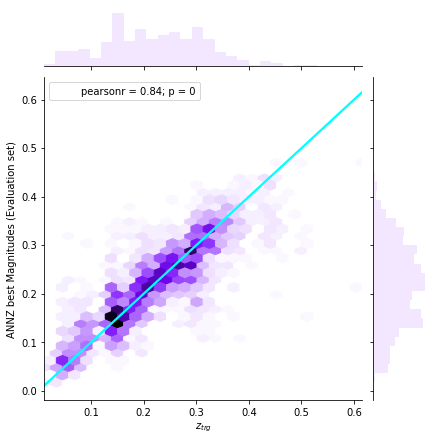

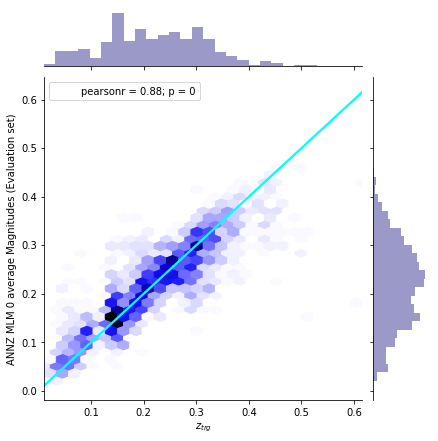

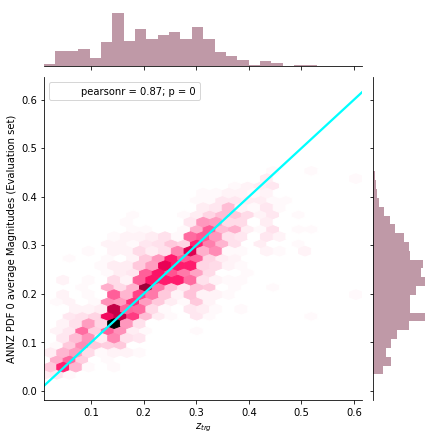

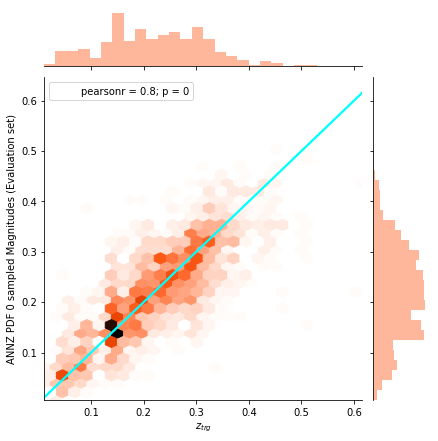

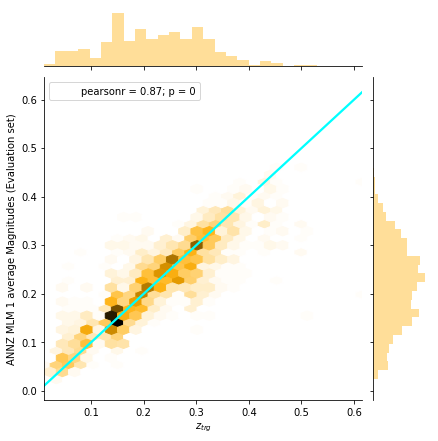

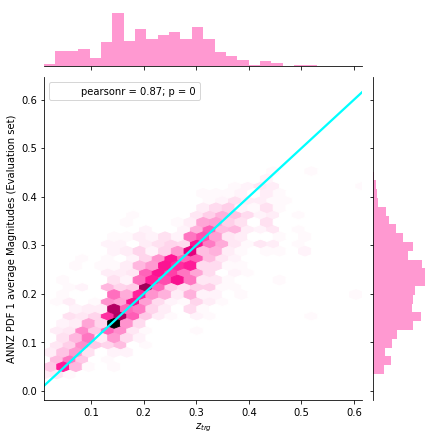

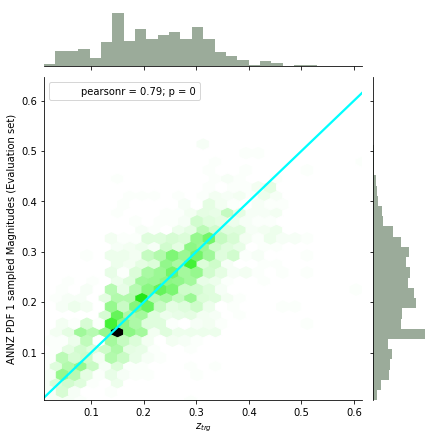

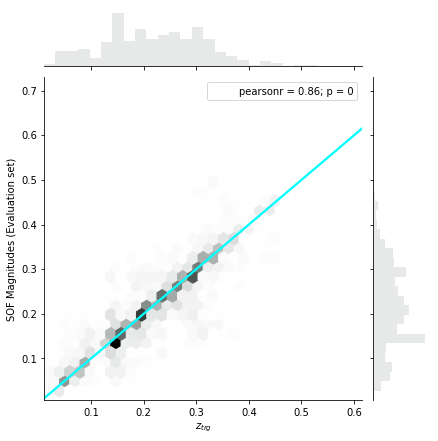

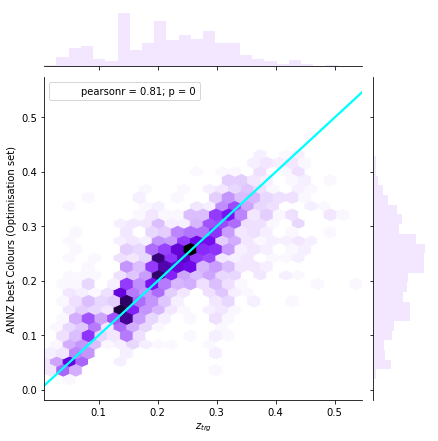

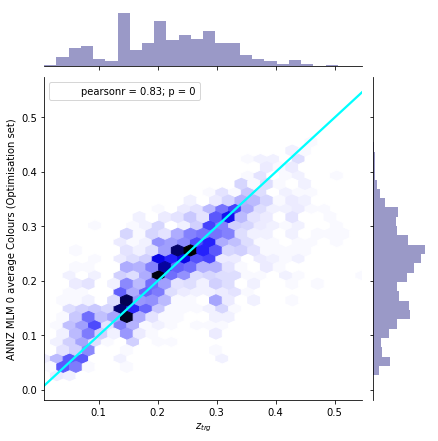

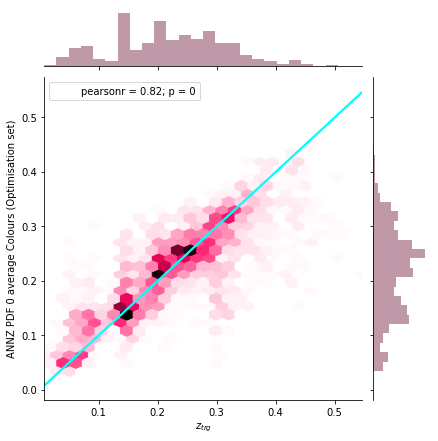

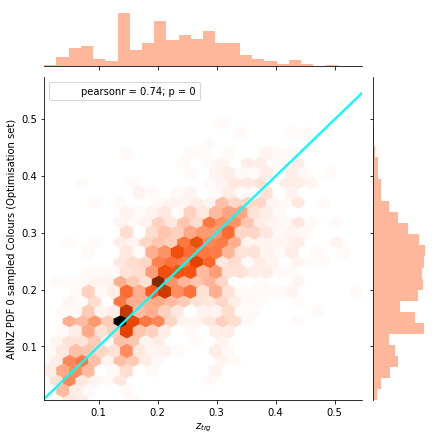

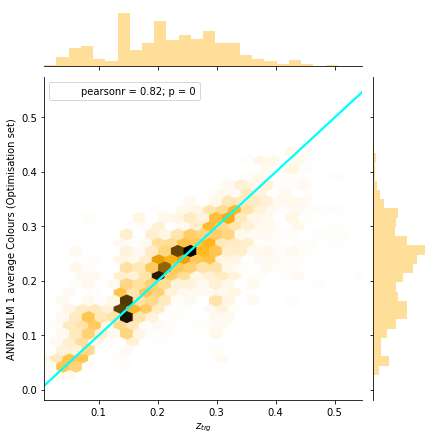

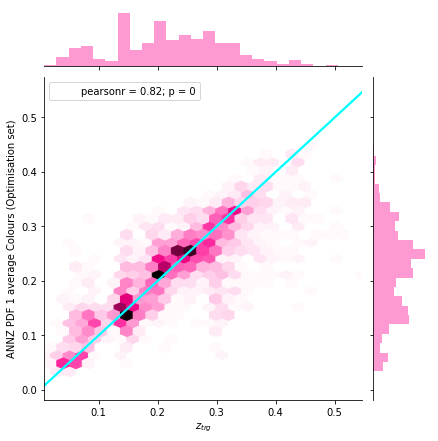

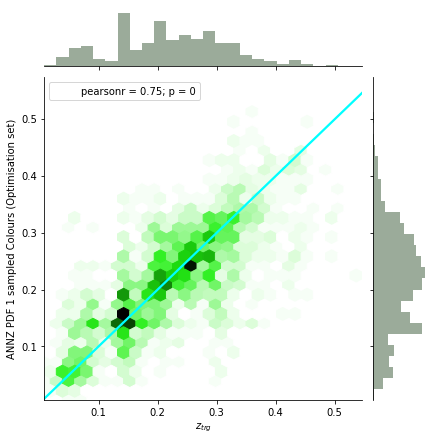

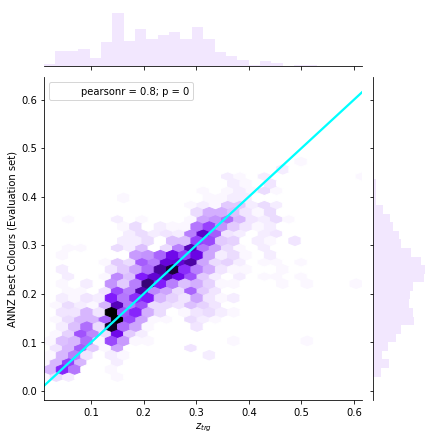

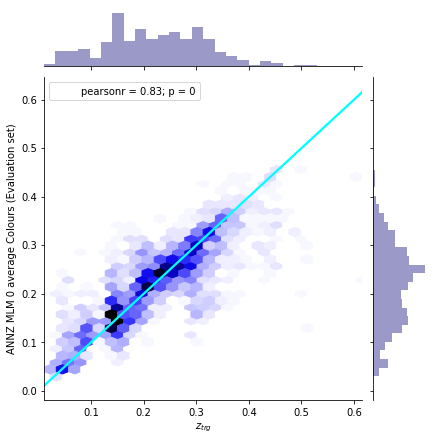

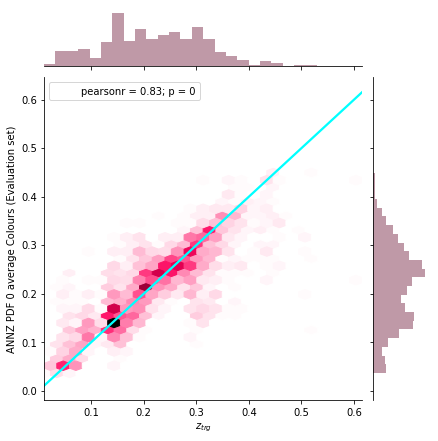

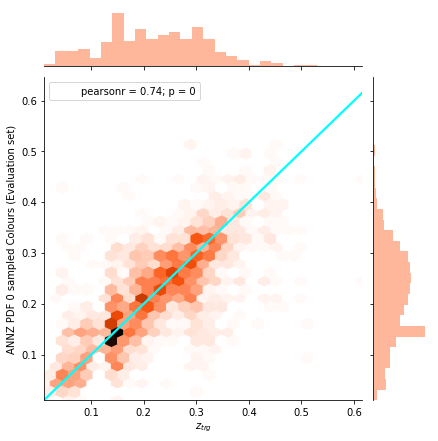

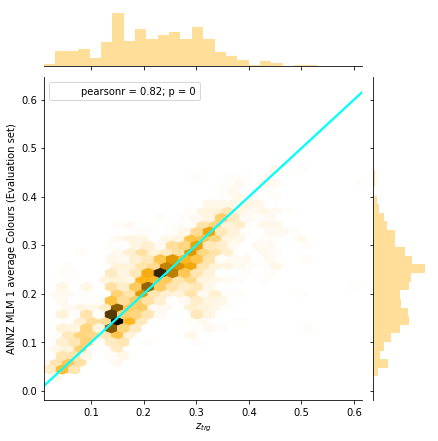

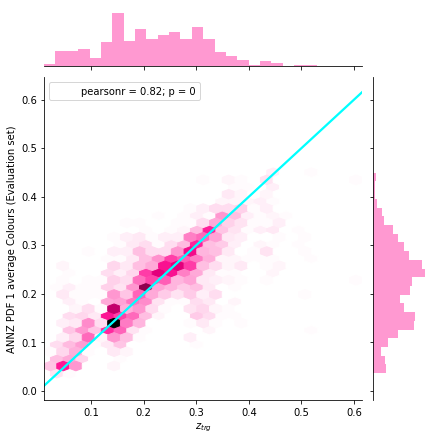

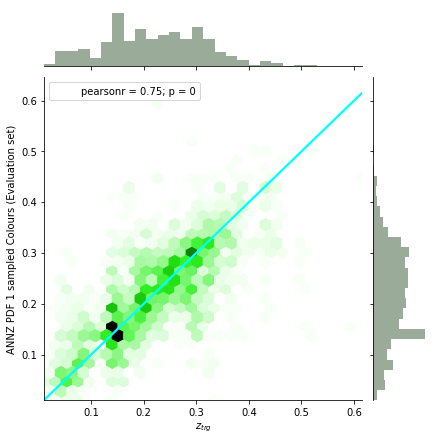

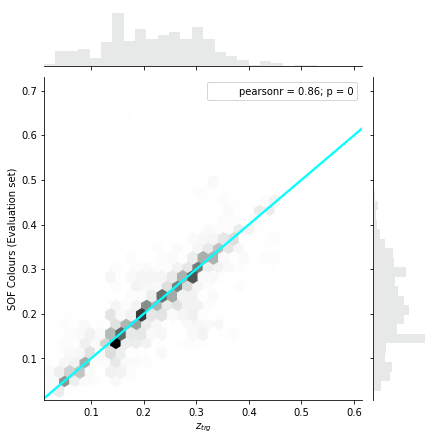

In [8]:
plot_colors_optim = ('xkcd:light lavender', 'xkcd:deep blue', 'xkcd:burgundy', 'xkcd:blood orange', 'xkcd:orange yellow', 'xkcd:hot pink', 'xkcd:very dark green')
xticks_optim = ['ANNZ best', 'ANNZ MLM 0 average', 'ANNZ PDF 0 average', 'ANNZ PDF 0 sampled', 'ANNZ MLM 1 average', 'ANNZ PDF 1 average', 'ANNZ PDF 1 sampled']
plot_colors_eval = ('xkcd:light lavender', 'xkcd:deep blue', 'xkcd:burgundy', 'xkcd:blood orange', 'xkcd:orange yellow', 'xkcd:hot pink', 'xkcd:very dark green', 'xkcd:silver')
xticks_eval = ['ANNZ best', 'ANNZ MLM 0 average', 'ANNZ PDF 0 average', 'ANNZ PDF 0 sampled', 'ANNZ MLM 1 average', 'ANNZ PDF 1 average', 'ANNZ PDF 1 sampled', 'SOF']
for k, n in zip(file_type.keys(), file_names):
    if 'optim' in k:
        for x, t, c in zip(xnames_optim, xticks_optim, plot_colors_optim):
            ztype['{}_{}_sns'.format(k, x)] = sns.jointplot(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_{}'.format(k, x)], kind='hex', color='{}'.format(c))
            fig = (ztype['{}_{}_sns'.format(k, x)]).set_axis_labels('$z_{trg}$', '{} {}'.format(t, n))
            sns.regplot(gradient, gradient, ax=(ztype['{}_{}_sns'.format(k, x)]).ax_joint, scatter=False, color='xkcd:cyan')
            fig.savefig('{}Hexbin_{}.png'.format(x, k))
    else:
        for x, t, c in zip(xnames_eval, xticks_eval, plot_colors_eval):
            ztype['{}_{}_sns'.format(k, x)] = sns.jointplot(x=ztype['{}_ztrue'.format(k)], y=ztype['{}_{}'.format(k, x)], kind='hex', color='{}'.format(c))
            fig = (ztype['{}_{}_sns'.format(k, x)]).set_axis_labels('$z_{trg}$', '{} {}'.format(t, n))
            sns.regplot(gradient, gradient, ax=(ztype['{}_{}_sns'.format(k, x)]).ax_joint, scatter=False, color='xkcd:cyan')
            fig.savefig('{}Hexbin_{}.png'.format(x, k))

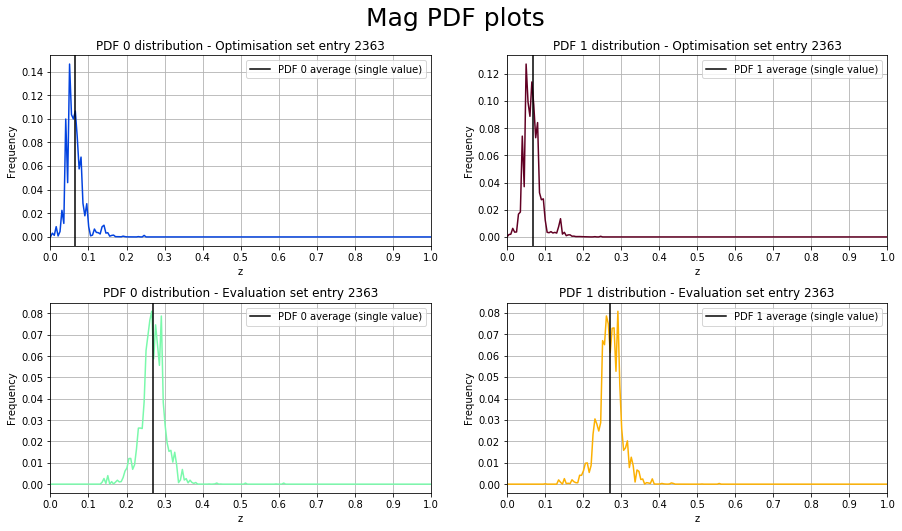

In [9]:
#PDF plot of the last entry in mag files, row 2363 for optimisation file, row 2362 for evaluation file due to slightly uneven file split 
fig = plt.figure(figsize=(15,9))
fig.subplots_adjust(hspace=0.3)
title = fig.suptitle('Mag PDF plots', fontsize=25) #global title

ax1 = plt.subplot(221)
ax1.plot(pdf_size, mags_optim_row2363_zpdf0, color='xkcd:blue')
ax1.axvline(x=mags_optim_zpdf0_avg[2363], label='PDF 0 average (single value)', color='xkcd:black')
ax1.grid()
ax1.legend()
ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.xlabel('z')
plt.xlim(0.0, 1.0)
plt.ylabel('Frequency')
plt.title('PDF 0 distribution - Optimisation set entry 2363')

ax2 = plt.subplot(222)
ax2.plot(pdf_size, mags_optim_row2363_zpdf1, color='xkcd:burgundy')
ax2.axvline(x=mags_optim_zpdf1_avg[2363], label='PDF 1 average (single value)', color='xkcd:black')
ax2.grid()
ax2.legend()
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.xlabel('z')
plt.xlim(0.0, 1.0)
plt.ylabel('Frequency')
plt.title('PDF 1 distribution - Optimisation set entry 2363')

ax3 = plt.subplot(223)
ax3.plot(pdf_size, mags_eval_row2362_zpdf0, color='xkcd:seafoam green')
ax3.axvline(x=mags_eval_zpdf0_avg[2362], label='PDF 0 average (single value)', color='xkcd:black')
ax3.grid()
ax3.legend()
ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.xlabel('z')
plt.xlim(0.0, 1.0)
plt.ylabel('Frequency')
plt.title('PDF 0 distribution - Evaluation set entry 2363')

ax4 = plt.subplot(224)
ax4.plot(pdf_size, mags_eval_row2362_zpdf1, color='xkcd:yellow orange')
ax4.axvline(x=mags_eval_zpdf1_avg[2362], label='PDF 1 average (single value)', color='xkcd:black')
ax4.grid()
ax4.legend()
ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.xlabel('z')
plt.xlim(0.0, 1.0)
plt.ylabel('Frequency')
plt.title('PDF 1 distribution - Evaluation set entry 2363')

title.set_y(0.875)
fig.subplots_adjust(top=0.8)
plt.show();

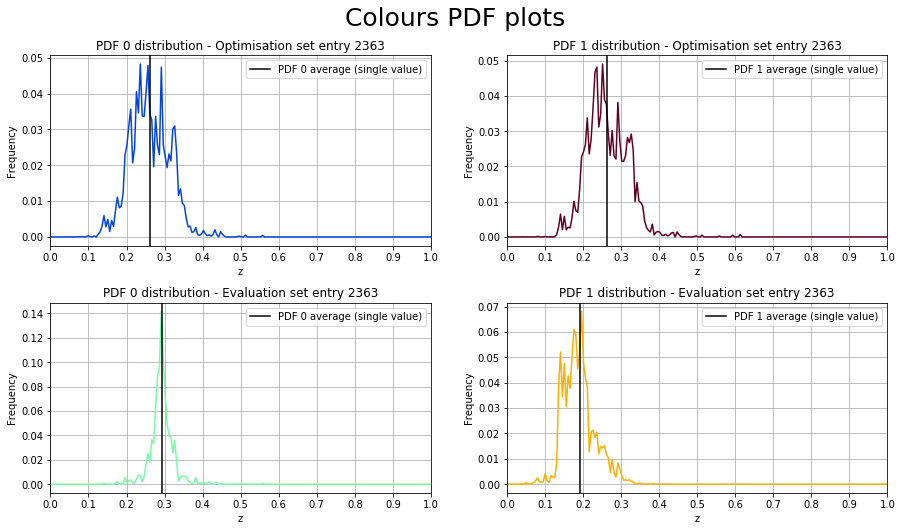

In [10]:
#PDF plot of the last entry in colour files, row 2363 for optimisation file, row 2362 for evaluation file due to slightly uneven file split 
fig = plt.figure(figsize=(15,9))
fig.subplots_adjust(hspace=0.3)
title = fig.suptitle('Colours PDF plots', fontsize=25) #global title

ax1 = plt.subplot(221)
ax1.plot(pdf_size, colors_optim_row2363_zpdf0, color='xkcd:blue')
ax1.axvline(x=colors_optim_zpdf0_avg[2363], label='PDF 0 average (single value)', color='xkcd:black')
ax1.grid()
ax1.legend()
ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.xlabel('z')
plt.xlim(0.0, 1.0)
plt.ylabel('Frequency')
plt.title('PDF 0 distribution - Optimisation set entry 2363')

ax2 = plt.subplot(222)
ax2.plot(pdf_size, colors_optim_row2363_zpdf1, color='xkcd:burgundy')
ax2.axvline(x=colors_optim_zpdf1_avg[2363], label='PDF 1 average (single value)', color='xkcd:black')
ax2.grid()
ax2.legend()
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.xlabel('z')
plt.xlim(0.0, 1.0)
plt.ylabel('Frequency')
plt.title('PDF 1 distribution - Optimisation set entry 2363')

ax3 = plt.subplot(223)
ax3.plot(pdf_size, colors_eval_row2362_zpdf0, color='xkcd:seafoam green')
ax3.axvline(x=colors_eval_zpdf0_avg[2362], label='PDF 0 average (single value)', color='xkcd:black')
ax3.grid()
ax3.legend()
ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.xlabel('z')
plt.xlim(0.0, 1.0)
plt.ylabel('Frequency')
plt.title('PDF 0 distribution - Evaluation set entry 2363')

ax4 = plt.subplot(224)
ax4.plot(pdf_size, colors_eval_row234_zpdf1, color='xkcd:yellow orange')
ax4.axvline(x=colors_eval_zpdf1_avg[234], label='PDF 1 average (single value)', color='xkcd:black')
ax4.grid()
ax4.legend()
ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.xlabel('z')
plt.xlim(0.0, 1.0)
plt.ylabel('Frequency')
plt.title('PDF 1 distribution - Evaluation set entry 2363')

title.set_y(0.875)
fig.subplots_adjust(top=0.8)
plt.show();

In [11]:
for k, v in file_type.items(): #iterate through keys and values
    for m in range (0,2): #iterate through both PDF types
        pdf_sets['{}_zpdf{}_stack'.format(k, m)] = np.zeros([200,1]) #create empty arrays of correct dimension for each stacked PDF
        for l in range(0, ztype['{}_range'.format(k)]): #run through each row of every file
            pdf_sets['{}_zpdf{}_stack'.format(k, m)] += pdf_sets['{}_row{}_zpdf{}'.format(k, l, m)] #sum the PDF arrays 
            
        pdf_sets['{}_zpdf{}_stack'.format(k, m)] /= ztype['{}_range'.format(k)] #normalise the stacked arrays

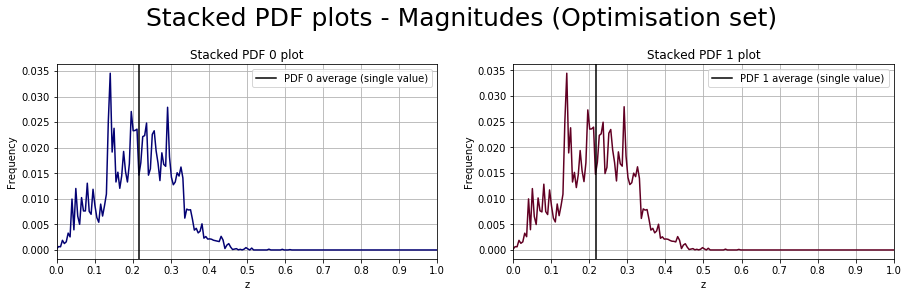

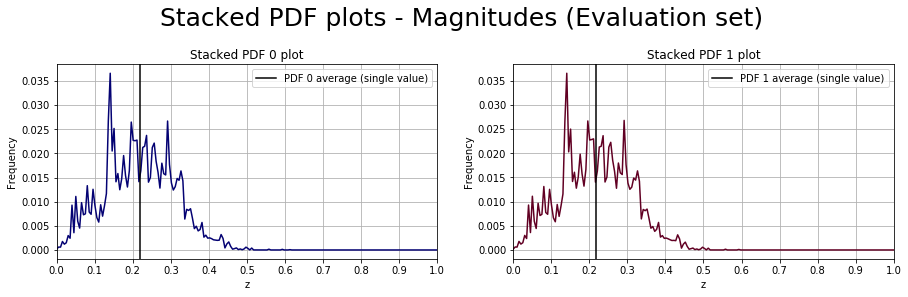

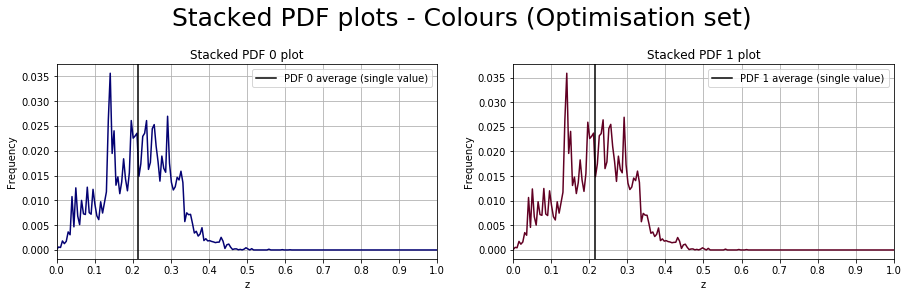

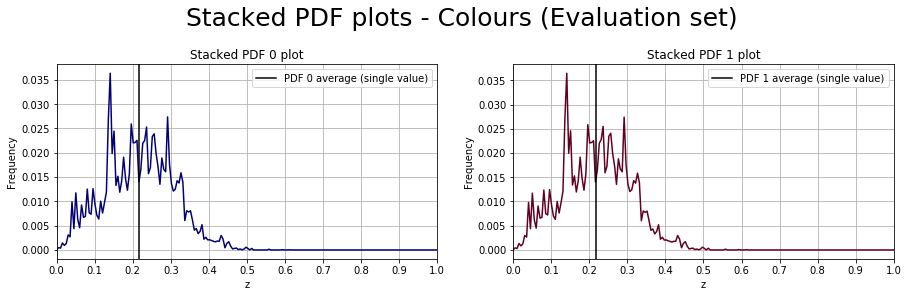

In [12]:
#plot the stacked arrays
for k, n in zip(file_type.keys(), file_names):
    fig = plt.figure(figsize=(15,4))
    fig.subplots_adjust(hspace=0.3)
    title = fig.suptitle('Stacked PDF plots - {}'.format(n), fontsize=25) #global title
    
    ax1 = plt.subplot(121)
    ax1.plot(pdf_size, ztype['{}_zpdf0_stack'.format(k)], color='xkcd:deep blue')
    ax1.axvline(x=np.mean(ztype['{}_zpdf0_avg'.format(k)]), label='PDF 0 average (single value)', color='xkcd:black')
    ax1.grid()
    ax1.legend()
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.xlabel('z')
    plt.xlim(0.0, 1.0)
    plt.ylabel('Frequency')
    plt.title('Stacked PDF 0 plot')
    
    ax2 = plt.subplot(122)
    ax2.plot(pdf_size, ztype['{}_zpdf1_stack'.format(k)], color='xkcd:burgundy')
    ax2.axvline(x=np.mean(ztype['{}_zpdf1_avg'.format(k)]), label='PDF 1 average (single value)', color='xkcd:black')
    ax2.grid()
    ax2.legend()
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.xlabel('z')
    plt.xlim(0.0, 1.0)
    plt.ylabel('Frequency')
    plt.title('Stacked PDF 1 plot')
    
    title.set_y(1)
    fig.subplots_adjust(top=0.8)
    plt.show();

In [61]:
plot_info = globals() #dictionary holding the constants needed for binned plots
for k in file_type.keys(): #iterate through files
    plot_info['{}_bins'.format(k)] = np.arange(0.0, 1.0, 0.05)  #array between 0 and 1, delta = 0.025
    plot_info['{}_bin_count'.format(k)] = np.count_nonzero(plot_info['{}_bins'.format(k)]) #number of bins used to sort ztrue
    plot_info['{}_bin_delta'.format(k)] = plot_info['{}_bins'.format(k)][1] - plot_info['{}_bins'.format(k)][0] #bin width, assumed constant for all bins
    plot_info['{}_bin_centres'.format(k)] = plot_info['{}_bins'.format(k)] + (plot_info['{}_bin_delta'.format(k)]/2) #centre point for each bin, used to plot points for each bin
    plot_info['{}_bin_centres'.format(k)] = plot_info['{}_bin_centres'.format(k)][:-1] #remove the last array element, surplus

C:\Users\zakin\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


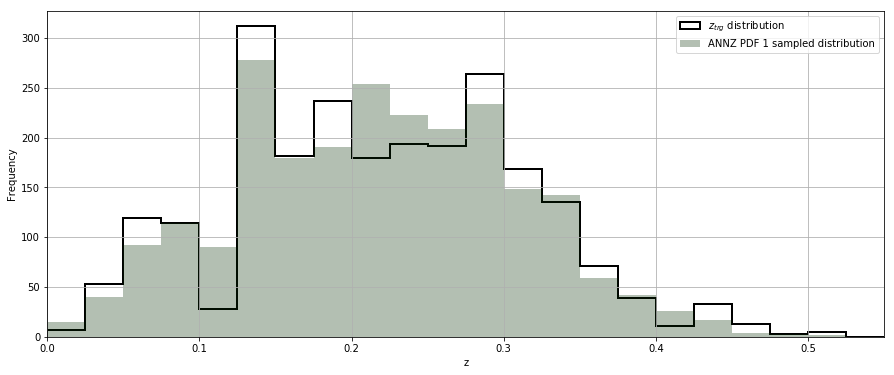

In [59]:
fig = plt.figure(figsize=(15,6))

plt.hist(x=mags_eval_ztrue, bins=mags_eval_bins, color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
plt.hist(x=mags_eval_zpdf1_sample, bins=mags_eval_bins, color='xkcd:very dark green', label='ANNZ PDF 1 sampled distribution', alpha=0.3)
#plt.hist(x=mags_eval_zpdf1_sample, bins=mags_eval_bins, color='xkcd:light green', label='ANNZ PDF 1 sample', alpha=0.2)
plt.xlabel('z')
plt.xlim(0, 0.55)
plt.ylabel('Frequency')
plt.grid()
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1)) #change tick frequency
plt.legend()
plt.show()
#fig.savefig('mag_eval_pdf1_sampled_zbin0.025.png')

C:\Users\zakin\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


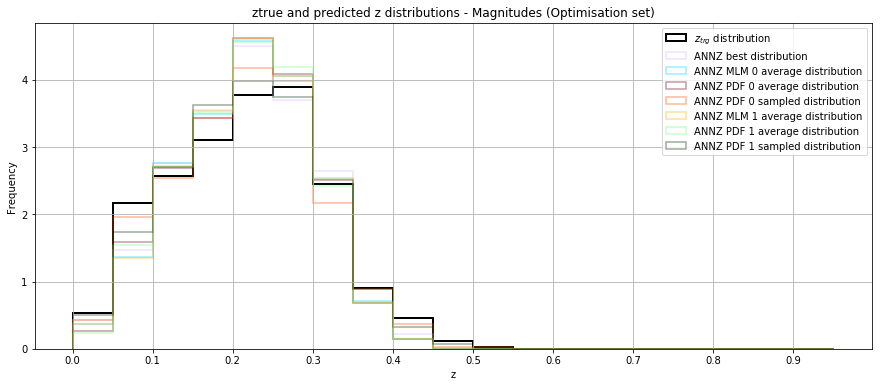

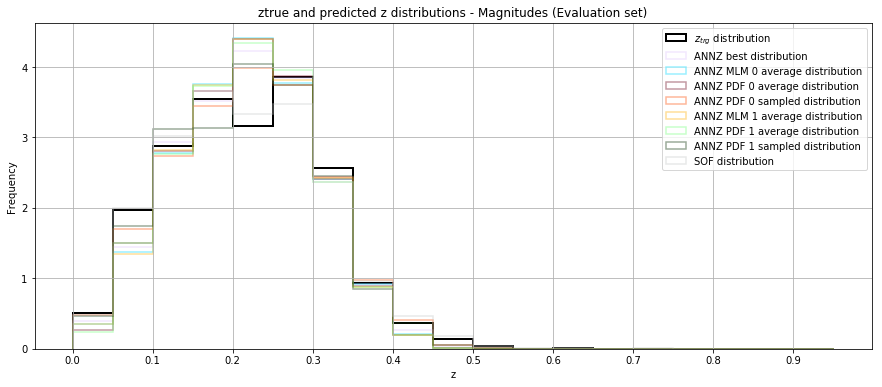

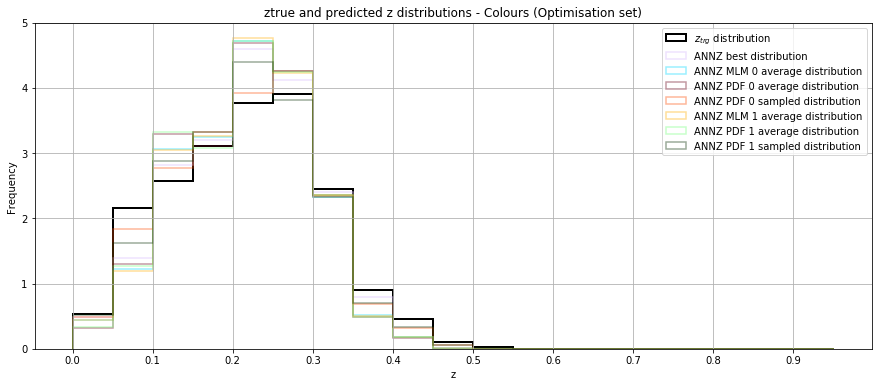

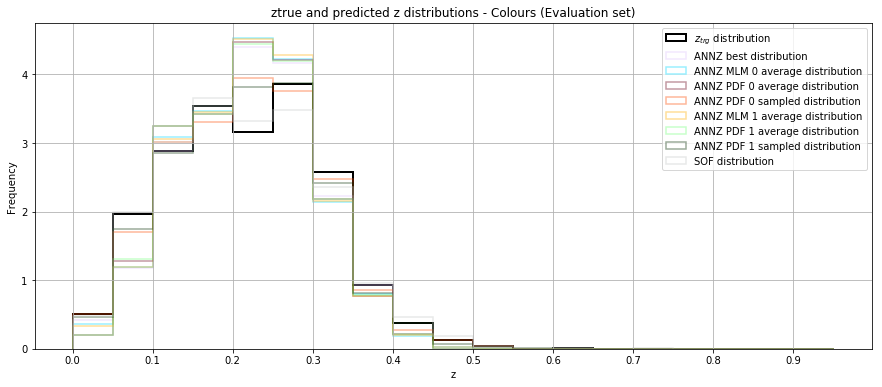

In [45]:
#binned plot of each of the z distributions, although not very clear due to number of plots, seperate plots later on
for k, n in zip(file_type.keys(), file_names):
    if 'optim' in k:
        fig = plt.figure(figsize=(15,6))

        plt.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2, normed=True)
        plt.hist(x=ztype['{}_zbest'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:light lavender', label='ANNZ best distribution', alpha=0.5, histtype=u'step', linewidth=1.5, normed=True)
        plt.hist(x=ztype['{}_zmlm0_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:neon blue', label='ANNZ MLM 0 average distribution', alpha=0.4, histtype=u'step', linewidth=1.5, normed=True)
        plt.hist(x=ztype['{}_zpdf0_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:claret', label='ANNZ PDF 0 average distribution', alpha=0.4, histtype=u'step', linewidth=1.5, normed=True)
        plt.hist(x=ztype['{}_zpdf0_sample'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:blood orange', label='ANNZ PDF 0 sampled distribution', alpha=0.4, histtype=u'step', linewidth=1.5, normed=True)
        plt.hist(x=ztype['{}_zmlm1_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:orange yellow', label='ANNZ MLM 1 average distribution', alpha=0.4, histtype=u'step', linewidth=1.5, normed=True)
        plt.hist(x=ztype['{}_zpdf1_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:lightgreen', label='ANNZ PDF 1 average distribution', alpha=0.4, histtype=u'step', linewidth=1.5, normed=True)
        plt.hist(x=ztype['{}_zpdf1_sample'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:very dark green', label='ANNZ PDF 1 sampled distribution', alpha=0.4, histtype=u'step', linewidth=1.5, normed=True)          
        plt.title('ztrue and predicted z distributions - {}'.format(n))
        plt.xlabel('z')
        plt.ylabel('Frequency')
        plt.grid()
        ax = plt.axes()
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1)) #change tick frequency
        plt.legend()
        plt.show()
        #fig.savefig('optim_z_dist.png')
        
    else:
        fig = plt.figure(figsize=(15,6))

        plt.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2, normed=True)
        plt.hist(x=ztype['{}_zbest'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:light lavender', label='ANNZ best distribution', alpha=0.4, histtype=u'step', linewidth=1.5, normed=True)
        plt.hist(x=ztype['{}_zmlm0_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:neon blue', label='ANNZ MLM 0 average distribution', alpha=0.4, histtype=u'step', linewidth=1.5, normed=True)
        plt.hist(x=ztype['{}_zpdf0_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:claret', label='ANNZ PDF 0 average distribution', alpha=0.4, histtype=u'step', linewidth=1.5, normed=True)
        plt.hist(x=ztype['{}_zpdf0_sample'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:blood orange', label='ANNZ PDF 0 sampled distribution', alpha=0.4, histtype=u'step', linewidth=1.5, normed=True)
        plt.hist(x=ztype['{}_zmlm1_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:orange yellow', label='ANNZ MLM 1 average distribution', alpha=0.4, histtype=u'step', linewidth=1.5, normed=True)
        plt.hist(x=ztype['{}_zpdf1_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:lightgreen', label='ANNZ PDF 1 average distribution', alpha=0.4, histtype=u'step', linewidth=1.5, normed=True)
        plt.hist(x=ztype['{}_zpdf1_sample'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:very dark green', label='ANNZ PDF 1 sampled distribution', alpha=0.4, histtype=u'step', linewidth=1.5, normed=True)     
        plt.hist(x=ztype['{}_SOF'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:silver', label='SOF distribution', alpha=0.4, histtype=u'step', linewidth=1.5, normed=True)     
        plt.title('ztrue and predicted z distributions - {}'.format(n))
        plt.xlabel('z')
        plt.ylabel('Frequency')
        plt.grid()
        ax = plt.axes()
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1)) #change tick frequency
        plt.legend()
        plt.show()
        #fig.savefig('optim_z_dist.png')

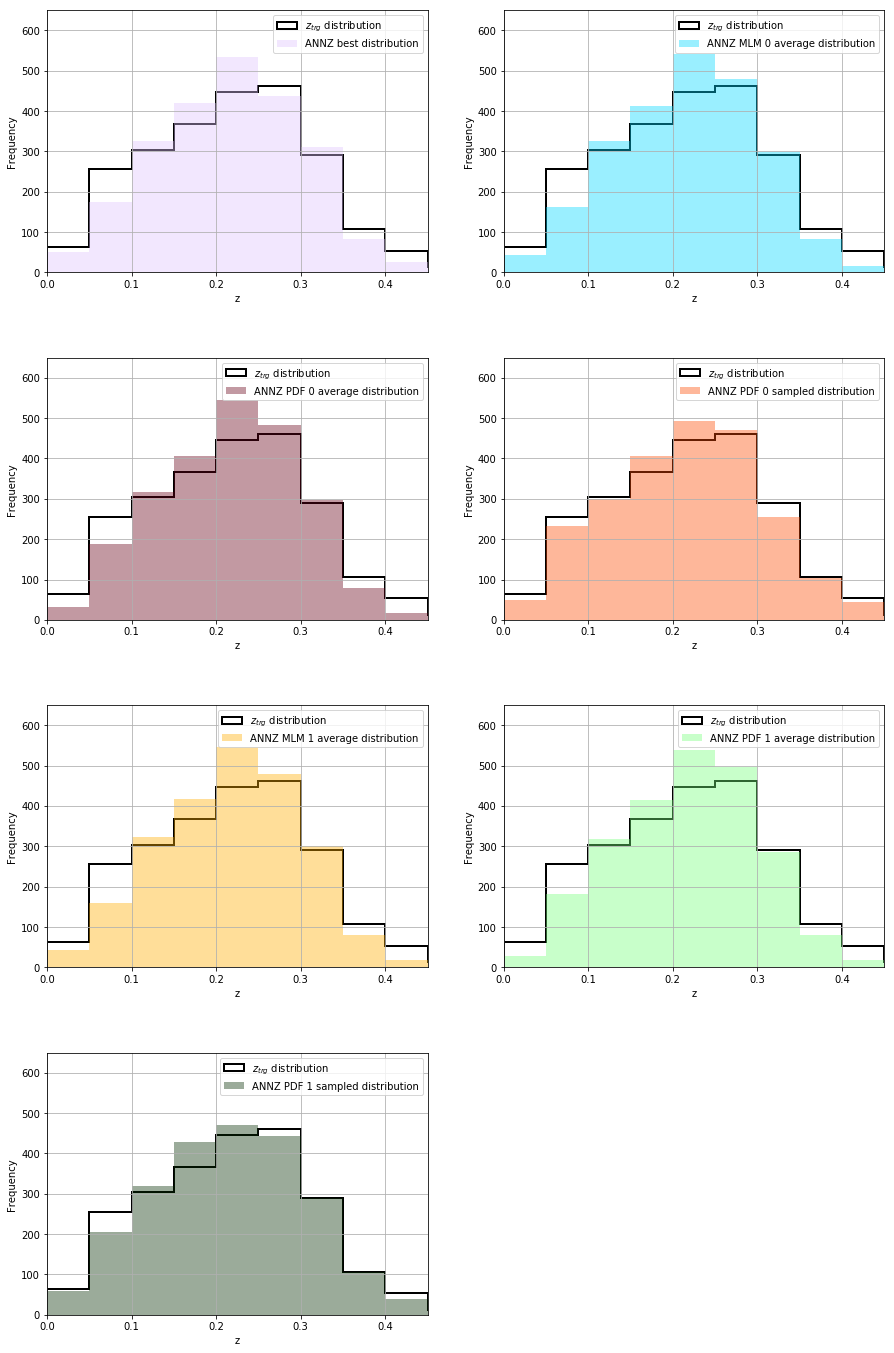

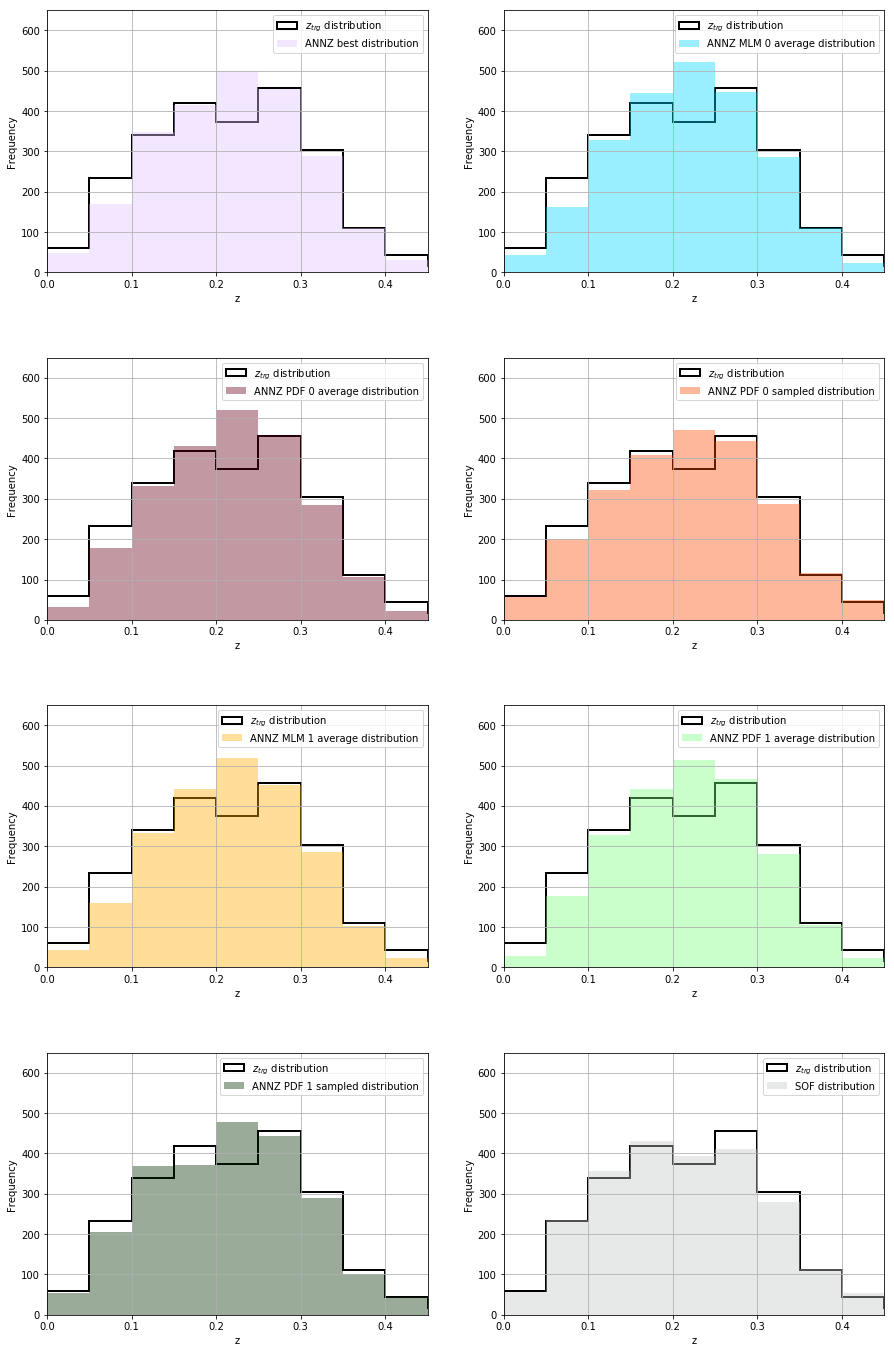

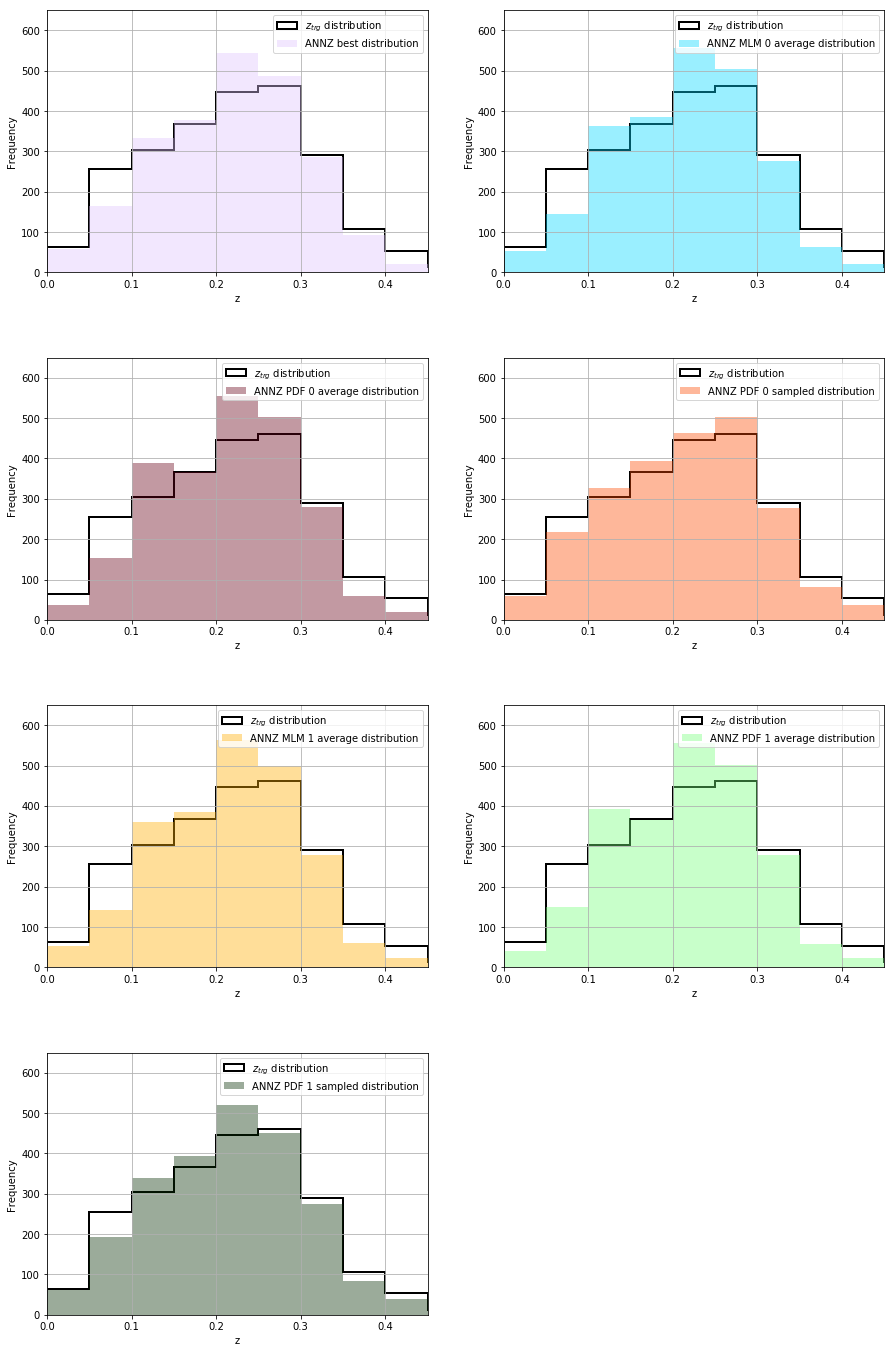

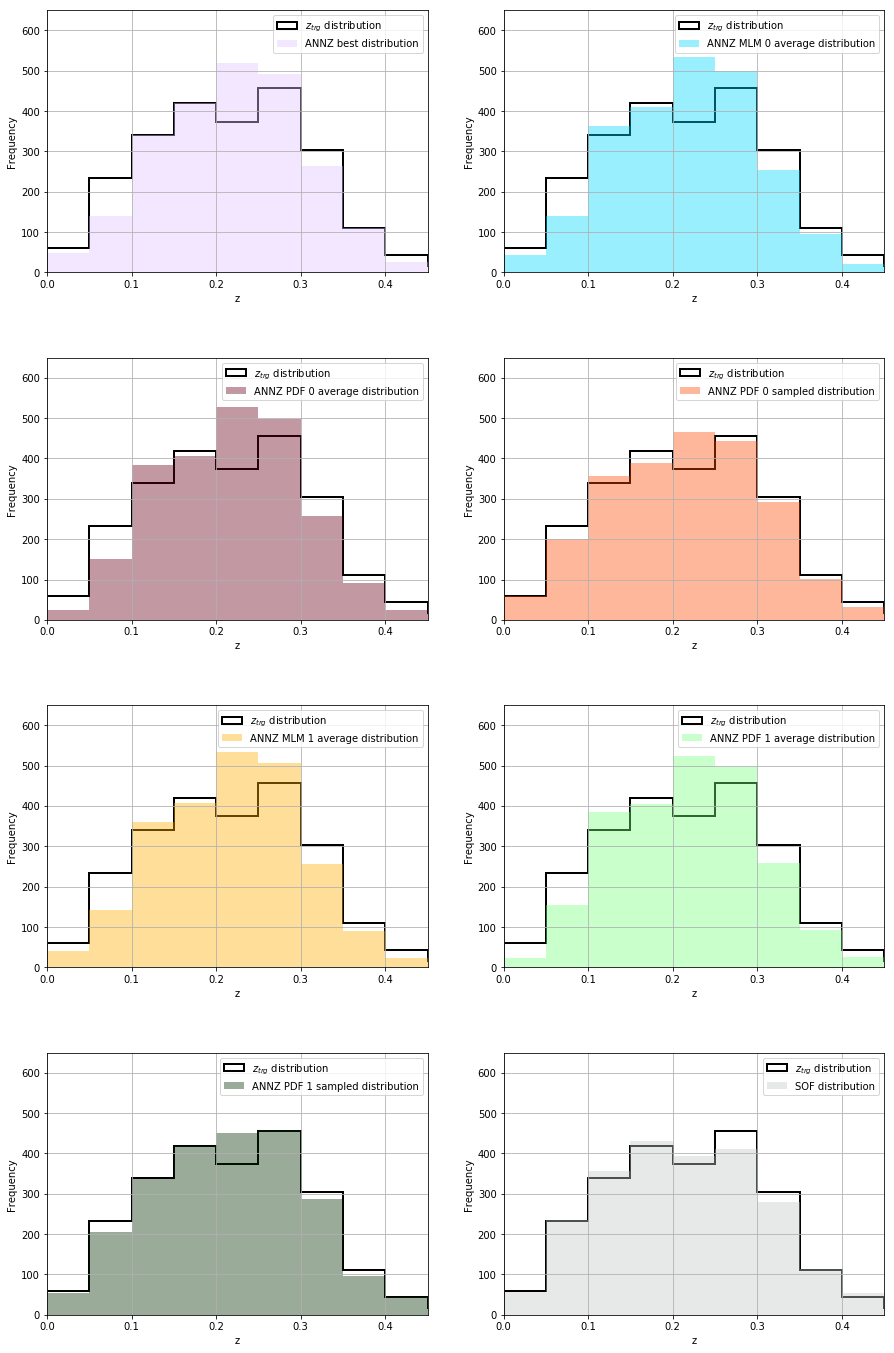

In [74]:
#seperate plots
for k, n in zip(file_type.keys(), file_names):
    if 'optim' in k:
        fig = plt.figure(figsize=(15,24))
        fig.subplots_adjust(hspace=0.325)
        #title = fig.suptitle('z distributions of ztrue vs. prediction sets {}'.format(n), fontsize=25) #global title

        ax1 = plt.subplot(421)
        ax1.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax1.hist(x=ztype['{}_zbest'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:light lavender', label='ANNZ best distribution', alpha=0.4)
        ax1.grid()
        ax1.legend()
        ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. ANNZ best')
        #extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_zbest_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))

        ax2 = plt.subplot(422)
        ax2.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax2.hist(x=ztype['{}_zmlm0_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:neon blue', label='ANNZ MLM 0 average distribution', alpha=0.4)
        ax2.grid()
        ax2.legend()
        ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. ANNZ MLM 0 average')
        #extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_zmlm0_avg_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))

        ax3 = plt.subplot(423)
        ax3.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax3.hist(x=ztype['{}_zpdf0_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:claret', label='ANNZ PDF 0 average distribution', alpha=0.4)
        ax3.grid()
        ax3.legend()
        ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. ANNZ PDF 0 average')
        #extent = ax3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_zpdf0_avg_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))

        ax4 = plt.subplot(424)
        ax4.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax4.hist(x=ztype['{}_zpdf0_sample'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:blood orange', label='ANNZ PDF 0 sampled distribution', alpha=0.4)
        ax4.grid()
        ax4.legend()
        ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. ANNZ PDF 0 sampled')
        #extent = ax4.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_zpdf0_sample_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))

        ax5 = plt.subplot(425)
        ax5.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax5.hist(x=ztype['{}_zmlm1_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:orange yellow', label='ANNZ MLM 1 average distribution', alpha=0.4)
        ax5.grid()
        ax5.legend()
        ax5.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. ANNZ MLM 1 average')
        #extent = ax5.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_zmlm1_avg_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))

        ax6 = plt.subplot(426)
        ax6.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax6.hist(x=ztype['{}_zpdf1_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:lightgreen', label='ANNZ PDF 1 average distribution', alpha=0.4)
        ax6.grid()
        ax6.legend()
        ax6.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. ANNZ PDF 1 average
        #extent = ax6.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_zpdf1_avg_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))

        ax7 = plt.subplot(427)
        ax7.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax7.hist(x=ztype['{}_zpdf1_sample'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:very dark green', label='ANNZ PDF 1 sampled distribution', alpha=0.4)
        ax7.grid()
        ax7.legend()
        ax7.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. ANNZ PDF 1 sampled')
        #extent = ax7.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_zpdf1_sample_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))
        fig.savefig('{}_hist.png'.format(k))
        #title.set_y(1)
        #fig.subplots_adjust(top=0.95)
        plt.show()
        
    else:
        fig = plt.figure(figsize=(15,24))
        fig.subplots_adjust(hspace=0.325)
        #title = fig.suptitle('z distributions of ztrue vs. prediction sets {}'.format(n), fontsize=25) #global title

        ax1 = plt.subplot(421)
        ax1.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax1.hist(x=ztype['{}_zbest'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:light lavender', label='ANNZ best distribution', alpha=0.4)
        ax1.grid()
        ax1.legend()
        ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. ANNZ best')
        #extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_zbest_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))

        ax2 = plt.subplot(422)
        ax2.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax2.hist(x=ztype['{}_zmlm0_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:neon blue', label='ANNZ MLM 0 average distribution', alpha=0.4)
        ax2.grid()
        ax2.legend()
        ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. ANNZ MLM 0 average')
        #extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_zmlm0_avg_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))

        ax3 = plt.subplot(423)
        ax3.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax3.hist(x=ztype['{}_zpdf0_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:claret', label='ANNZ PDF 0 average distribution', alpha=0.4)
        ax3.grid()
        ax3.legend()
        ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. ANNZ PDF 0 average')
        #extent = ax3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_zpdf0_avg_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))

        ax4 = plt.subplot(424)
        ax4.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax4.hist(x=ztype['{}_zpdf0_sample'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:blood orange', label='ANNZ PDF 0 sampled distribution', alpha=0.4)
        ax4.grid()
        ax4.legend()
        ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. ANNZ PDF 0 sampled')
        #extent = ax4.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_zpdf0_sample_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))

        ax5 = plt.subplot(425)
        ax5.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax5.hist(x=ztype['{}_zmlm1_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:orange yellow', label='ANNZ MLM 1 average distribution', alpha=0.4)
        ax5.grid()
        ax5.legend()
        ax5.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. ANNZ MLM 1 average')
        #extent = ax5.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_zmlm1_avg_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))

        ax6 = plt.subplot(426)
        ax6.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax6.hist(x=ztype['{}_zpdf1_avg'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:lightgreen', label='ANNZ PDF 1 average distribution', alpha=0.4)
        ax6.grid()
        ax6.legend()
        ax6.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. ANNZ PDF 1 average')
        #extent = ax6.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_zpdf1_avg_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))

        ax7 = plt.subplot(427)
        ax7.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax7.hist(x=ztype['{}_zpdf1_sample'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:very dark green', label='ANNZ PDF 1 sampled distribution', alpha=0.4)
        ax7.grid()
        ax7.legend()
        ax7.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. ANNZ PDF 1 sampled')
        #extent = ax7.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_zpdf1_sample_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))

        ax8 = plt.subplot(428)
        ax8.hist(x=ztype['{}_ztrue'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
        ax8.hist(x=ztype['{}_SOF'.format(k)], bins=plot_info['{}_bins'.format(k)], color='xkcd:silver', label='SOF distribution', alpha=0.4)
        ax8.grid()
        ax8.legend()
        ax8.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        plt.xlabel('z')
        plt.xlim(0.0, 0.45)
        plt.ylabel('Frequency')
        plt.ylim(0.0, 650)
        #plt.title('z distribution - $z_{trg}$ vs. SOF')
        #extent = ax8.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig('{}_SOF_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))
        fig.savefig('{}_hist.png'.format(k))
        #title.set_y(1)
        #fig.subplots_adjust(top=0.95)
        plt.show()

C:\Users\zakin\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0.0, 575)

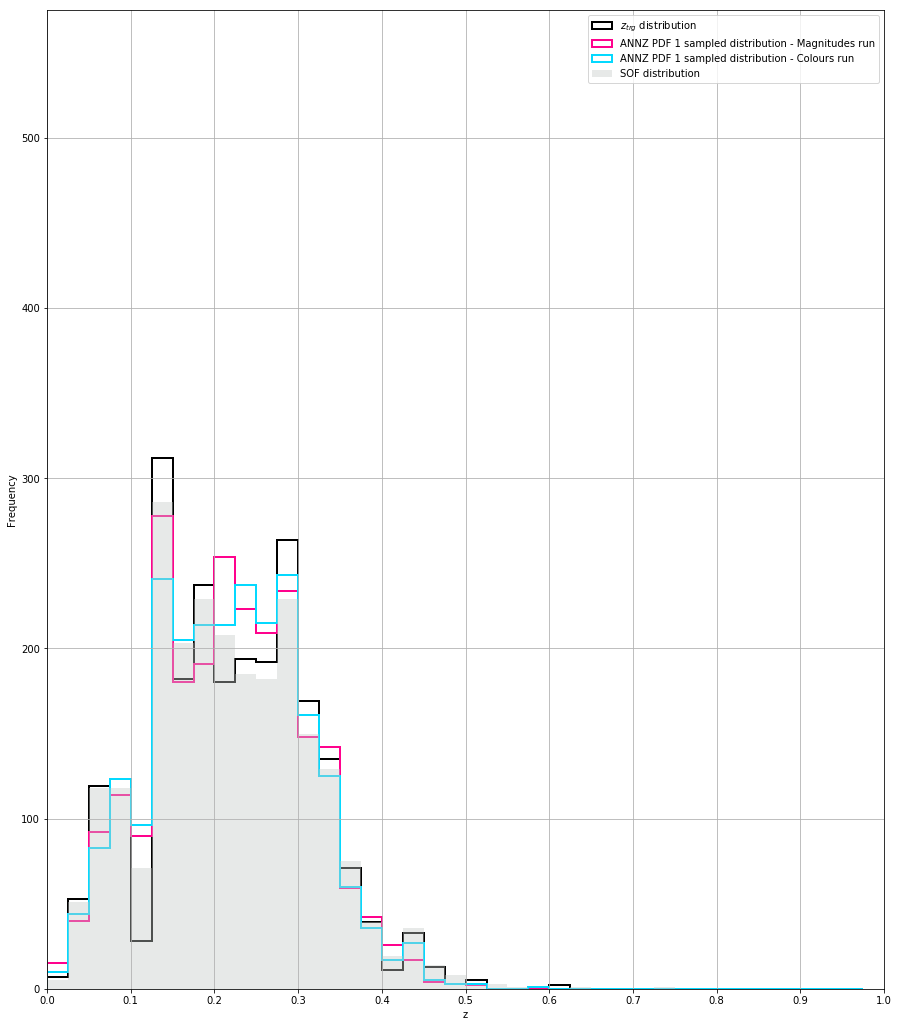

In [17]:
fig = plt.figure(figsize=(15,18))
plt.hist(x=mags_eval_ztrue, bins=mags_eval_bins, color='xkcd:black', label='$z_{trg}$ distribution', histtype=u'step', linewidth=2)
plt.hist(x=mags_eval_zpdf1_sample, bins=mags_eval_bins, color='xkcd:hot pink', label='ANNZ PDF 1 sampled distribution - Magnitudes run', histtype=u'step', linewidth=2)
plt.hist(x=colors_eval_zpdf1_sample, bins=mags_eval_bins, color='xkcd:neon blue', label='ANNZ PDF 1 sampled distribution - Colours run', histtype=u'step', linewidth=2)
plt.hist(x=mags_eval_SOF, bins=mags_eval_bins, color='xkcd:silver', label='SOF distribution', alpha=0.4)
plt.grid()
plt.legend()
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1)) #change tick frequency
plt.xlabel('z')
plt.xlim(0.0, 1.0)
plt.ylabel('Frequency')
plt.ylim(0.0, 575)
#plt.title('z distribution - $z_{trg}$ vs. ANNZ PDF 1 sampled')
#extent = ax7.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#fig.savefig('{}_zpdf1_sample_hist'.format(k), bbox_inches=extent.expanded(1.25, 1.3))

In [18]:
for k in file_type.keys():
    ztype['{}_ks_array'.format(k)] = ztype['{}_ksp_array'.format(k)] = np.zeros([1,1])
    if 'optim' in k:
        for n in xnames_optim:
            ztype['{}_{}_ks'.format(k, n)] = scipy.stats.ks_2samp(ztype['{}_ztrue'.format(k)], ztype['{}_{}'.format(k, n)])
            ztype['{}_ks_array'.format(k)] = np.append(ztype['{}_ks_array'.format(k)], ztype['{}_{}_ks'.format(k, n)][0])
            ztype['{}_ksp_array'.format(k)] = np.append(ztype['{}_ksp_array'.format(k)], ztype['{}_{}_ks'.format(k, n)][1])
    else:
        for n in xnames_eval:
            ztype['{}_{}_ks'.format(k, n)] = scipy.stats.ks_2samp(ztype['{}_ztrue'.format(k)], ztype['{}_{}'.format(k, n)])
            ztype['{}_ks_array'.format(k)] = np.append(ztype['{}_ks_array'.format(k)], ztype['{}_{}_ks'.format(k, n)][0])
            ztype['{}_ksp_array'.format(k)] = np.append(ztype['{}_ksp_array'.format(k)], ztype['{}_{}_ks'.format(k, n)][1])
            
    ztype['{}_ks_array'.format(k)] = ztype['{}_ks_array'.format(k)][1:]
    ztype['{}_ksp_array'.format(k)] = ztype['{}_ksp_array'.format(k)][1:]

In [19]:
print(mags_eval_zbest_ks[0])
print(colors_optim_zbest_ks[0])
print(mags_eval_ks_array)
print(mags_optim_ksp_array)
print(mags_optim_zbest_ks)

0.0486669487939
0.0676818950931
[ 0.04866695  0.05924672  0.05924672  0.04443504  0.05882353  0.06220906
  0.04782057  0.02962336]
[  8.67706474e-03   6.73269001e-04   9.32494179e-05   1.19413911e-03
   2.91228058e-04   2.78666055e-05   3.63139470e-02]
Ks_2sampResult(statistic=0.047800338409475507, pvalue=0.0086770647350154426)


In [20]:
yr = np.linspace(1, 2, 60)
te = np.linspace(1, 2, 60)
scipy.stats.ks_2samp(yr, te)

Ks_2sampResult(statistic=0.0, pvalue=1.0)

In [21]:
print(np.min(mags_eval_ks_array))
print(mags_eval_ks_array)

0.0296233601354
[ 0.04866695  0.05924672  0.05924672  0.04443504  0.05882353  0.06220906
  0.04782057  0.02962336]


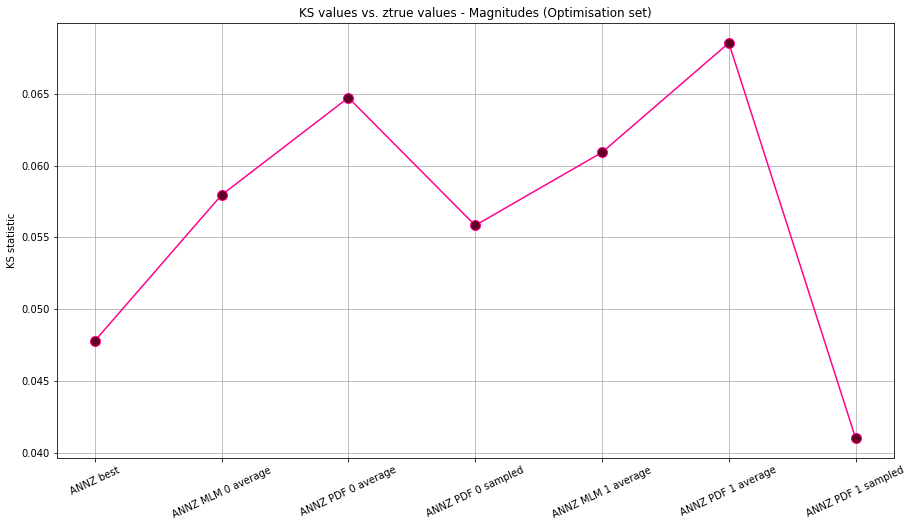

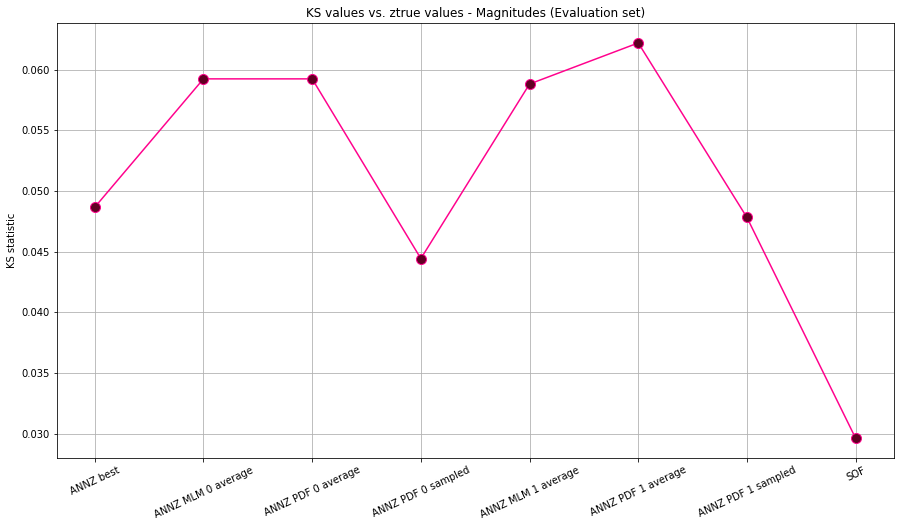

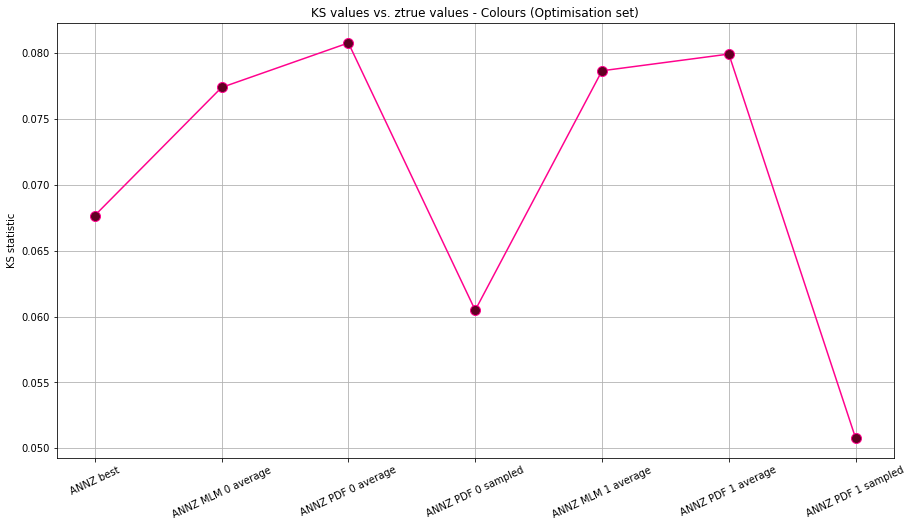

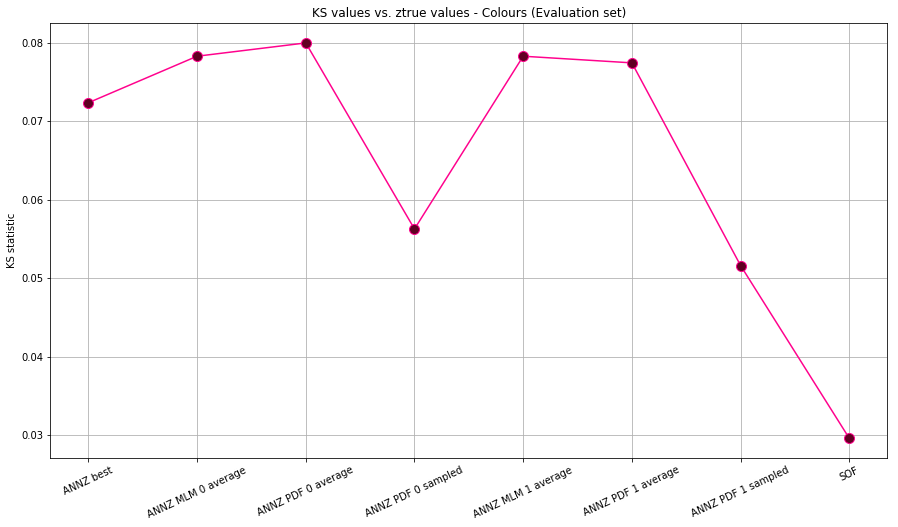

In [22]:
for k, n in zip(file_type.keys(), file_names):
    if 'optim' in k:
        fig = plt.figure(figsize=(15,8))
        plt.xticks(xpos_optim, xticks_optim, rotation=25) #plot xtick names
        plt.title('KS values vs. ztrue values - {}'.format(n))
        plt.ylabel('KS statistic')
        #plt.xlim(xmin=-0.0025, xmax=0)
        plt.plot(ztype['{}_ks_array'.format(k)], marker = 'o', color='xkcd:hot pink', markerfacecolor = 'xkcd:burgundy', markersize=10)
        #plt.plot(ztype['{}_ksp_array'.format(k)], marker = 'D', color='xkcd:neon blue', markerfacecolor = 'xkcd:dark blue', markersize=10)
        plt.grid()
        plt.show()
        fig.savefig('{}_ks.png'.format(k))
    else:
        fig = plt.figure(figsize=(15,8))
        plt.xticks(xpos_eval, xticks_eval, rotation=25) #plot xtick names
        plt.title('KS values vs. ztrue values - {}'.format(n))
        plt.ylabel('KS statistic')
        #plt.xlim(xmin=-0.0025, xmax=0)
        plt.plot(ztype['{}_ks_array'.format(k)], marker = 'o', color='xkcd:hot pink', markerfacecolor = 'xkcd:burgundy', markersize=10, linestyle=None)
        #plt.plot(ztype['{}_ksp_array'.format(k)], marker = 'D', color='xkcd:neon blue', markerfacecolor = 'xkcd:dark blue', markersize=10)
        plt.grid()
        plt.show()
        fig.savefig('{}_ks.png'.format(k))

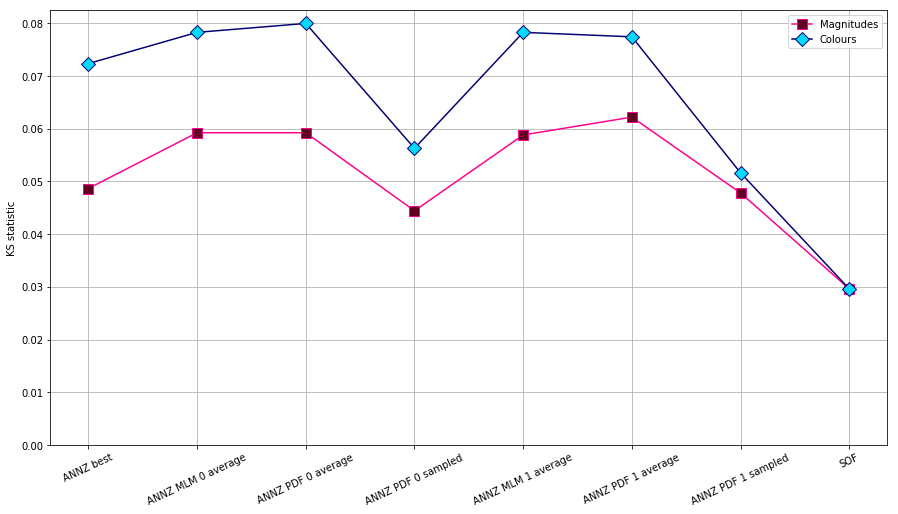

In [84]:
fig = plt.figure(figsize=(15,8))
plt.xticks(xpos_eval, xticks_eval, rotation=25) #plot xtick names
#plt.title('KS values vs. ztrue values - {}'.format(n))
plt.ylabel('KS statistic')
plt.ylim(0.00,0.0825)
#plt.xlim(xmin=-0.0025, xmax=0)
plt.plot(mags_eval_ks_array, marker = 's', color='xkcd:hot pink', markerfacecolor = 'xkcd:burgundy', markersize=10, label='Magnitudes')
plt.plot(colors_eval_ks_array, marker = 'D', color='xkcd:deep blue', markerfacecolor = 'xkcd:neon blue', markersize=10, label='Colours')
#plt.plot(ztype['{}_ksp_array'.format(k)], marker = 'D', color='xkcd:neon blue', markerfacecolor = 'xkcd:dark blue', markersize=10)
plt.grid()
plt.legend(loc='best')
plt.show()
fig.savefig('eval_ks.png')

In [68]:
for k in file_type.keys(): #for each file
    if 'optim' in k:
        for l, q in zip(range(0, plot_info['{}_bin_count'.format(k)] + 1), plot_info['{}_bins'.format(k)]): #l - bin index used to label the bins, q - bin boundaries used for the if statement below 
            ztype['{}_zval_bin{}'.format(k, l)] = np.zeros([1,8]) #create an empty array for each bin in each file
            for n in range (0, ztype['{}_range'.format(k)]): #through every row of each file
                ztype['{}_row{}_zval'.format(k, n)] = np.zeros([1,1]) #create an empty array for each row in each file
                ztype['{}_row{}_zval'.format(k, n)] = np.append(ztype['{}_row{}_zval'.format(k, n)], [ztype['{}_ztrue'.format(k)][n], ztype['{}_zbest'.format(k)][n], ztype['{}_zmlm0_avg'.format(k)][n], ztype['{}_zpdf0_avg'.format(k)][n], ztype['{}_zpdf0_sample'.format(k)][n], ztype['{}_zmlm1_avg'.format(k)][n],  ztype['{}_zpdf1_avg'.format(k)][n], ztype['{}_zpdf1_sample'.format(k)][n]]) #append all the z predictions for each row
                ztype['{}_row{}_zval'.format(k, n)] = ztype['{}_row{}_zval'.format(k, n)][1:] #cut off the 0 at the start of each array

                if (q) <= (ztype['{}_ztrue'.format(k)])[n] < (q + plot_info['{}_bin_delta'.format(k)]): #if (bin value) <= ztrue < (bin value + bin delta)
                    ztype['{}_zval_bin{}'.format(k, l)] = np.vstack((ztype['{}_zval_bin{}'.format(k, l)], ztype['{}_row{}_zval'.format(k, n)])) #stack the z value array onto the correct bin value array

            if np.sum(ztype['{}_zval_bin{}'.format(k, l)]) != 0.0: #if the bin array is not empty, then cut off the first row of zeros, if bin is empty then leave the bin array to avoid NaN errors
                ztype['{}_zval_bin{}'.format(k, l)] = ztype['{}_zval_bin{}'.format(k, l)][1:] 
    else:
        for l, q in zip(range(0, plot_info['{}_bin_count'.format(k)] + 1), plot_info['{}_bins'.format(k)]): #l - bin index used to label the bins, q - bin boundaries used for the if statement below 
            ztype['{}_zval_bin{}'.format(k, l)] = np.zeros([1,9]) #create an empty array for each bin in each file
            for n in range (0, ztype['{}_range'.format(k)]): #through every row of each file
                ztype['{}_row{}_zval'.format(k, n)] = np.zeros([1,1]) #fd create an empty array for each row in each file
                ztype['{}_row{}_zval'.format(k, n)] = np.append(ztype['{}_row{}_zval'.format(k, n)], [ztype['{}_ztrue'.format(k)][n], ztype['{}_zbest'.format(k)][n], ztype['{}_zmlm0_avg'.format(k)][n], ztype['{}_zpdf0_avg'.format(k)][n], ztype['{}_zpdf0_sample'.format(k)][n], ztype['{}_zmlm1_avg'.format(k)][n],  ztype['{}_zpdf1_avg'.format(k)][n], ztype['{}_zpdf1_sample'.format(k)][n], ztype['{}_SOF'.format(k)][n]]) #append all the z predictions for each row
                ztype['{}_row{}_zval'.format(k, n)] = ztype['{}_row{}_zval'.format(k, n)][1:] #cut off the 0 at the start of each array

                if (q) <= (ztype['{}_ztrue'.format(k)])[n] < (q + plot_info['{}_bin_delta'.format(k)]): #if (bin value) <= ztrue < (bin value + bin delta)
                    ztype['{}_zval_bin{}'.format(k, l)] = np.vstack((ztype['{}_zval_bin{}'.format(k, l)], ztype['{}_row{}_zval'.format(k, n)])) #stack the z value array onto the correct bin value array

            if np.sum(ztype['{}_zval_bin{}'.format(k, l)]) != 0.0: #if the bin array is not empty, then cut off the first row of zeros, if bin is empty then leave the bin array to avoid NaN errors
                ztype['{}_zval_bin{}'.format(k, l)] = ztype['{}_zval_bin{}'.format(k, l)][1:] 

In [69]:
for k in file_type.keys(): #for each file
    if 'optim' in k:
        for r, x in zip(range(1, 8), xnames_optim): #r - the index values of each z prediction in the z array (not including 0 as that is the ztrue value), x - the names of each z predictor
            ztype['{}_{}_bin_bias_mean'.format(k, x)] = np.zeros([1,1]) #create empty array for prediction set in each file
            for l in range(0, plot_info['{}_bin_count'.format(k)]): #run for every row
                    if np.any(ztype['{}_zval_bin{}'.format(k, l)][:,0]) or np.any(ztype['{}_zval_bin{}'.format(k, l)][:,r]) == True: #if either of the two z value arrays are non-zero
                        ztype['{}_{}_bin{}_bias'.format(k, x, l)] = (ztype['{}_zval_bin{}'.format(k, l)])[:,r] - (ztype['{}_zval_bin{}'.format(k, l)])[:,0] #calculate bias of the row
                        ztype['{}_{}_bin{}_bias_mean'.format(k, x, l)] = np.mean(ztype['{}_{}_bin{}_bias'.format(k, x, l)]) #calculate the mean bias of each bin array
                    else:
                        ztype['{}_{}_bin{}_bias'.format(k, x, l)] = ztype['{}_{}_bin{}_bias_mean'.format(k, x, l)] = 0.0

                    ztype['{}_{}_bin_bias_mean'.format(k , x)] = np.append(ztype['{}_{}_bin_bias_mean'.format(k , x)], ztype['{}_{}_bin{}_bias_mean'.format(k, x, l)])
            ztype['{}_{}_bin_bias_mean'.format(k , x)] = ztype['{}_{}_bin_bias_mean'.format(k , x)][1:]
            
    else:
        for r, x in zip(range(1, 9), xnames_eval): #r - the index values of each z prediction in the z array (not including 0 as that is the ztrue value), x - the names of each z predictor
            ztype['{}_{}_bin_bias_mean'.format(k, x)] = np.zeros([1,1]) #create empty array for prediction set in each file
            for l in range(0, plot_info['{}_bin_count'.format(k)]): #run for every row
                    if np.any(ztype['{}_zval_bin{}'.format(k, l)][:,0]) or np.any(ztype['{}_zval_bin{}'.format(k, l)][:,r]) == True: #if either of the two z value arrays are non-zero
                        ztype['{}_{}_bin{}_bias'.format(k, x, l)] = (ztype['{}_zval_bin{}'.format(k, l)])[:,r] - (ztype['{}_zval_bin{}'.format(k, l)])[:,0] #calculate bias of the row
                        ztype['{}_{}_bin{}_bias_mean'.format(k, x, l)] = np.mean(ztype['{}_{}_bin{}_bias'.format(k, x, l)]) #calculate the mean bias of each bin array
                    else:
                        ztype['{}_{}_bin{}_bias'.format(k, x, l)] = ztype['{}_{}_bin{}_bias_mean'.format(k, x, l)] = 0.0

                    ztype['{}_{}_bin_bias_mean'.format(k , x)] = np.append(ztype['{}_{}_bin_bias_mean'.format(k , x)], ztype['{}_{}_bin{}_bias_mean'.format(k, x, l)])
            ztype['{}_{}_bin_bias_mean'.format(k , x)] = ztype['{}_{}_bin_bias_mean'.format(k , x)][1:]

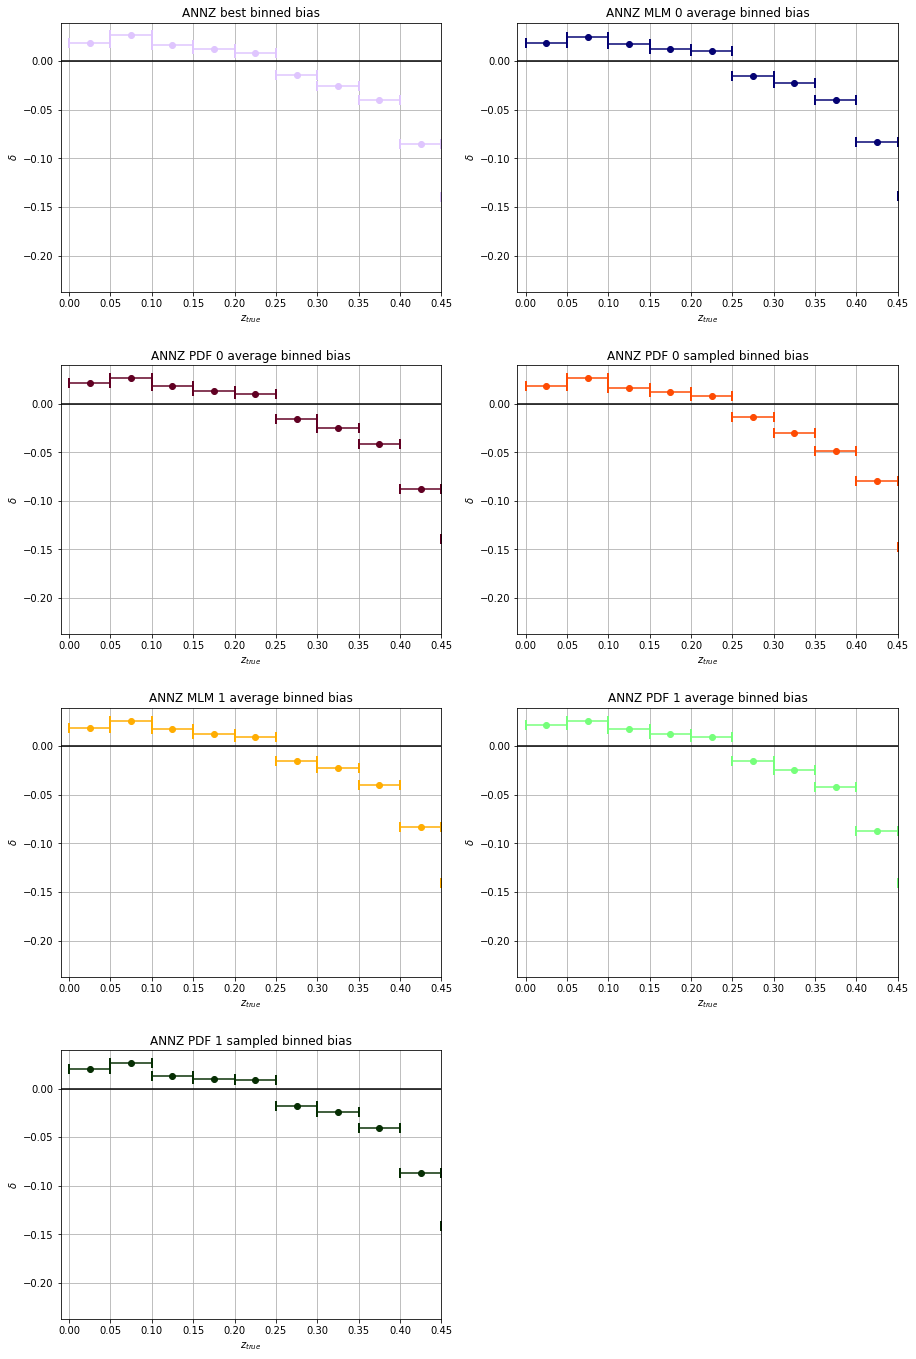

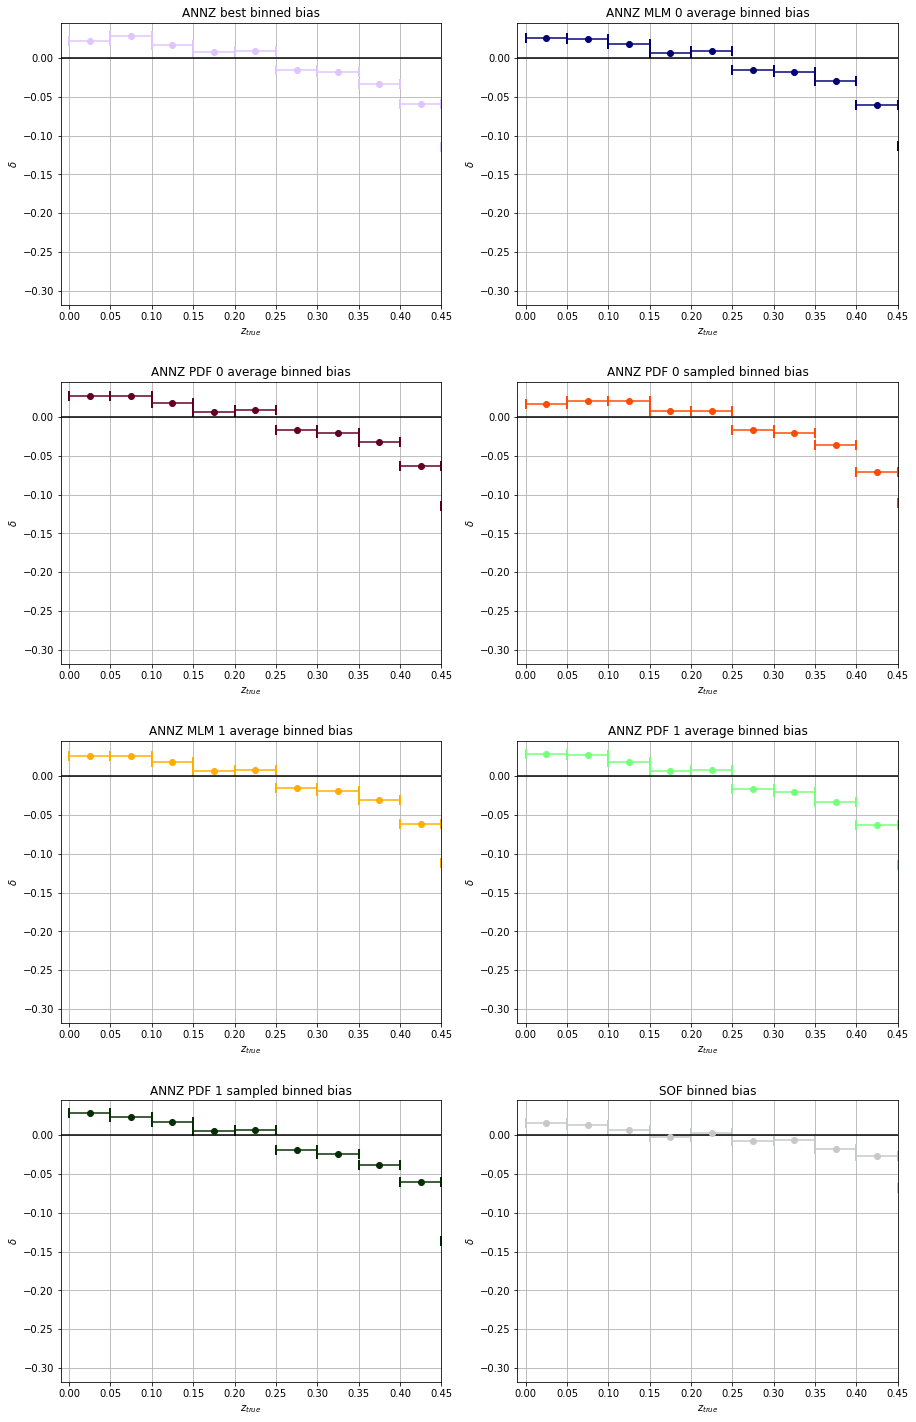

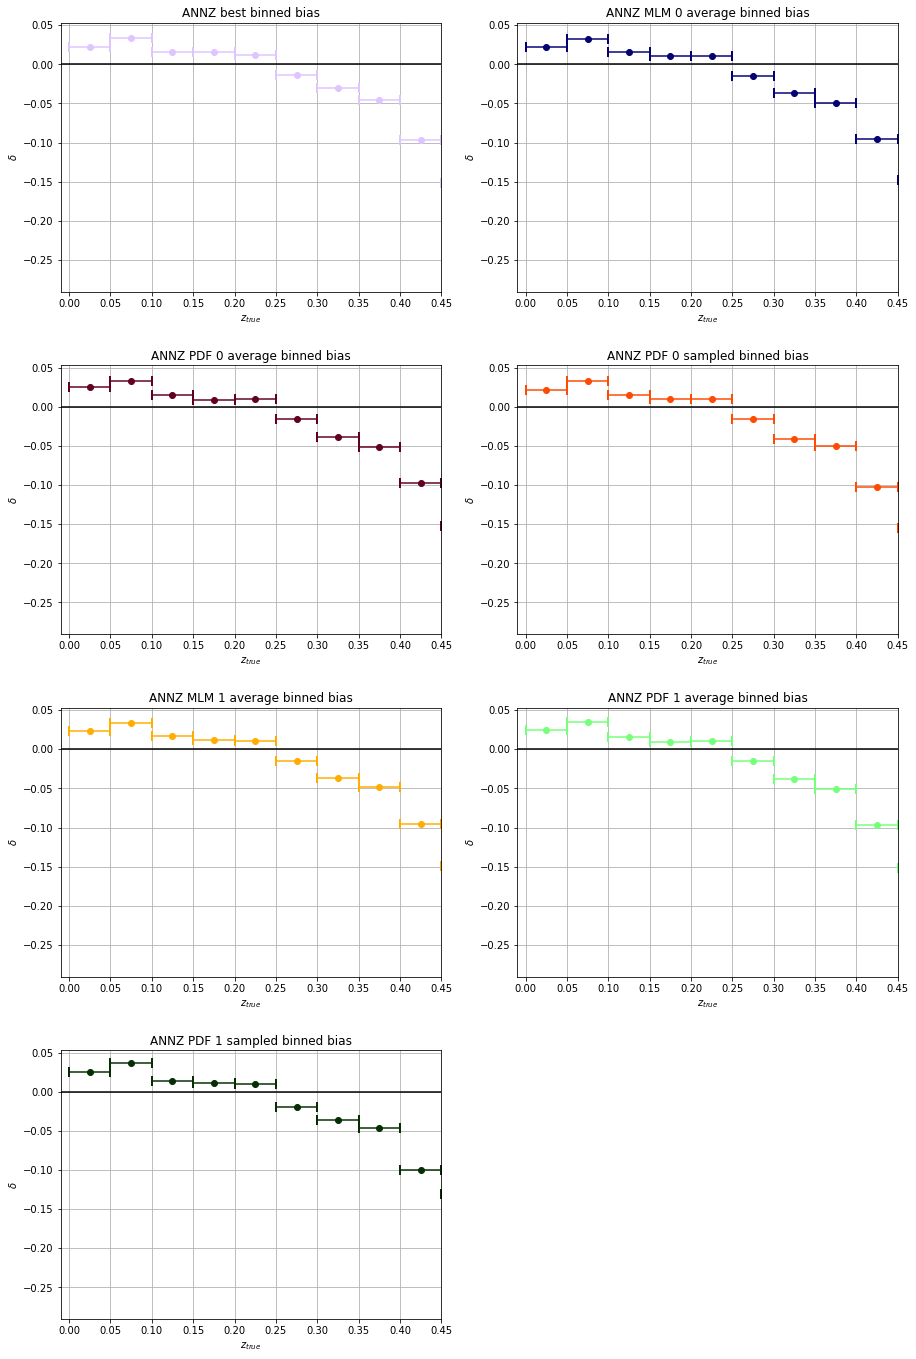

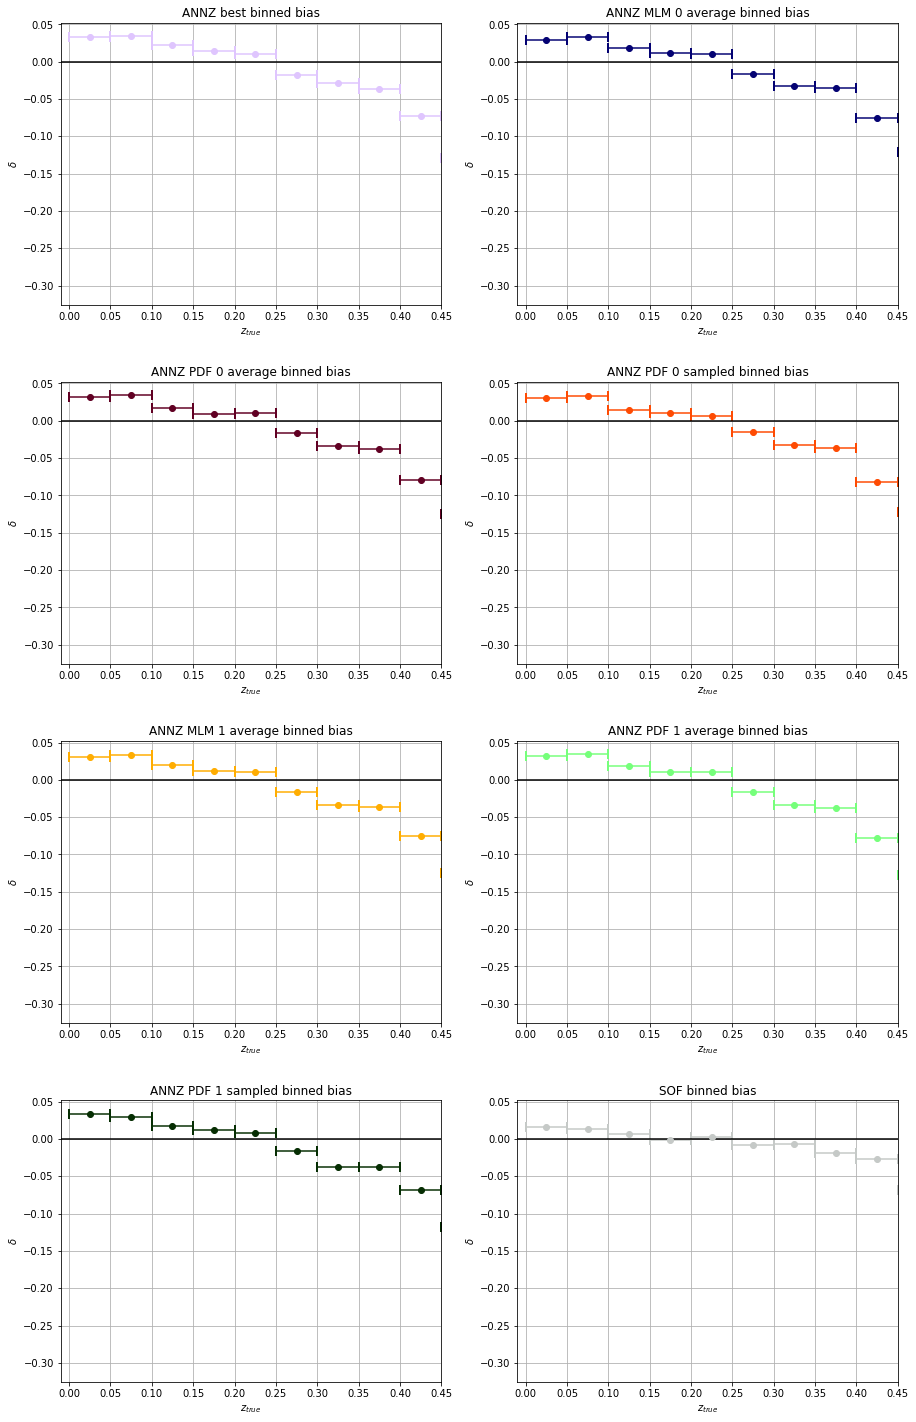

In [73]:
for k, n in zip(file_type.keys(), file_names):
    if 'optim' in k:
        fig = plt.figure(figsize=(15,25))
        fig.subplots_adjust(hspace=0.275)
        #title = fig.suptitle('Binned bias - {}'.format(n), fontsize=25) #global title

        ax1 = plt.subplot(421)
        ax1.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zbest_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:light lavender', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:light lavender', label='ANNZ best')
        ax1.axhline(y=0.0, color='xkcd:black')
        ax1.grid()
        ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ best binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)

        ax2 = plt.subplot(422, sharey=ax1)
        ax2.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zmlm0_avg_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:deep blue', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:deep blue', label='ANNZ MLM 0 average')
        ax2.axhline(y=0.0, color='xkcd:black')
        ax2.grid()
        ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ MLM 0 average binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)

        ax3 = plt.subplot(423, sharey=ax1)
        ax3.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf0_avg_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:burgundy', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:burgundy', label='ANNZ PDF 0 average')
        ax3.axhline(y=0.0, color='xkcd:black')
        ax3.grid()
        ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 0 average binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)

        ax4 = plt.subplot(424, sharey=ax1)
        ax4.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf0_sample_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:blood orange', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:blood orange', label='ANNZ PDF 0 sampled')
        ax4.axhline(y=0.0, color='xkcd:black')
        ax4.grid()
        ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 0 sampled binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)

        ax5 = plt.subplot(425, sharey=ax1)
        ax5.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zmlm1_avg_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:orange yellow', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:orange yellow', label='ANNZ MLM 1 average')
        ax5.axhline(y=0.0, color='xkcd:black')
        ax5.grid()
        ax5.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ MLM 1 average binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)

        ax6 = plt.subplot(426, sharey=ax1)
        ax6.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf1_avg_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:lightgreen', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:lightgreen', label='ANNZ PDF 1 average')
        ax6.axhline(y=0.0, color='xkcd:black')
        ax6.grid()
        ax6.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 1 average binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)

        ax7 = plt.subplot(427, sharey=ax1)
        ax7.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf1_sample_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:very dark green', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:very dark green', label='ANNZ PDF 1 sampled')
        ax7.axhline(y=0.0, color='xkcd:black')
        ax7.grid()
        ax7.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 1 sampled binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)

        fig.savefig('{}_bin_bias.png'.format(k))
        title.set_y(0.875)
        fig.subplots_adjust(top=0.845)
        #fig.savefig('optim_scatter.png')
        plt.show();
    else:
        fig = plt.figure(figsize=(15,25))
        fig.subplots_adjust(hspace=0.275)
        #title = fig.suptitle('Binned bias - {}'.format(n), fontsize=25) #global title

        ax1 = plt.subplot(421)
        ax1.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zbest_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:light lavender', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:light lavender', label='ANNZ best')
        ax1.axhline(y=0.0, color='xkcd:black')
        ax1.grid()
        ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ best binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)

        ax2 = plt.subplot(422, sharey=ax1)
        ax2.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zmlm0_avg_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:deep blue', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:deep blue', label='ANNZ MLM 0 average')
        ax2.axhline(y=0.0, color='xkcd:black')
        ax2.grid()
        ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ MLM 0 average binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)

        ax3 = plt.subplot(423, sharey=ax1)
        ax3.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf0_avg_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:burgundy', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:burgundy', label='ANNZ PDF 0 average')
        ax3.axhline(y=0.0, color='xkcd:black')
        ax3.grid()
        ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 0 average binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)

        ax4 = plt.subplot(424, sharey=ax1)
        ax4.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf0_sample_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:blood orange', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:blood orange', label='ANNZ PDF 0 sampled')
        ax4.axhline(y=0.0, color='xkcd:black')
        ax4.grid()
        ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 0 sampled binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)

        ax5 = plt.subplot(425, sharey=ax1)
        ax5.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zmlm1_avg_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:orange yellow', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:orange yellow', label='ANNZ MLM 1 average')
        ax5.axhline(y=0.0, color='xkcd:black')
        ax5.grid()
        ax5.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ MLM 1 average binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)

        ax6 = plt.subplot(426, sharey=ax1)
        ax6.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf1_avg_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:lightgreen', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:lightgreen', label='ANNZ PDF 1 average')
        ax6.axhline(y=0.0, color='xkcd:black')
        ax6.grid()
        ax6.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 1 average binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)

        ax7 = plt.subplot(427, sharey=ax1)
        ax7.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf1_sample_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:very dark green', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:very dark green', label='ANNZ PDF 1 sampled')
        ax7.axhline(y=0.0, color='xkcd:black')
        ax7.grid()
        ax7.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 1 sampled binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)
        
        ax8 = plt.subplot(428, sharey=ax1)
        ax8.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_SOF_bin_bias_mean'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:silver', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:silver', label='SOF')
        ax8.axhline(y=0.0, color='xkcd:black')
        ax8.grid()
        ax8.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('SOF binned bias')
        plt.xlabel('$z_{true}$')
        plt.ylabel('$\delta$')
        plt.xlim(-0.01,0.45)
        
        fig.savefig('{}_bin_bias.png'.format(k))
        #title.set_y(0.875)
        #fig.subplots_adjust(top=0.845)
        #fig.savefig('optim_scatter.png')
        plt.show();

In [75]:
for k in file_type.keys(): #for each file
    if 'optim' in k:
        for n in xnames_optim: #for each z prediction
            ztype['{}_{}_bin_sigma_array'.format(k, n)] = np.zeros([1,1]) #make empty array to hold bin sigma values

            for l in range(0, plot_info['{}_bin_count'.format(k)]): #for each bin
                if np.any(ztype['{}_{}_bin{}_bias'.format(k, n, l)]) == True: #if the bin has any bias values (higher z bins don't)
                    ztype['{}_{}_bin{}_sigma'.format(k, n, l)] = np.std(ztype['{}_{}_bin{}_bias'.format(k, n, l)]) #calculate standard deviation of each bin bias set
                    ztype['{}_{}_bin_sigma_array'.format(k, n)] = np.append(ztype['{}_{}_bin_sigma_array'.format(k, n)], ztype['{}_{}_bin{}_sigma'.format(k, n, l)]) #append the value onto the array for bin values 
                else:
                    ztype['{}_{}_bin_sigma_array'.format(k, n)] = np.append(ztype['{}_{}_bin_sigma_array'.format(k, n)], 0.0) #if bin bias empty append 0

            ztype['{}_{}_bin_sigma_array'.format(k, n)] = ztype['{}_{}_bin_sigma_array'.format(k, n)][1:] #cut off first 0 value
    else:
        for n in xnames_eval: #for each z prediction
            ztype['{}_{}_bin_sigma_array'.format(k, n)] = np.zeros([1,1]) #make empty array to hold bin sigma values

            for l in range(0, plot_info['{}_bin_count'.format(k)]): #for each bin
                if np.any(ztype['{}_{}_bin{}_bias'.format(k, n, l)]) == True: #if the bin has any bias values (higher z bins don't)
                    ztype['{}_{}_bin{}_sigma'.format(k, n, l)] = np.std(ztype['{}_{}_bin{}_bias'.format(k, n, l)]) #calculate standard deviation of each bin bias set
                    ztype['{}_{}_bin_sigma_array'.format(k, n)] = np.append(ztype['{}_{}_bin_sigma_array'.format(k, n)], ztype['{}_{}_bin{}_sigma'.format(k, n, l)]) #append the value onto the array for bin values 
                else:
                    ztype['{}_{}_bin_sigma_array'.format(k, n)] = np.append(ztype['{}_{}_bin_sigma_array'.format(k, n)], 0.0) #if bin bias empty append 0

            ztype['{}_{}_bin_sigma_array'.format(k, n)] = ztype['{}_{}_bin_sigma_array'.format(k, n)][1:] #cut off first 0 value

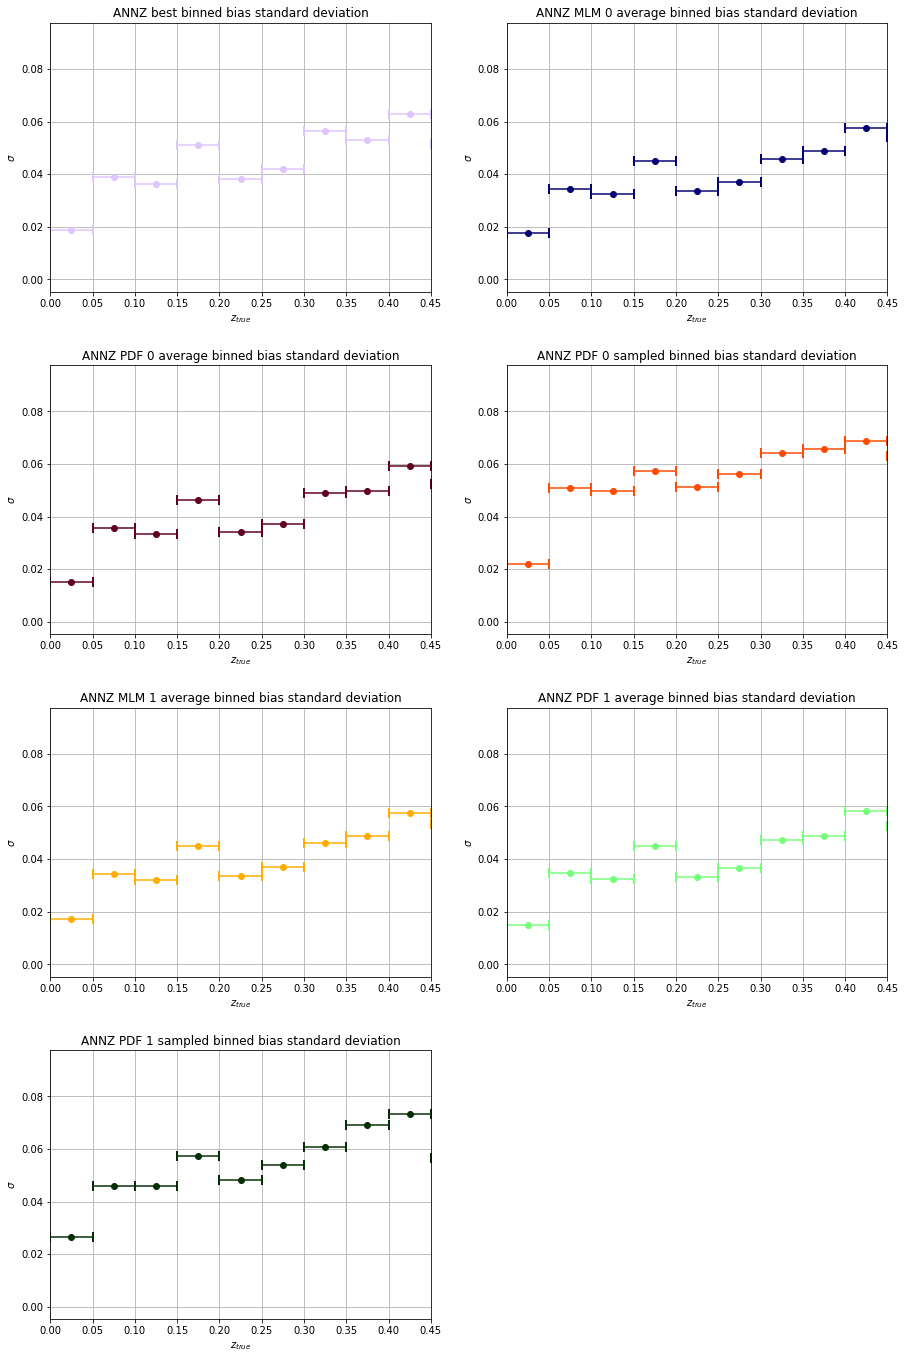

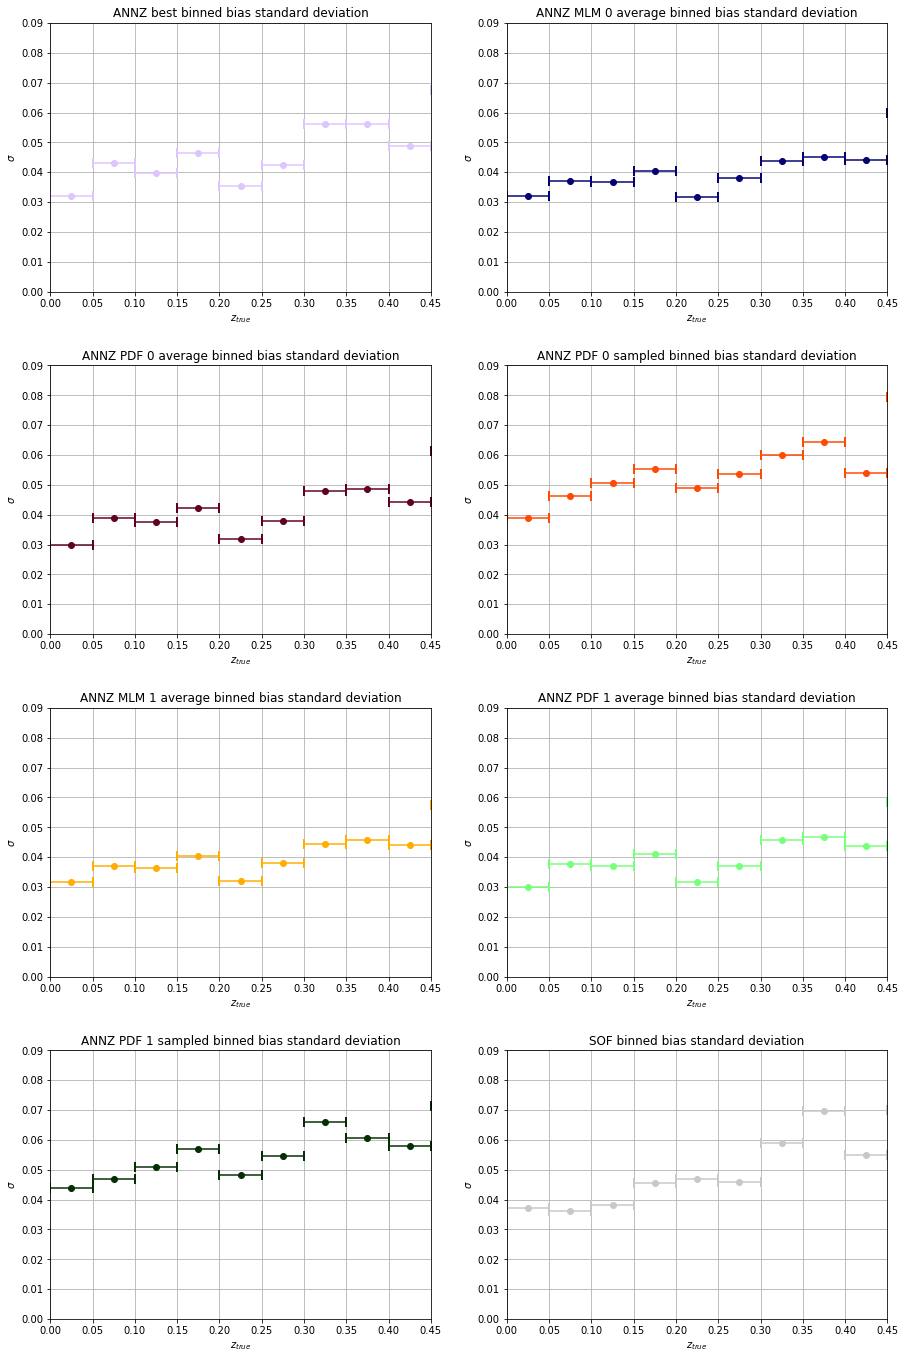

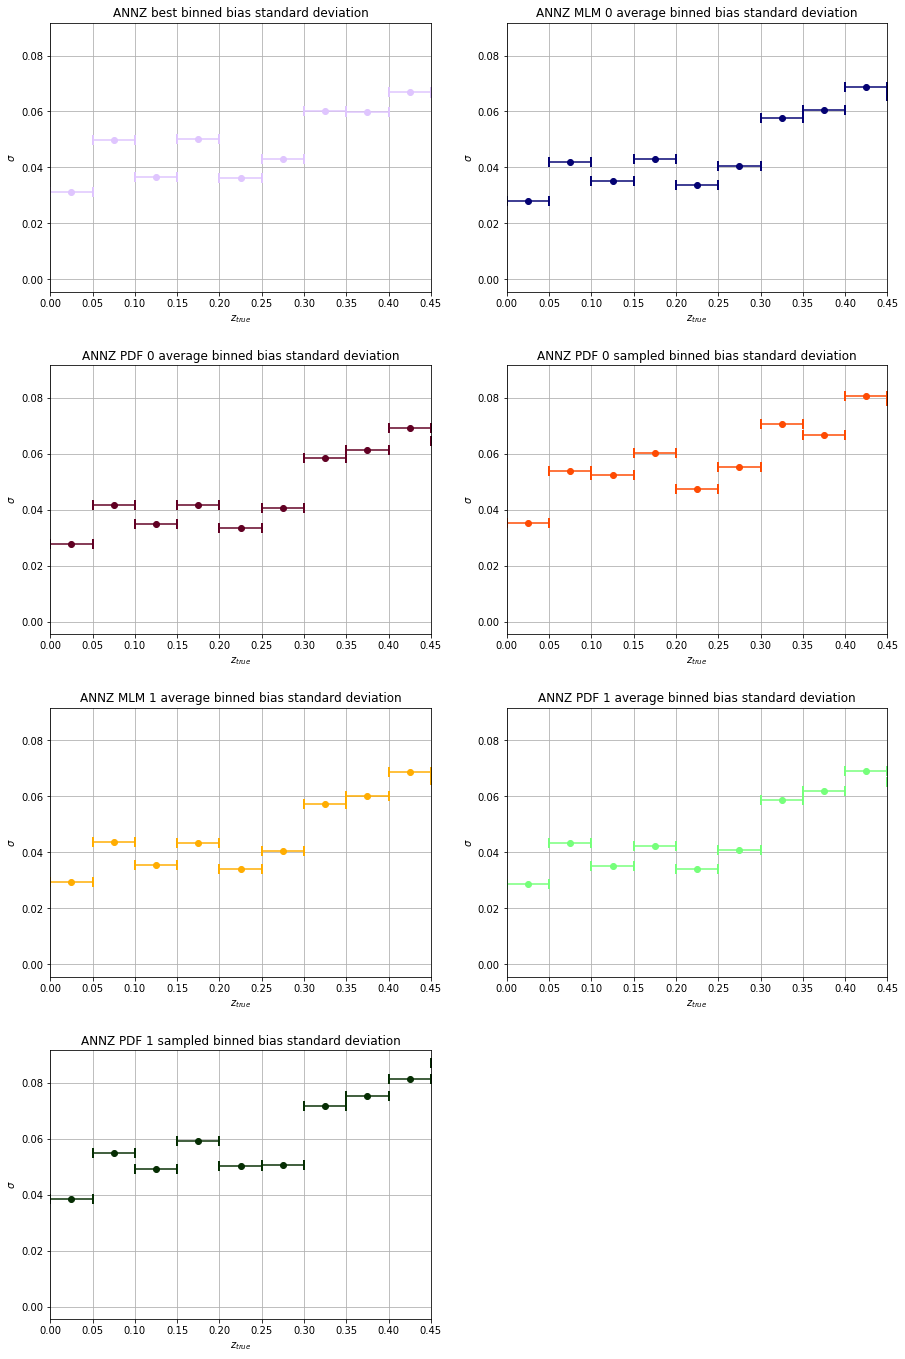

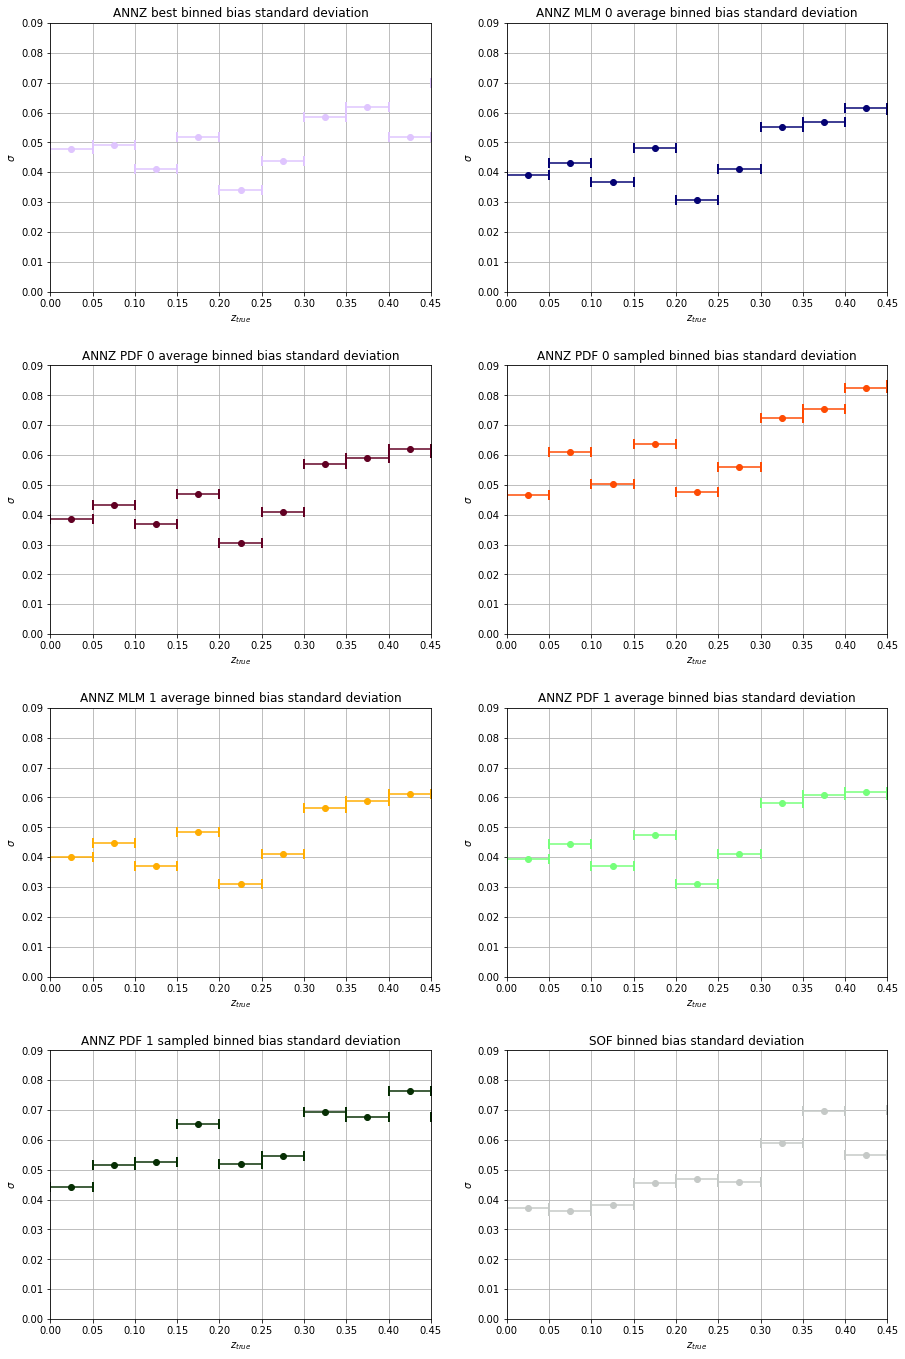

In [78]:
for k, n in zip(file_type.keys(), file_names):
    if 'optim' in k:
        fig = plt.figure(figsize=(15,25))
        fig.subplots_adjust(hspace=0.275)
        #title = fig.suptitle('Binned bias standard deviation - {}'.format(n), fontsize=25) #global title

        ax1 = plt.subplot(421)
        ax1.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zbest_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:light lavender', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:light lavender', label='ANNZ best')
        ax1.grid()
        ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ best binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')

        ax2 = plt.subplot(422, sharey=ax1)
        ax2.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zmlm0_avg_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:deep blue', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:deep blue', label='ANNZ MLM 0 average')
        ax2.grid()
        ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ MLM 0 average binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')

        ax3 = plt.subplot(423, sharey=ax1)
        ax3.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf0_avg_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:burgundy', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:burgundy', label='ANNZ PDF 0 average')
        ax3.grid()
        ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 0 average binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')

        ax4 = plt.subplot(424, sharey=ax1)
        ax4.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf0_sample_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:blood orange', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:blood orange', label='ANNZ PDF 0 sampled')
        ax4.grid()
        ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 0 sampled binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')

        ax5 = plt.subplot(425, sharey=ax1)
        ax5.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zmlm1_avg_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:orange yellow', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:orange yellow', label='ANNZ MLM 1 average')
        ax5.grid()
        ax5.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ MLM 1 average binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')

        ax6 = plt.subplot(426, sharey=ax1)
        ax6.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf1_avg_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:lightgreen', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:lightgreen', label='ANNZ PDF 1 average')
        ax6.grid()
        ax6.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 1 average binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')

        ax7 = plt.subplot(427, sharey=ax1)
        ax7.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf1_sample_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:very dark green', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:very dark green', label='ANNZ PDF 1 sampled')
        ax7.grid()
        ax7.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 1 sampled binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')

        title.set_y(0.875)
        fig.subplots_adjust(top=0.845)
        fig.savefig('{}_bin_std.png'.format(k))
        plt.show();
        
    else:
        fig = plt.figure(figsize=(15,25))
        fig.subplots_adjust(hspace=0.275)
        #title = fig.suptitle('Binned bias standard deviation - {}'.format(n), fontsize=25) #global title

        ax1 = plt.subplot(421)
        ax1.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zbest_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:light lavender', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:light lavender', label='ANNZ best')
        ax1.grid()
        ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ best binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')
        plt.ylim(0.0, 0.09)

        ax2 = plt.subplot(422, sharey=ax1)
        ax2.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zmlm0_avg_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:deep blue', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:deep blue', label='ANNZ MLM 0 average')
        ax2.grid()
        ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ MLM 0 average binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')
        plt.ylim(0.0, 0.09)

        ax3 = plt.subplot(423, sharey=ax1)
        ax3.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf0_avg_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:burgundy', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:burgundy', label='ANNZ PDF 0 average')
        ax3.grid()
        ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 0 average binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')
        plt.ylim(0.0, 0.09)

        ax4 = plt.subplot(424, sharey=ax1)
        ax4.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf0_sample_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:blood orange', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:blood orange', label='ANNZ PDF 0 sampled')
        ax4.grid()
        ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 0 sampled binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')
        plt.ylim(0.0, 0.09)

        ax5 = plt.subplot(425, sharey=ax1)
        ax5.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zmlm1_avg_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:orange yellow', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:orange yellow', label='ANNZ MLM 1 average')
        ax5.grid()
        ax5.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ MLM 1 average binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')
        plt.ylim(0.0, 0.09)

        ax6 = plt.subplot(426, sharey=ax1)
        ax6.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf1_avg_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:lightgreen', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:lightgreen', label='ANNZ PDF 1 average')
        ax6.grid()
        ax6.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 1 average binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')
        plt.ylim(0.0, 0.09)

        ax7 = plt.subplot(427, sharey=ax1)
        ax7.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf1_sample_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:very dark green', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:very dark green', label='ANNZ PDF 1 sampled')
        ax7.grid()
        ax7.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 1 sampled binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')
        plt.ylim(0.0, 0.09)
        
        ax8 = plt.subplot(428, sharey=ax1)
        ax8.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_SOF_bin_sigma_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:silver', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:silver', label='SOF')
        ax8.grid()
        ax8.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('SOF binned bias standard deviation')
        plt.xlabel('$z_{true}$')
        plt.xlim(0.0, 0.45)
        plt.ylabel('$\sigma$')
        plt.ylim(0.0, 0.09)

        title.set_y(0.875)
        fig.subplots_adjust(top=0.845)
        fig.savefig('{}_bin_std.png'.format(k))
        plt.show();

In [81]:
for k in file_type.keys(): #for each file
    if 'optim' in k:
        for n in xnames_optim: #for each z prediction set
            ztype['{}_{}_bin_sigma68_array'.format(k, n)] = np.zeros([1,1]) #create empty array

            for l in range(0, plot_info['{}_bin_count'.format(k)]): #for each bin
                if np.any(ztype['{}_{}_bin{}_bias'.format(k, n, l)]) == True: #if bin is not empty
                    ztype['{}_{}_bin{}_sigma68'.format(k, n, l)] = (scipy.stats.iqr(ztype['{}_{}_bin{}_bias'.format(k, n, l)], rng=(16,84)))/2 #calculate scatter
                    ztype['{}_{}_bin_sigma68_array'.format(k, n)] = np.append(ztype['{}_{}_bin_sigma68_array'.format(k, n)], ztype['{}_{}_bin{}_sigma68'.format(k, n, l)]) #append scatter value onto bin array
                else:
                    ztype['{}_{}_bin_sigma68_array'.format(k, n)] = np.append(ztype['{}_{}_bin_sigma68_array'.format(k, n)], 0.0)

            ztype['{}_{}_bin_sigma68_array'.format(k, n)] = ztype['{}_{}_bin_sigma68_array'.format(k, n)][1:]
            
    else:
        for n in xnames_eval: #for each z prediction set
            ztype['{}_{}_bin_sigma68_array'.format(k, n)] = np.zeros([1,1]) #create empty array

            for l in range(0, plot_info['{}_bin_count'.format(k)]): #for each bin
                if np.any(ztype['{}_{}_bin{}_bias'.format(k, n, l)]) == True: #if bin is not empty
                    ztype['{}_{}_bin{}_sigma68'.format(k, n, l)] = (scipy.stats.iqr(ztype['{}_{}_bin{}_bias'.format(k, n, l)], rng=(16,84)))/2 #calculate scatter
                    ztype['{}_{}_bin_sigma68_array'.format(k, n)] = np.append(ztype['{}_{}_bin_sigma68_array'.format(k, n)], ztype['{}_{}_bin{}_sigma68'.format(k, n, l)]) #append scatter value onto bin array
                else:
                    ztype['{}_{}_bin_sigma68_array'.format(k, n)] = np.append(ztype['{}_{}_bin_sigma68_array'.format(k, n)], 0.0)

            ztype['{}_{}_bin_sigma68_array'.format(k, n)] = ztype['{}_{}_bin_sigma68_array'.format(k, n)][1:]

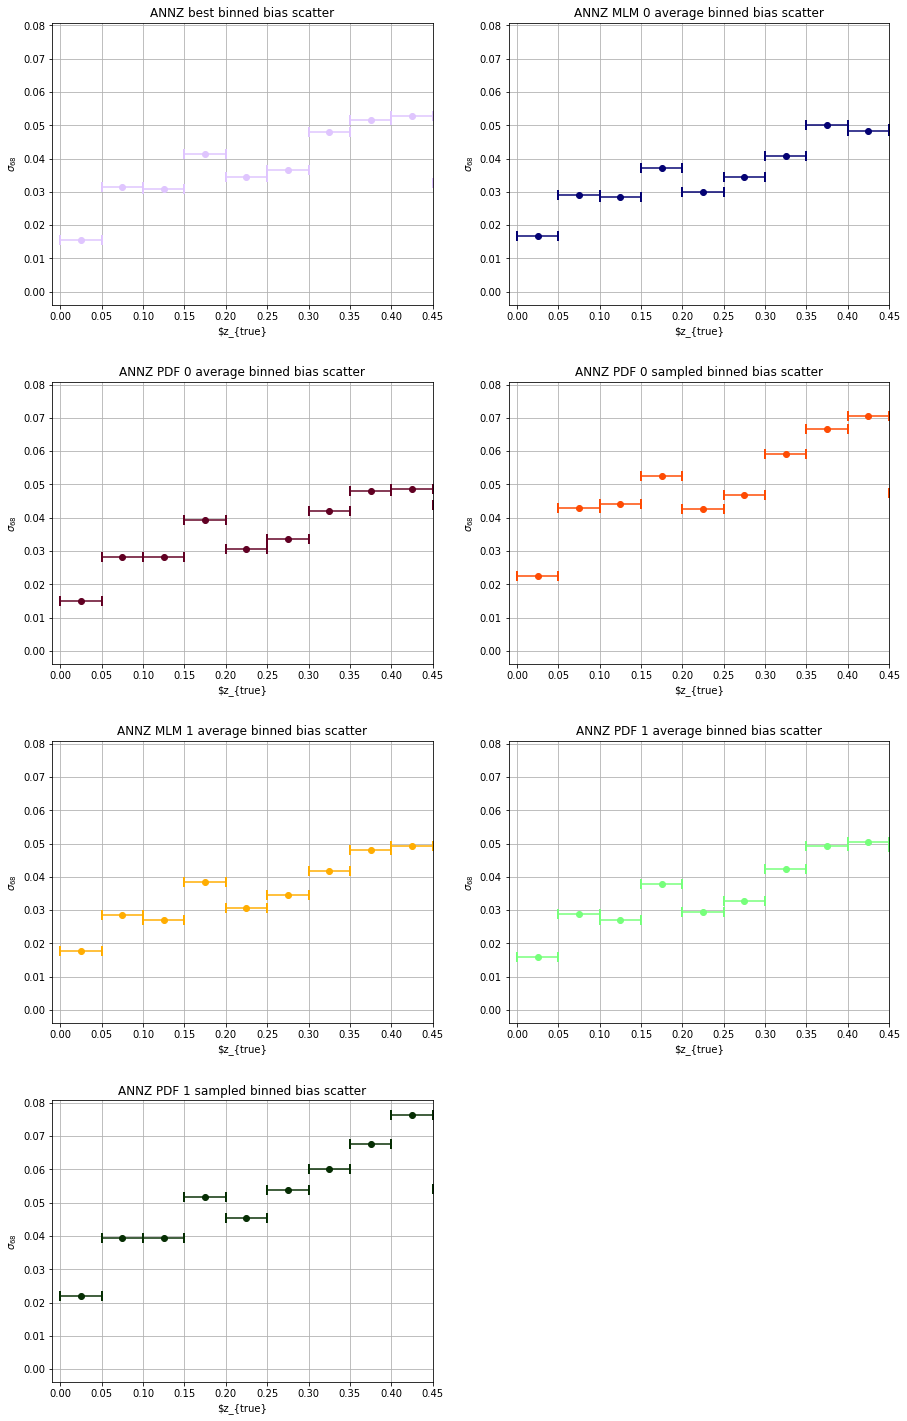

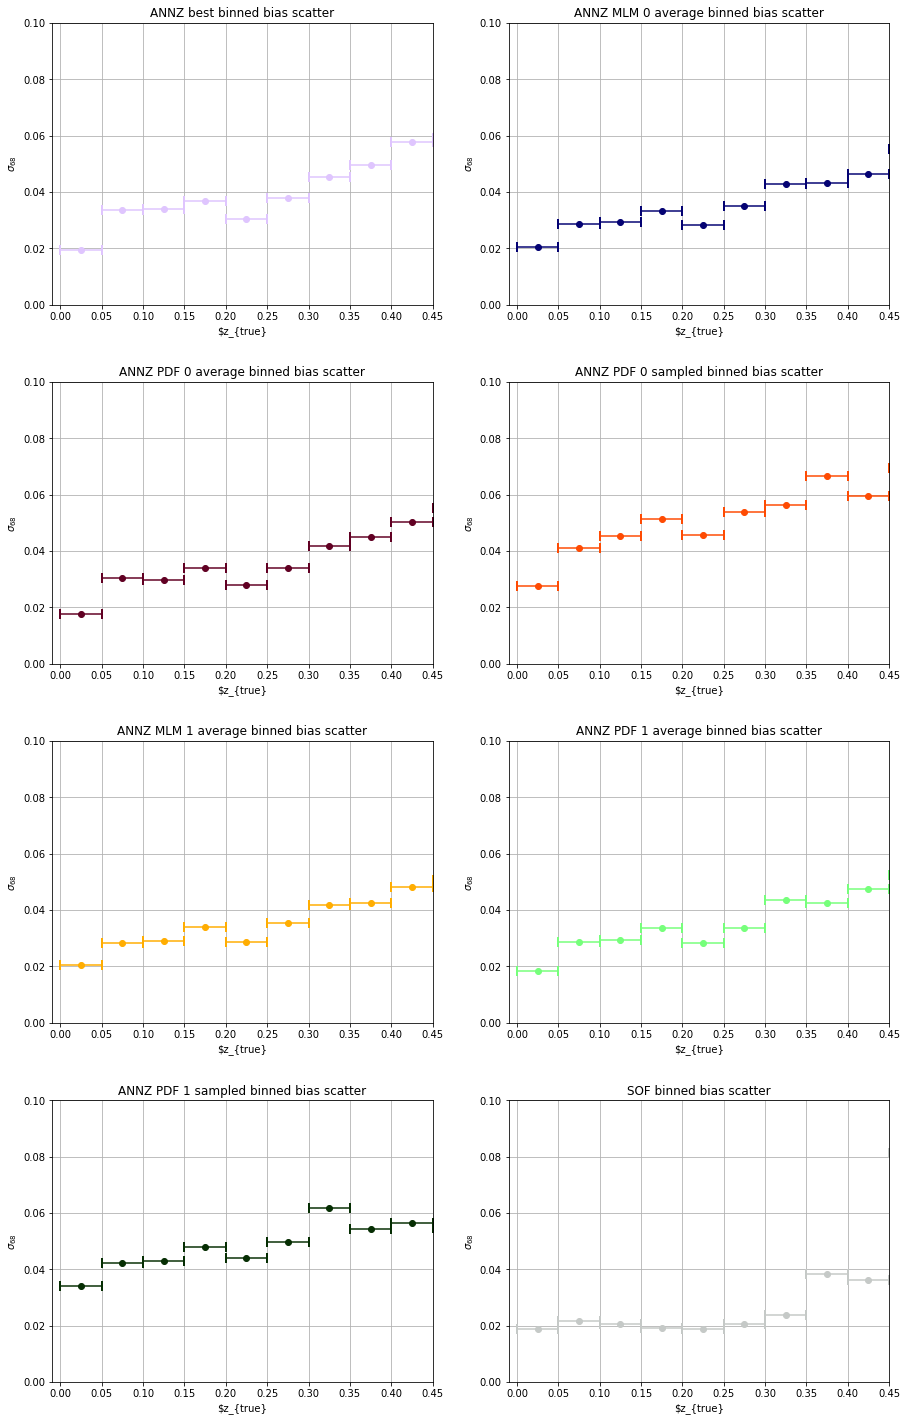

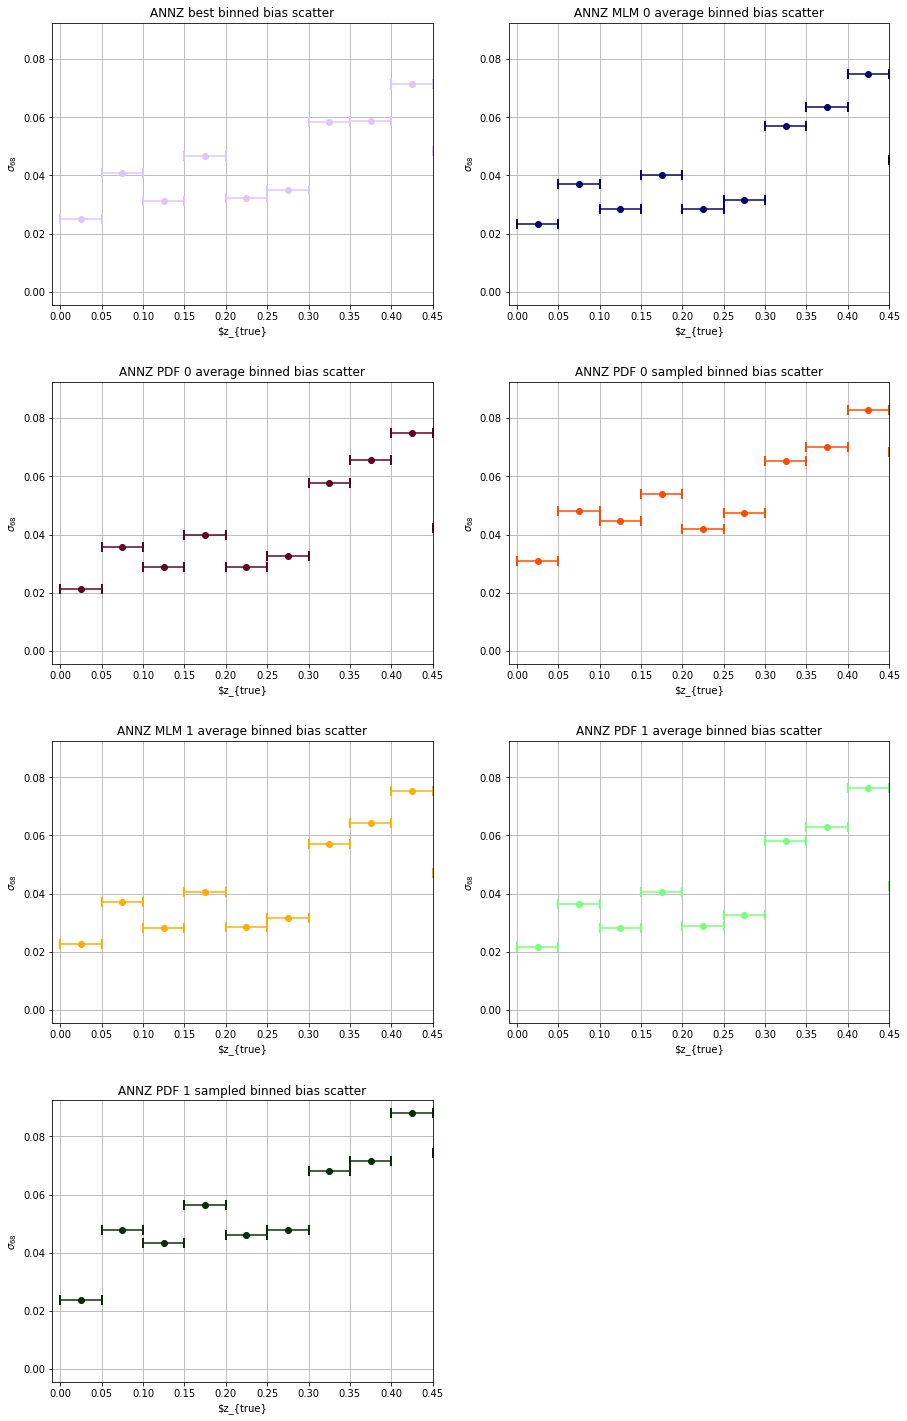

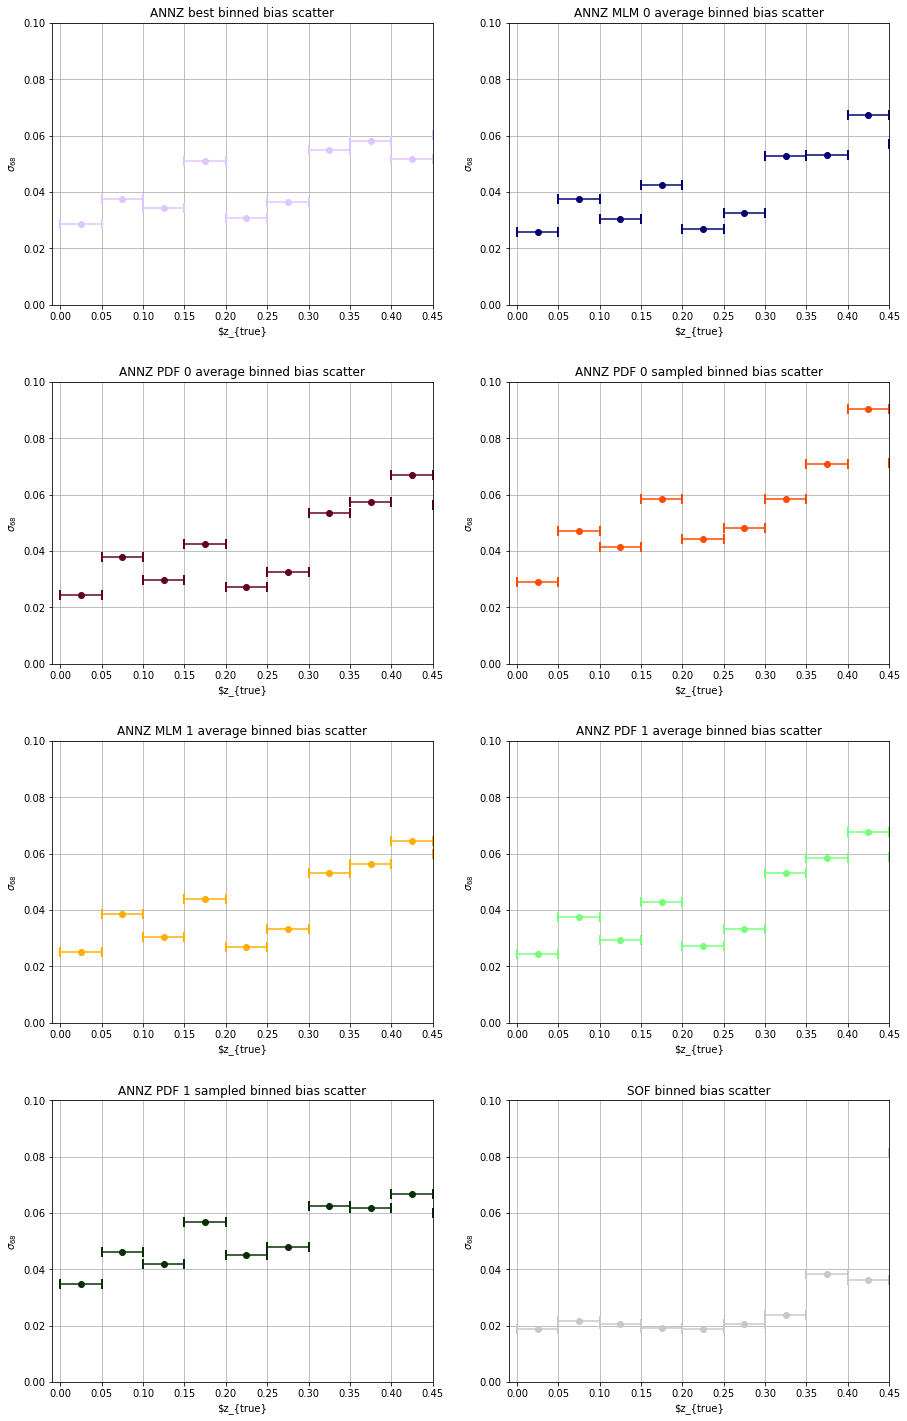

In [82]:
for k, n in zip(file_type.keys(), file_names):
    if 'optim' in k:
        fig = plt.figure(figsize=(15,25))
        fig.subplots_adjust(hspace=0.275)
        #title = fig.suptitle('Binned bias scatter - {}'.format(n), fontsize=25) #global title

        ax1 = plt.subplot(421)
        ax1.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zbest_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:light lavender', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:light lavender', label='ANNZ best')
        ax1.grid()
        ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ best binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')

        ax2 = plt.subplot(422, sharey=ax1)
        ax2.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zmlm0_avg_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:deep blue', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:deep blue', label='ANNZ MLM 0 average')
        ax2.grid()
        ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ MLM 0 average binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')

        ax3 = plt.subplot(423, sharey=ax1)
        ax3.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf0_avg_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:burgundy', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:burgundy', label='ANNZ PDF 0 average')
        ax3.grid()
        ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 0 average binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')

        ax4 = plt.subplot(424, sharey=ax1)
        ax4.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf0_sample_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:blood orange', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:blood orange', label='ANNZ PDF 0 sampled')
        ax4.grid()
        ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 0 sampled binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')

        ax5 = plt.subplot(425, sharey=ax1)
        ax5.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zmlm1_avg_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:orange yellow', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:orange yellow', label='ANNZ MLM 1 average')
        ax5.grid()
        ax5.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ MLM 1 average binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')

        ax6 = plt.subplot(426, sharey=ax1)
        ax6.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf1_avg_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:lightgreen', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:lightgreen', label='ANNZ PDF 1 average')
        ax6.grid()
        ax6.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 1 average binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')

        ax7 = plt.subplot(427, sharey=ax1)
        ax7.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf1_sample_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:very dark green', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:very dark green', label='ANNZ PDF 1 sampled')
        ax7.grid()
        ax7.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 1 sampled binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')

        #title.set_y(0.875)
        #fig.subplots_adjust(top=0.845)
        #fig.savefig('optim_scatter.png')
        fig.savefig('{}_bin_scat.png'.format(k))
        plt.show();
        
    else:
        fig = plt.figure(figsize=(15,25))
        fig.subplots_adjust(hspace=0.275)
        #title = fig.suptitle('Binned bias scatter - {}'.format(n), fontsize=25) #global title

        ax1 = plt.subplot(421)
        ax1.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zbest_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:light lavender', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:light lavender', label='ANNZ best')
        ax1.grid()
        ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ best binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')
        plt.ylim(0.0, 0.10)

        ax2 = plt.subplot(422, sharey=ax1)
        ax2.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zmlm0_avg_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:deep blue', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:deep blue', label='ANNZ MLM 0 average')
        ax2.grid()
        ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ MLM 0 average binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')
        plt.ylim(0.0, 0.10)

        ax3 = plt.subplot(423, sharey=ax1)
        ax3.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf0_avg_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:burgundy', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:burgundy', label='ANNZ PDF 0 average')
        ax3.grid()
        ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 0 average binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')
        plt.ylim(0.0, 0.10)

        ax4 = plt.subplot(424, sharey=ax1)
        ax4.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf0_sample_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:blood orange', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:blood orange', label='ANNZ PDF 0 sampled')
        ax4.grid()
        ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 0 sampled binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')
        plt.ylim(0.0, 0.10)

        ax5 = plt.subplot(425, sharey=ax1)
        ax5.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zmlm1_avg_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:orange yellow', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:orange yellow', label='ANNZ MLM 1 average')
        ax5.grid()
        ax5.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ MLM 1 average binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')
        plt.ylim(0.0, 0.10)

        ax6 = plt.subplot(426, sharey=ax1)
        ax6.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf1_avg_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:lightgreen', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:lightgreen', label='ANNZ PDF 1 average')
        ax6.grid()
        ax6.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 1 average binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')
        plt.ylim(0.0, 0.10)

        ax7 = plt.subplot(427, sharey=ax1)
        ax7.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_zpdf1_sample_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:very dark green', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:very dark green', label='ANNZ PDF 1 sampled')
        ax7.grid()
        ax7.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('ANNZ PDF 1 sampled binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')
        plt.ylim(0.0, 0.10)
        
        ax8 = plt.subplot(428, sharey=ax1)
        ax8.errorbar(plot_info['{}_bin_centres'.format(k)], ztype['{}_SOF_bin_sigma68_array'.format(k)], xerr=(plot_info['{}_bin_delta'.format(k)])/2, ecolor='xkcd:silver', linestyle='None', marker='o', capsize=5, capthick=2, color='xkcd:silver', label='SOF')
        ax8.grid()
        ax8.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        plt.title('SOF binned bias scatter')
        plt.xlabel('$z_{true}')
        plt.xlim(-0.01,0.45)
        plt.ylabel('$\sigma_{68}$')
        plt.ylim(0.0, 0.10)

        #title.set_y(0.875)
        #fig.subplots_adjust(top=0.845)
        #fig.savefig('optim_scatter.png')
        fig.savefig('{}_bin_scat.png'.format(k))
        plt.show();

In [31]:
#array holding the tick labels for each prediction set
xpos_eval = np.array([0,1,2,3,4,5,6,7])
xticks_eval = ['ANNZ best', 'ANNZ MLM 0 average', 'ANNZ PDF 0 average', 'ANNZ PDF 0 sampled', 'ANNZ MLM 1 average', 'ANNZ PDF 1 average', 'ANNZ PDF 1 sampled', 'SOF']
xpos_optim = np.array([0,1,2,3,4,5,6])
xticks_optim = ['ANNZ best', 'ANNZ MLM 0 average', 'ANNZ PDF 0 average', 'ANNZ PDF 0 sampled', 'ANNZ MLM 1 average', 'ANNZ PDF 1 average', 'ANNZ PDF 1 sampled']

In [32]:
for k in file_type.keys():
    if 'optim' in k:
        ztype['{}_bias_mean_array'.format(k)] = np.zeros([1,1])
        for n in xnames_optim:
            ztype['{}_{}_bias'.format(k, n)] = ztype['{}_{}'.format(k, n)] - ztype['{}_ztrue'.format(k)]
            ztype['{}_{}_bias_mean'.format(k, n)] = np.mean(ztype['{}_{}_bias'.format(k, n)])

            ztype['{}_bias_mean_array'.format(k)] = np.append(ztype['{}_bias_mean_array'.format(k)], ztype['{}_{}_bias_mean'.format(k, n)])

        ztype['{}_bias_mean_array'.format(k)] = ztype['{}_bias_mean_array'.format(k)][1:]   
        
    else:
            ztype['{}_bias_mean_array'.format(k)] = np.zeros([1,1])
            for n in xnames_eval:
                ztype['{}_{}_bias'.format(k, n)] = ztype['{}_{}'.format(k, n)] - ztype['{}_ztrue'.format(k)]
                ztype['{}_{}_bias_mean'.format(k, n)] = np.mean(ztype['{}_{}_bias'.format(k, n)])

                ztype['{}_bias_mean_array'.format(k)] = np.append(ztype['{}_bias_mean_array'.format(k)], ztype['{}_{}_bias_mean'.format(k, n)])

            ztype['{}_bias_mean_array'.format(k)] = ztype['{}_bias_mean_array'.format(k)][1:]   

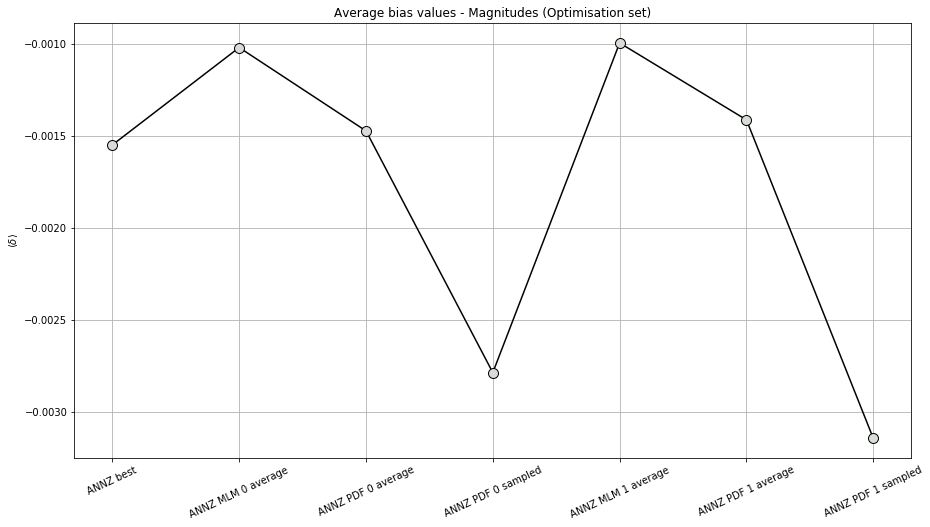

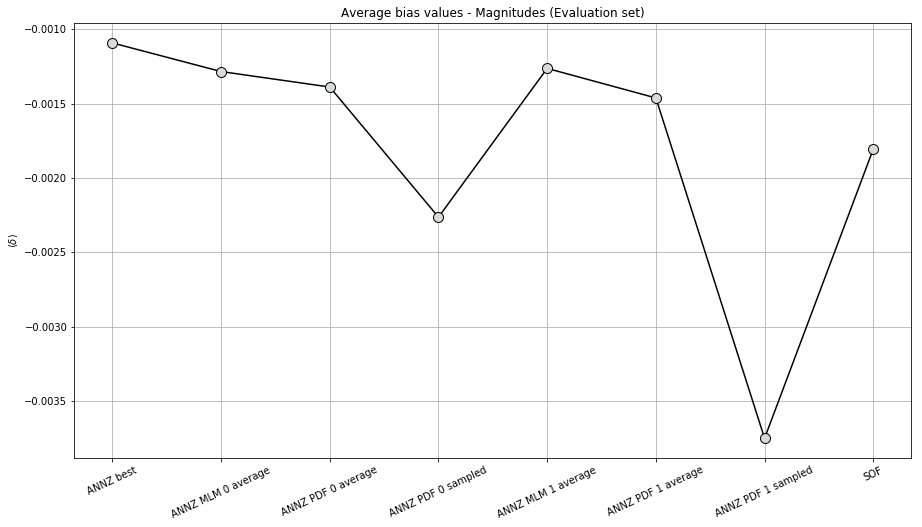

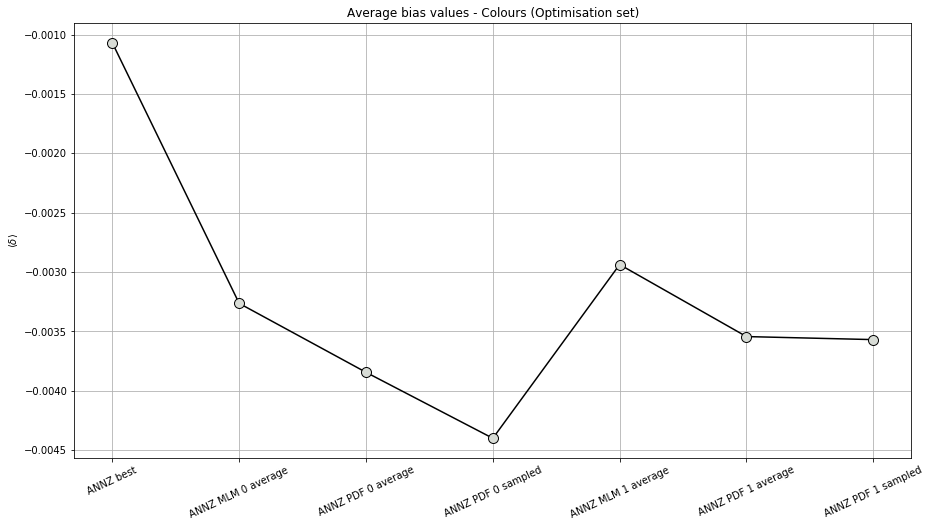

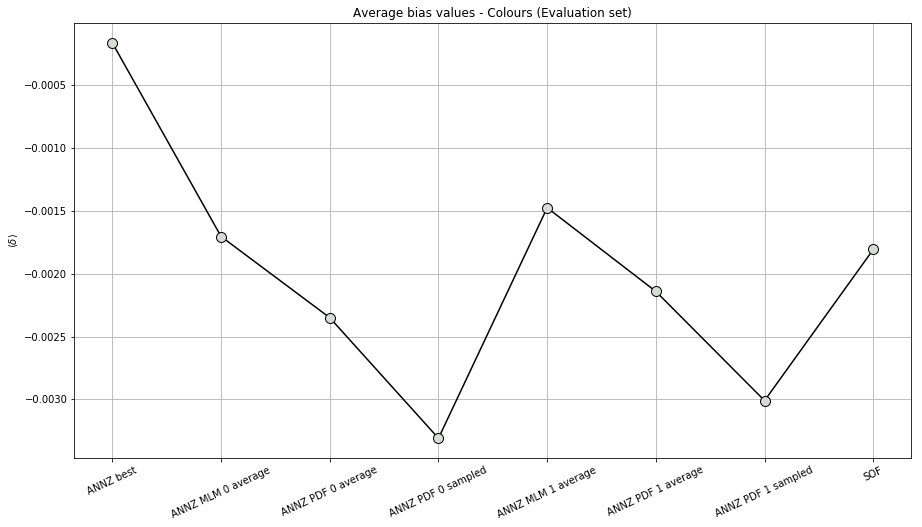

In [33]:
for k, n in zip(file_type.keys(), file_names):
    if 'optim' in k:
        fig = plt.figure(figsize=(15,8))
        plt.xticks(xpos_optim, xticks_optim, rotation=25) #plot xtick names
        plt.title('Average bias values - {}'.format(n))
        plt.ylabel(r'$\langle \delta \rangle$')
        #plt.xlim(xmin=-0.0025, xmax=0)
        plt.plot(ztype['{}_bias_mean_array'.format(k)], marker = 'o', color='xkcd:black', markerfacecolor = 'xkcd:light grey', markersize=10)
        plt.grid()
        fig.savefig('{}_globalbias.png'.format(k))
        plt.show()
        
    else:
        fig = plt.figure(figsize=(15,8))
        plt.xticks(xpos_eval, xticks_eval, rotation=25) #plot xtick names
        plt.title('Average bias values - {}'.format(n))
        plt.ylabel(r'$\langle \delta \rangle$')
        #plt.xlim(xmin=-0.0025, xmax=0)
        plt.plot(ztype['{}_bias_mean_array'.format(k)], marker = 'o', color='xkcd:black', markerfacecolor = 'xkcd:light grey', markersize=10)
        plt.grid()
        fig.savefig('{}_globalbias.png'.format(k))
        plt.show()

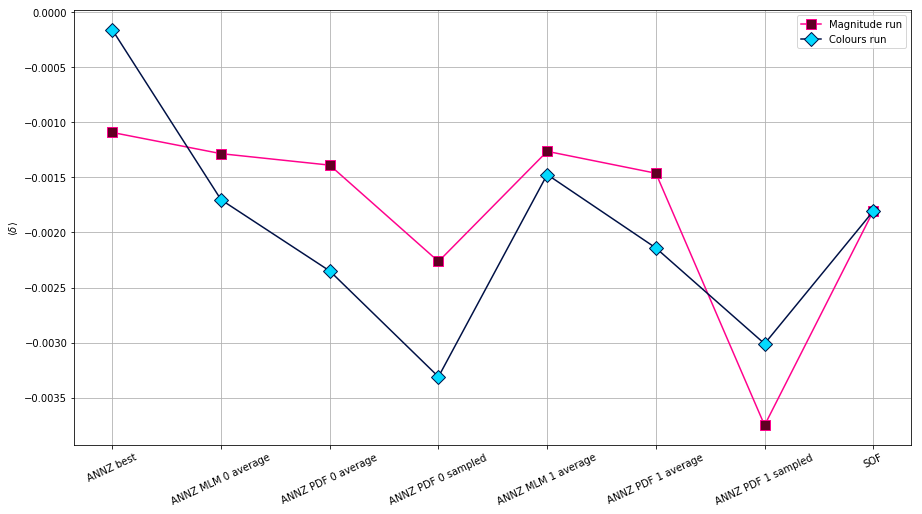

In [34]:
fig = plt.figure(figsize=(15,8))
plt.xticks(xpos_eval, xticks_eval, rotation=25) #plot xtick names
#plt.title('Average bias values - Evaluation set')
plt.ylabel(r'$\langle \delta \rangle$')
#plt.xlim(xmin=-0.0025, xmax=0)
plt.plot(mags_eval_bias_mean_array, marker = 's', color='xkcd:hot pink', markerfacecolor = 'xkcd:burgundy', markersize=10, label='Magnitude run')
plt.plot(colors_eval_bias_mean_array, marker = 'D', color='xkcd:navy blue', markerfacecolor = 'xkcd:neon blue', markersize=10, label='Colours run')
plt.grid()
plt.legend(loc='best')
fig.savefig('mags_globalbias.png')
plt.show()

In [35]:
for k in file_type.keys():
    ztype['{}_bias_sigma_array'.format(k)] = np.zeros([1,1])
    ztype['{}_bias_sigma68_array'.format(k)] = np.zeros([1,1])
    if 'optim' in k:
        for n in xnames_optim:
            ztype['{}_{}_bias_sigma'.format(k, n)] = np.std(ztype['{}_{}_bias'.format(k, n)])
            ztype['{}_{}_bias_sigma68'.format(k, n)] = (scipy.stats.iqr(ztype['{}_{}_bias'.format(k, n)], rng=(16,84)))/2

            ztype['{}_bias_sigma_array'.format(k)] = np.append(ztype['{}_bias_sigma_array'.format(k)], ztype['{}_{}_bias_sigma'.format(k, n)])
            ztype['{}_bias_sigma68_array'.format(k)] = np.append(ztype['{}_bias_sigma68_array'.format(k)], ztype['{}_{}_bias_sigma68'.format(k, n)])

    else:
        for n in xnames_eval:
            ztype['{}_{}_bias_sigma'.format(k, n)] = np.std(ztype['{}_{}_bias'.format(k, n)])
            ztype['{}_{}_bias_sigma68'.format(k, n)] = (scipy.stats.iqr(ztype['{}_{}_bias'.format(k, n)], rng=(16,84)))/2

            ztype['{}_bias_sigma_array'.format(k)] = np.append(ztype['{}_bias_sigma_array'.format(k)], ztype['{}_{}_bias_sigma'.format(k, n)])
            ztype['{}_bias_sigma68_array'.format(k)] = np.append(ztype['{}_bias_sigma68_array'.format(k)], ztype['{}_{}_bias_sigma68'.format(k, n)])

    ztype['{}_bias_sigma_array'.format(k)] = ztype['{}_bias_sigma_array'.format(k)][1:]
    ztype['{}_bias_sigma68_array'.format(k)] = ztype['{}_bias_sigma68_array'.format(k)][1:]

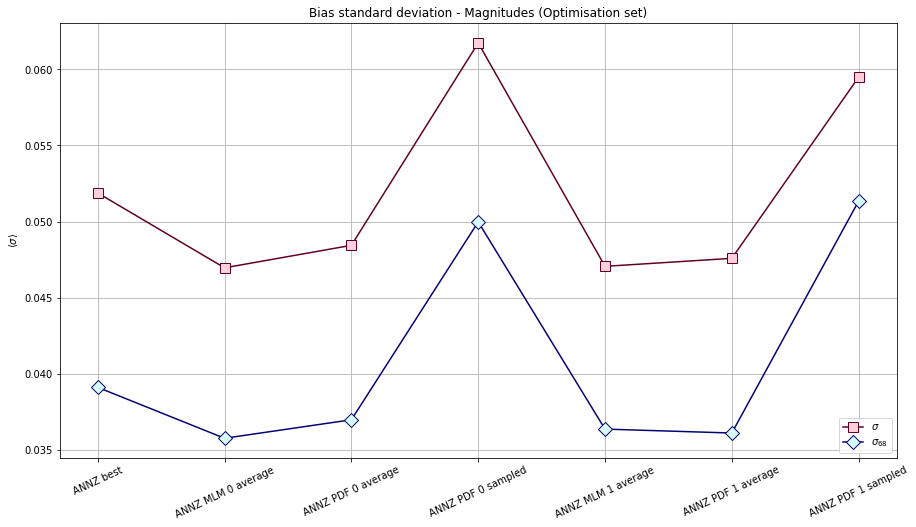

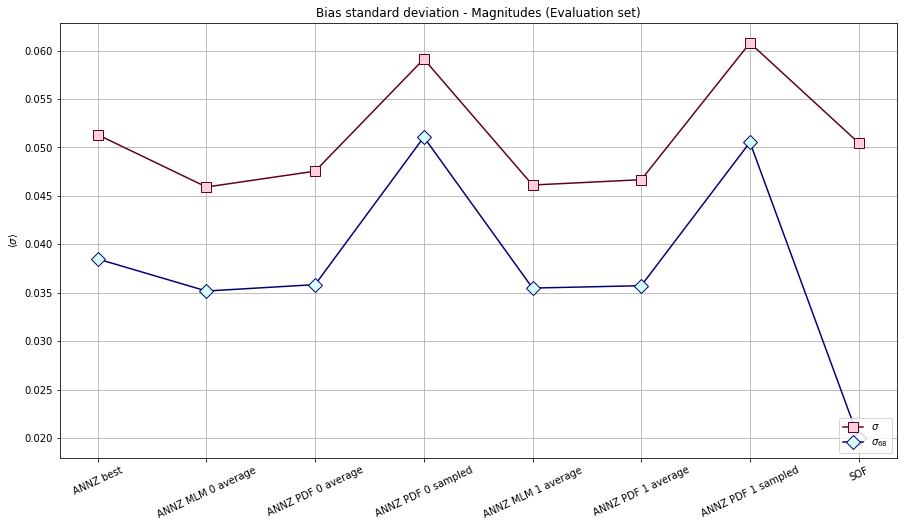

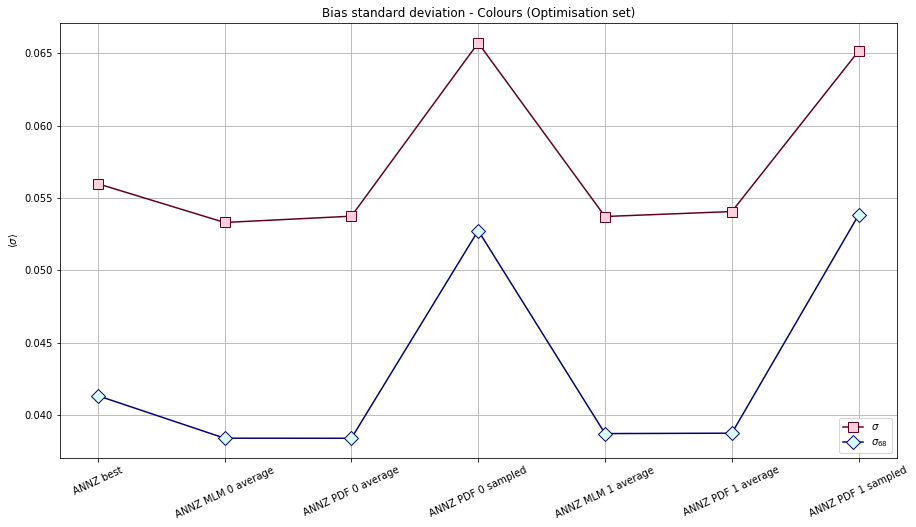

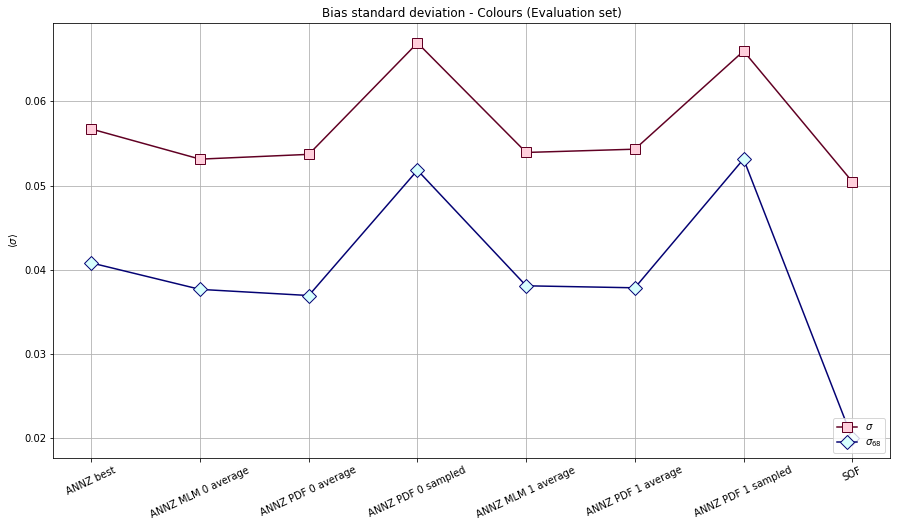

In [36]:
for k, n in zip(file_type.keys(), file_names):
    if 'optim' in k:
        fig = plt.figure(figsize=(15,8))
        plt.xticks(xpos_optim, xticks_optim, rotation=25) #plot xtick names
        plt.title('Bias standard deviation - {}'.format(n))
        plt.ylabel(r'$\langle \sigma \rangle$')
        #plt.xlim(xmin=-0.0025, xmax=0)
        plt.plot(ztype['{}_bias_sigma_array'.format(k)], marker = 's', color='xkcd:burgundy', markerfacecolor = 'xkcd:pale pink', markersize=10, label='$\sigma$')
        plt.plot(ztype['{}_bias_sigma68_array'.format(k)], marker = 'D', color='xkcd:deep blue', markerfacecolor = 'xkcd:ice blue', markersize=10, label='$\sigma_{68}$')
        plt.grid()
        plt.legend(loc='lower right')
        fig.savefig('{}_globalsigma.png'.format(k))
        plt.show()
    else:
        fig = plt.figure(figsize=(15,8))
        plt.xticks(xpos_eval, xticks_eval, rotation=25) #plot xtick names
        plt.title('Bias standard deviation - {}'.format(n))
        plt.ylabel(r'$\langle \sigma \rangle$')
        #plt.xlim(xmin=-0.0025, xmax=0)
        plt.plot(ztype['{}_bias_sigma_array'.format(k)], marker = 's', color='xkcd:burgundy', markerfacecolor = 'xkcd:pale pink', markersize=10, label='$\sigma$')
        plt.plot(ztype['{}_bias_sigma68_array'.format(k)], marker = 'D', color='xkcd:deep blue', markerfacecolor = 'xkcd:ice blue', markersize=10, label='$\sigma_{68}$')
        plt.grid()
        plt.legend(loc='lower right')
        fig.savefig('{}_globalsigma.png'.format(k))
        plt.show()

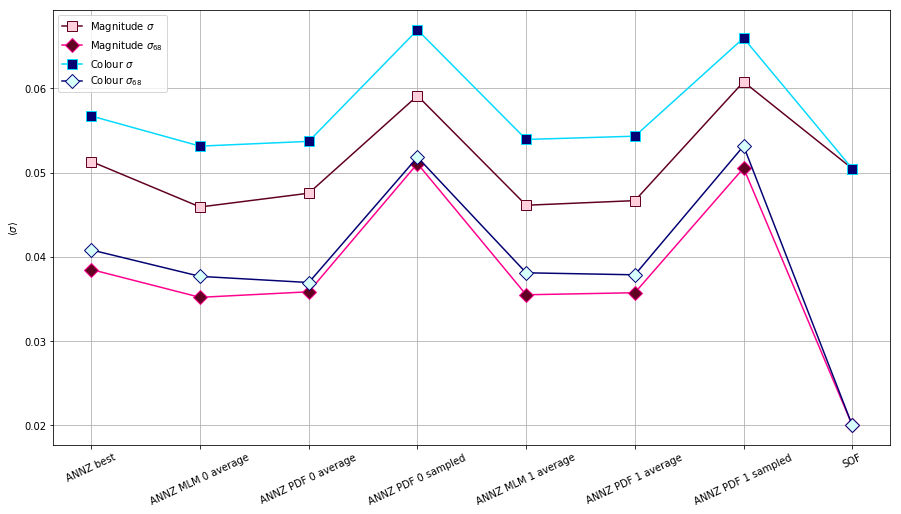

In [37]:
fig = plt.figure(figsize=(15,8))
plt.xticks(xpos_eval, xticks_eval, rotation=25) #plot xtick names
#plt.title('Bias standard deviation - Evaluation set')
plt.ylabel(r'$\langle \sigma \rangle$')
#plt.xlim(xmin=-0.0025, xmax=0)
plt.plot(mags_eval_bias_sigma_array, marker = 's', color='xkcd:burgundy', markerfacecolor = 'xkcd:pale pink', markersize=10, label='Magnitude $\sigma$')
plt.plot(mags_eval_bias_sigma68_array, marker = 'D', color='xkcd:hot pink', markerfacecolor = 'xkcd:burgundy', markersize=10, label='Magnitude $\sigma_{68}$')
plt.plot(colors_eval_bias_sigma_array, marker = 's', color='xkcd:neon blue', markerfacecolor = 'xkcd:deep blue', markersize=10, label='Colour $\sigma$')
plt.plot(colors_eval_bias_sigma68_array, marker = 'D', color='xkcd:deep blue', markerfacecolor = 'xkcd:ice blue', markersize=10, label='Colour $\sigma_{68}$')
plt.grid()
plt.legend(loc='best')
fig.savefig('eval_globalsigma.png')
plt.show()

In [38]:
for k in file_type.keys():
    if 'optim' in k:
        for e in range(2, 4):
            ztype['{}_bias_{}sigma_array'.format(k, e)] = np.zeros([1,1])
            ztype['{}_bias_{}sigma68_array'.format(k, e)] = np.zeros([1,1])
            for n in xnames_optim:
                ztype['{}_{}_bias_{}sigma'.format(k, n, e)] = (ztype['{}_{}_bias_sigma'.format(k, n)])*e
                ztype['{}_{}_bias_{}sigma68'.format(k, n, e)] = (ztype['{}_{}_bias_sigma68'.format(k, n)])*e

                ztype['{}_bias_{}sigma_array'.format(k, e)] = np.append(ztype['{}_bias_{}sigma_array'.format(k, e)], ztype['{}_{}_bias_{}sigma'.format(k, n, e)])
                ztype['{}_bias_{}sigma68_array'.format(k, e)] = np.append(ztype['{}_bias_{}sigma68_array'.format(k, e)], ztype['{}_{}_bias_{}sigma68'.format(k, n, e)])

            ztype['{}_bias_{}sigma_array'.format(k, e)] = ztype['{}_bias_{}sigma_array'.format(k, e)][1:]
            ztype['{}_bias_{}sigma68_array'.format(k, e)] = ztype['{}_bias_{}sigma68_array'.format(k, e)][1:] 
    else:
        for e in range(2, 4):
            ztype['{}_bias_{}sigma_array'.format(k, e)] = np.zeros([1,1])
            ztype['{}_bias_{}sigma68_array'.format(k, e)] = np.zeros([1,1])
            for n in xnames_eval:
                ztype['{}_{}_bias_{}sigma'.format(k, n, e)] = (ztype['{}_{}_bias_sigma'.format(k, n)])*e
                ztype['{}_{}_bias_{}sigma68'.format(k, n, e)] = (ztype['{}_{}_bias_sigma68'.format(k, n)])*e

                ztype['{}_bias_{}sigma_array'.format(k, e)] = np.append(ztype['{}_bias_{}sigma_array'.format(k, e)], ztype['{}_{}_bias_{}sigma'.format(k, n, e)])
                ztype['{}_bias_{}sigma68_array'.format(k, e)] = np.append(ztype['{}_bias_{}sigma68_array'.format(k, e)], ztype['{}_{}_bias_{}sigma68'.format(k, n, e)])

            ztype['{}_bias_{}sigma_array'.format(k, e)] = ztype['{}_bias_{}sigma_array'.format(k, e)][1:]
            ztype['{}_bias_{}sigma68_array'.format(k, e)] = ztype['{}_bias_{}sigma68_array'.format(k, e)][1:] 

In [39]:
for k in file_type.keys():
    for p in range(0, 2):
        ztype['{}_zpdf{}_sample_wgt'.format(k, p)] = ztype['{}_SOF_wgt'.format(k)] = np.ones((2363, 1)) #an array to hold the weighting of each PDF set
    if 'optim' in k:
        for n in xnames_optim:
            ztype['{}_{}_bias_outlier'.format(k, n)] = np.absolute(ztype['{}_{}_bias'.format(k, n)] - ztype['{}_{}_bias_mean'.format(k, n)])
    else:
        for n in xnames_eval:
            ztype['{}_{}_bias_outlier'.format(k, n)] = np.absolute(ztype['{}_{}_bias'.format(k, n)] - ztype['{}_{}_bias_mean'.format(k, n)]) 

In [40]:
for k in file_type.keys():
    if 'optim' in k:
        for e in range(2, 4):
            ztype['{}_{}sigma_out_frac_array'.format(k, e)] = ztype['{}_{}sigma68_out_frac_array'.format(k, e)] = np.zeros([1,1])

            for n in xnames_optim:
                ztype['{}_{}_{}sigma_out_tot_wgt'.format(k, n, e)] = ztype['{}_{}_{}sigma68_out_tot_wgt'.format(k, n, e)] = 0
                for r in range(0, ztype['{}_range'.format(k)]):
                    if ztype['{}_{}_bias_outlier'.format(k, n)][r] > ztype['{}_{}_bias_{}sigma'.format(k, n, e)]:
                        ztype['{}_{}_{}sigma_out_tot_wgt'.format(k, n, e)] += 1
                    else:
                        ztype['{}_{}_{}sigma_out_tot_wgt'.format(k, n, e)] += 0
                for s in range(0, ztype['{}_range'.format(k)]):
                    if ztype['{}_{}_bias_outlier'.format(k, n)][s] > ztype['{}_{}_bias_{}sigma68'.format(k, n, e)]:
                        ztype['{}_{}_{}sigma68_out_tot_wgt'.format(k, n, e)] += 1
                    else:
                        ztype['{}_{}_{}sigma68_out_tot_wgt'.format(k, n, e)] += 0

                ztype['{}_{}_{}sigma_out_frac'.format(k, n, e)] = ztype['{}_{}_{}sigma_out_tot_wgt'.format(k, n, e)]/(np.sum(ztype['{}_{}_wgt'.format(k, n)]))
                ztype['{}_{}_{}sigma68_out_frac'.format(k, n, e)] = ztype['{}_{}_{}sigma68_out_tot_wgt'.format(k, n, e)]/(np.sum(ztype['{}_{}_wgt'.format(k, n)]))
                ztype['{}_{}sigma_out_frac_array'.format(k, e)] = np.append(ztype['{}_{}sigma_out_frac_array'.format(k, e)], ztype['{}_{}_{}sigma_out_frac'.format(k, n, e)])
                ztype['{}_{}sigma68_out_frac_array'.format(k, e)] = np.append(ztype['{}_{}sigma68_out_frac_array'.format(k, e)], ztype['{}_{}_{}sigma68_out_frac'.format(k, n, e)])

            ztype['{}_{}sigma_out_frac_array'.format(k, e)] = ztype['{}_{}sigma_out_frac_array'.format(k, e)][1:]
            ztype['{}_{}sigma68_out_frac_array'.format(k, e)] = ztype['{}_{}sigma68_out_frac_array'.format(k, e)][1:]
            
    else:
        for e in range(2, 4):
            ztype['{}_{}sigma_out_frac_array'.format(k, e)] = ztype['{}_{}sigma68_out_frac_array'.format(k, e)] = np.zeros([1,1])

            for n in xnames_eval:
                ztype['{}_{}_{}sigma_out_tot_wgt'.format(k, n, e)] = ztype['{}_{}_{}sigma68_out_tot_wgt'.format(k, n, e)] = 0
                for r in range(0, ztype['{}_range'.format(k)]):
                    if ztype['{}_{}_bias_outlier'.format(k, n)][r] > ztype['{}_{}_bias_{}sigma'.format(k, n, e)]:
                        ztype['{}_{}_{}sigma_out_tot_wgt'.format(k, n, e)] += 1
                    else:
                        ztype['{}_{}_{}sigma_out_tot_wgt'.format(k, n, e)] += 0
                for s in range(0, ztype['{}_range'.format(k)]):
                    if ztype['{}_{}_bias_outlier'.format(k, n)][s] > ztype['{}_{}_bias_{}sigma68'.format(k, n, e)]:
                        ztype['{}_{}_{}sigma68_out_tot_wgt'.format(k, n, e)] += 1
                    else:
                        ztype['{}_{}_{}sigma68_out_tot_wgt'.format(k, n, e)] += 0

                ztype['{}_{}_{}sigma_out_frac'.format(k, n, e)] = ztype['{}_{}_{}sigma_out_tot_wgt'.format(k, n, e)]/(np.sum(ztype['{}_{}_wgt'.format(k, n)]))
                ztype['{}_{}_{}sigma68_out_frac'.format(k, n, e)] = ztype['{}_{}_{}sigma68_out_tot_wgt'.format(k, n, e)]/(np.sum(ztype['{}_{}_wgt'.format(k, n)]))
                ztype['{}_{}sigma_out_frac_array'.format(k, e)] = np.append(ztype['{}_{}sigma_out_frac_array'.format(k, e)], ztype['{}_{}_{}sigma_out_frac'.format(k, n, e)])
                ztype['{}_{}sigma68_out_frac_array'.format(k, e)] = np.append(ztype['{}_{}sigma68_out_frac_array'.format(k, e)], ztype['{}_{}_{}sigma68_out_frac'.format(k, n, e)])

            ztype['{}_{}sigma_out_frac_array'.format(k, e)] = ztype['{}_{}sigma_out_frac_array'.format(k, e)][1:]
            ztype['{}_{}sigma68_out_frac_array'.format(k, e)] = ztype['{}_{}sigma68_out_frac_array'.format(k, e)][1:]

In [41]:
print(colors_eval_3sigma_out_frac_array)

[ 0.01692763  0.01988997  0.01904359  0.01735083  0.01904359  0.01904359
  0.01523487  0.02750741]


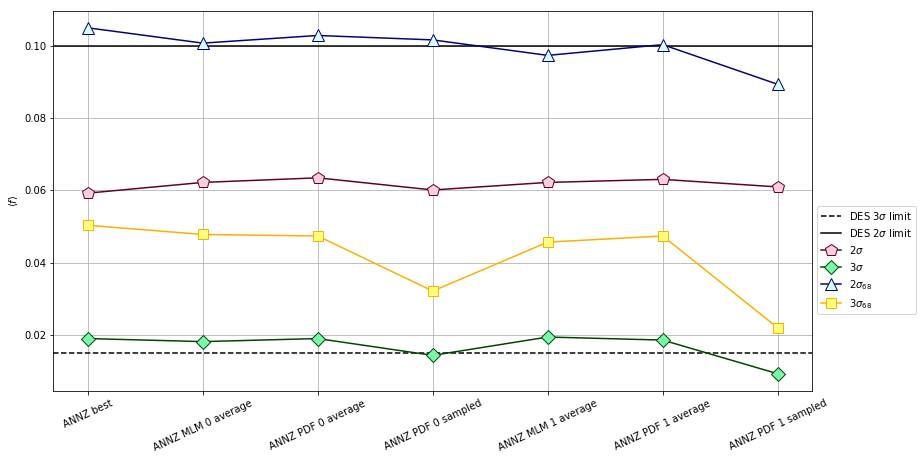

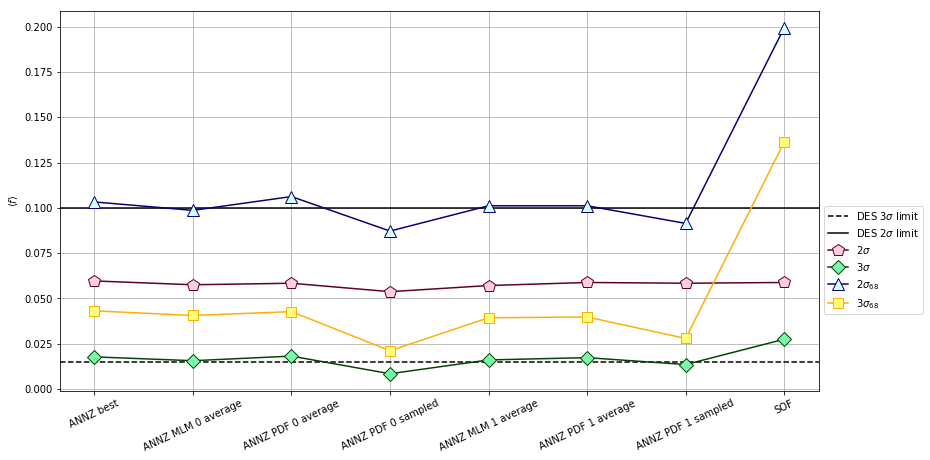

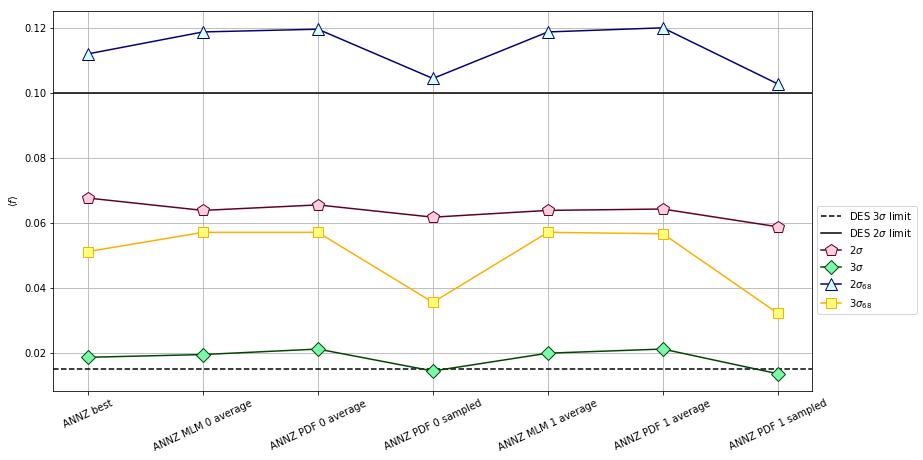

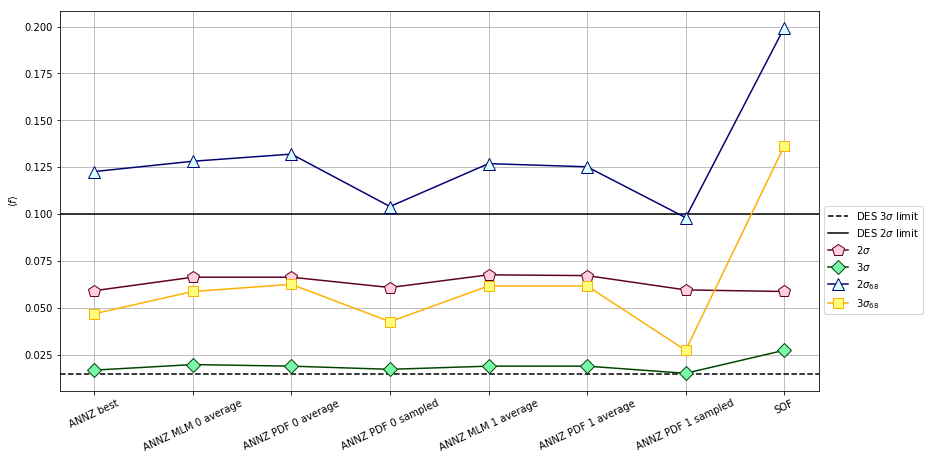

In [42]:
for k, n in zip(file_type.keys(), file_names):
    if 'optim' in k:
        fig = plt.figure(figsize=(17,7))
        ax = plt.subplot(111)
        plt.xticks(xpos_optim, xticks_optim, rotation=25) #plot xtick names
        #plt.title('Bias outlier fractions - {}'.format(n))
        plt.ylabel(r'$\langle f \rangle$')
        #plt.xlim(xmin=-0.0025, xmax=0)
        plt.axhline(y=0.015, label='DES $3\sigma$ limit', linestyle='--', color='xkcd:black')
        plt.axhline(y=0.1, label='DES $2\sigma$ limit', linestyle='-', color='xkcd:black')
        plt.plot(xpos_optim, ztype['{}_2sigma_out_frac_array'.format(k)], marker = 'p', color='xkcd:burgundy', markerfacecolor = 'xkcd:pale pink', markersize=12, label='$2 \sigma$')
        plt.plot(xpos_optim, ztype['{}_3sigma_out_frac_array'.format(k)], marker = 'D', color='xkcd:racing green', markerfacecolor = 'xkcd:seafoam green', markersize=10, label='$3 \sigma$')
        plt.plot(xpos_optim, ztype['{}_2sigma68_out_frac_array'.format(k)], marker = '^', color='xkcd:deep blue', markerfacecolor = 'xkcd:ice blue', markersize=12, label='$2 \sigma_{68}$')
        plt.plot(xpos_optim, ztype['{}_3sigma68_out_frac_array'.format(k)], marker = 's', color='xkcd:yellow orange', markerfacecolor = 'xkcd:light yellow', markersize=10, label='$3 \sigma_{68}$')
        plt.grid()   
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
        ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5)) 
        fig.savefig('{}_globalfractions.png'.format(k))
        plt.show()
    else:
        fig = plt.figure(figsize=(17,7))
        ax = plt.subplot(111)
        plt.xticks(xpos_eval, xticks_eval, rotation=25) #plot xtick names
        #plt.title('Bias outlier fractions - {}'.format(n))
        plt.ylabel(r'$\langle f \rangle$')
        #plt.xlim(xmin=-0.0025, xmax=0)
        plt.axhline(y=0.015, label='DES $3\sigma$ limit', linestyle='--', color='xkcd:black')
        plt.axhline(y=0.1, label='DES $2\sigma$ limit', linestyle='-', color='xkcd:black')
        plt.plot(xpos_eval, ztype['{}_2sigma_out_frac_array'.format(k)], marker = 'p', color='xkcd:burgundy', markerfacecolor = 'xkcd:pale pink', markersize=12, label='$2 \sigma$')
        plt.plot(xpos_eval, ztype['{}_3sigma_out_frac_array'.format(k)], marker = 'D', color='xkcd:racing green', markerfacecolor = 'xkcd:seafoam green', markersize=10, label='$3 \sigma$')
        plt.plot(xpos_eval, ztype['{}_2sigma68_out_frac_array'.format(k)], marker = '^', color='xkcd:deep blue', markerfacecolor = 'xkcd:ice blue', markersize=12, label='$2 \sigma_{68}$')
        plt.plot(xpos_eval, ztype['{}_3sigma68_out_frac_array'.format(k)], marker = 's', color='xkcd:yellow orange', markerfacecolor = 'xkcd:light yellow', markersize=10, label='$3 \sigma_{68}$')
        plt.grid()   
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
        ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5)) 
        fig.savefig('{}_globalfractions.png'.format(k))
        plt.show()